# WK8 Exploratory Data Analysis <p style="border:6px solid #ffd700"></p>

Name: <b>Robb Ryan P. Calvez</b><br>
Course: <b>CPE2A</b>

## Setup

Import <b>pandas</b>, <b>numpy</b> and <b>matplotlib</b> library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as mpl

Import <i>cleaned dataset</i> as <b>Data Frame</b>

In [2]:
df = pd.read_csv(r"..\.raw\chip-dataset-cleaned.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4854 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


Drop irrelevant columns from the newly imported dataset

In [3]:
df = df.drop(df.columns[[10, 11, 12]], axis=1)
df.head()

Product Type       Date  Process_Size    TDP    Die_Size  \
0      AMD Athlon 64 3500+  CPU  2/20/2007          65.0   45.0   77.000000   
1         AMD Athlon 200GE  CPU   9/6/2018          14.0   35.0  192.000000   
2     Intel Core i5-1145G7  CPU   9/2/2020          10.0   28.0  188.440445   
3    Intel Xeon E5-2603 v2  CPU   9/1/2013          22.0   80.0  160.000000   
4  AMD Phenom II X4 980 BE  CPU   5/3/2011          45.0  125.0  258.000000   

   Transistors  Frequency  Foundry Vendor  
0   122.000000       2200  Unknown    AMD  
1  4800.000000       3200  Unknown    AMD  
2  1929.922279       2600    Intel  Intel  
3  1400.000000       1800    Intel  Intel  
4   758.000000       3700  Unknown    AMD

## Analysis of CPU Related Data

### Evaluating Process Size of CPUs by Date and Vendor

Create seperate <b>Data Frames</b> for <i>Process Size of CPUs</i> by vendor and drop irrelevant columns

In [4]:
# AMD CPU Data Frame

df_ProcSize_AMDCPU = df.copy()
df_ProcSize_AMDCPU = df_ProcSize_AMDCPU[['Type', 'Product', 'Date', 'Process_Size', 'Vendor']].where((df_ProcSize_AMDCPU['Type']=='CPU') & (df_ProcSize_AMDCPU['Vendor']=='AMD')).dropna()
df_ProcSize_AMDCPU.head(10)

Type                    Product        Date  Process_Size Vendor
0   CPU        AMD Athlon 64 3500+   2/20/2007          65.0    AMD
1   CPU           AMD Athlon 200GE    9/6/2018          14.0    AMD
4   CPU    AMD Phenom II X4 980 BE    5/3/2011          45.0    AMD
6   CPU  AMD Phenom X4 9750 (125W)   3/27/2008          65.0    AMD
9   CPU     AMD Athlon 64 X2 4200+   5/23/2006          90.0    AMD
10  CPU          AMD Sempron 2800+    8/1/2004         130.0    AMD
12  CPU                   AMD C-70    9/1/2012          40.0    AMD
14  CPU      AMD Phenom X4 9600 BE  12/19/2007          65.0    AMD
16  CPU  AMD Turion X2 Ultra ZM-84    9/1/2008          65.0    AMD
19  CPU     AMD Athlon 64 X2 4800+   5/23/2006          90.0    AMD

In [5]:
#Intel CPU Data Frame

df_ProcSize_IntelCPU = df.copy()
df_ProcSize_IntelCPU = df_ProcSize_IntelCPU[['Type', 'Product', 'Date', 'Process_Size', 'Vendor']].where((df_ProcSize_IntelCPU['Type']=='CPU') & (df_ProcSize_IntelCPU['Vendor']=='Intel')).dropna()
df_ProcSize_IntelCPU.head(10)

Type                Product        Date  Process_Size Vendor
2   CPU   Intel Core i5-1145G7    9/2/2020          10.0  Intel
3   CPU  Intel Xeon E5-2603 v2    9/1/2013          22.0  Intel
5   CPU  Intel Xeon E5-2470 v2    9/1/2013          22.0  Intel
7   CPU    Intel Pentium D 930   1/16/2006          65.0  Intel
8   CPU   Intel Core i3-1125G4    9/2/2020          10.0  Intel
11  CPU   Intel Core i7-3632QM  10/19/2012          22.0  Intel
13  CPU    Intel Core i5-8269U    4/5/2018          14.0  Intel
15  CPU    Intel Pentium 3560Y    9/1/2013          22.0  Intel
17  CPU    Intel Pentium 4 506    6/1/2005          90.0  Intel
18  CPU  Intel Xeon E5-2430 v2    9/1/2013          22.0  Intel

### AMD CPU Process Size Trend by Date

Sort AMD CPU <b>Data Frame</b> by <i>ascending</i> order

In [6]:
# AMD CPU Data Frame Ascending

df_ProcSize_AMDCPU = df_ProcSize_AMDCPU.sort_values(by='Date', ascending=True)
df_ProcSize_AMDCPU

Type                Product      Date  Process_Size Vendor
1335  CPU      AMD Sempron 2300+  1/1/2001         130.0    AMD
715   CPU    AMD Athlon XP 2600+  1/1/2001         130.0    AMD
1014  CPU  AMD Athlon XP-M 2600+  1/1/2001         130.0    AMD
1881  CPU      AMD Sempron 3300+  1/1/2001         130.0    AMD
1511  CPU      AMD Sempron 2400+  1/1/2001         130.0    AMD
...   ...                    ...       ...           ...    ...
1367  CPU        AMD Opteron 144  9/9/2003         130.0    AMD
475   CPU        AMD Opteron 842  9/9/2003         130.0    AMD
1178  CPU        AMD Opteron 840  9/9/2003         130.0    AMD
759   CPU        AMD Opteron 140  9/9/2003         130.0    AMD
2141  CPU        AMD Opteron 844  9/9/2003         130.0    AMD

[950 rows x 5 columns]

Sort AMD CPU <b>Data Frame</b> by <i>descending</i> order

In [7]:
# AMD CPU Data Frame Descending

df_ProcSize_AMDCPU = df_ProcSize_AMDCPU.sort_values(by='Date', ascending=False)
df_ProcSize_AMDCPU

Type                  Product      Date  Process_Size Vendor
2141  CPU          AMD Opteron 844  9/9/2003         130.0    AMD
759   CPU          AMD Opteron 140  9/9/2003         130.0    AMD
1178  CPU          AMD Opteron 840  9/9/2003         130.0    AMD
475   CPU          AMD Opteron 842  9/9/2003         130.0    AMD
1367  CPU          AMD Opteron 144  9/9/2003         130.0    AMD
...   ...                      ...       ...           ...    ...
545   CPU        AMD Sempron 2600+  1/1/2001         130.0    AMD
1147  CPU        AMD Sempron 2600+  1/1/2001         130.0    AMD
473   CPU      AMD Athlon XP 3000+  1/1/2001         130.0    AMD
2182  CPU  AMD Athlon XP 2600+ DTR  1/1/2001         130.0    AMD
1335  CPU        AMD Sempron 2300+  1/1/2001         130.0    AMD

[950 rows x 5 columns]

Format AMD CPU by <b>Date</b> and remove special values

In [8]:
# Formatting Date of AMD CPUs and Removal of Special Values

df_ProcSize_AMDCPU['Date'] = pd.to_datetime(df_ProcSize_AMDCPU['Date'])
df_ProcSize_AMDCPU['Year'] = df_ProcSize_AMDCPU['Date'].dt.year
df_ProcSize_AMDCPU = df_ProcSize_AMDCPU[pd.notna(df_ProcSize_AMDCPU['Date'])]
df_ProcSize_AMDCPU = df_ProcSize_AMDCPU.groupby('Year')['Process_Size'].mean().reset_index()
df_ProcSize_AMDCPU

Year  Process_Size
0   2000    180.000000
1   2001    131.764706
2   2002    137.692308
3   2003    130.000000
4   2004    117.555556
5   2005     95.052632
6   2006     87.348485
7   2007     76.718750
8   2008     65.000000
9   2009     46.634615
10  2010     45.000000
11  2011     35.288136
12  2012     32.561404
13  2013     32.538462
14  2014     30.857143
15  2015     30.000000
16  2016     28.000000
17  2017     17.080000
18  2018     13.611111
19  2019      9.826923
20  2020      7.760870
21  2021      7.000000

#### AMD CPU Process Size Trend Graph

Create Line Graph of AMD CPU Process Size Trend

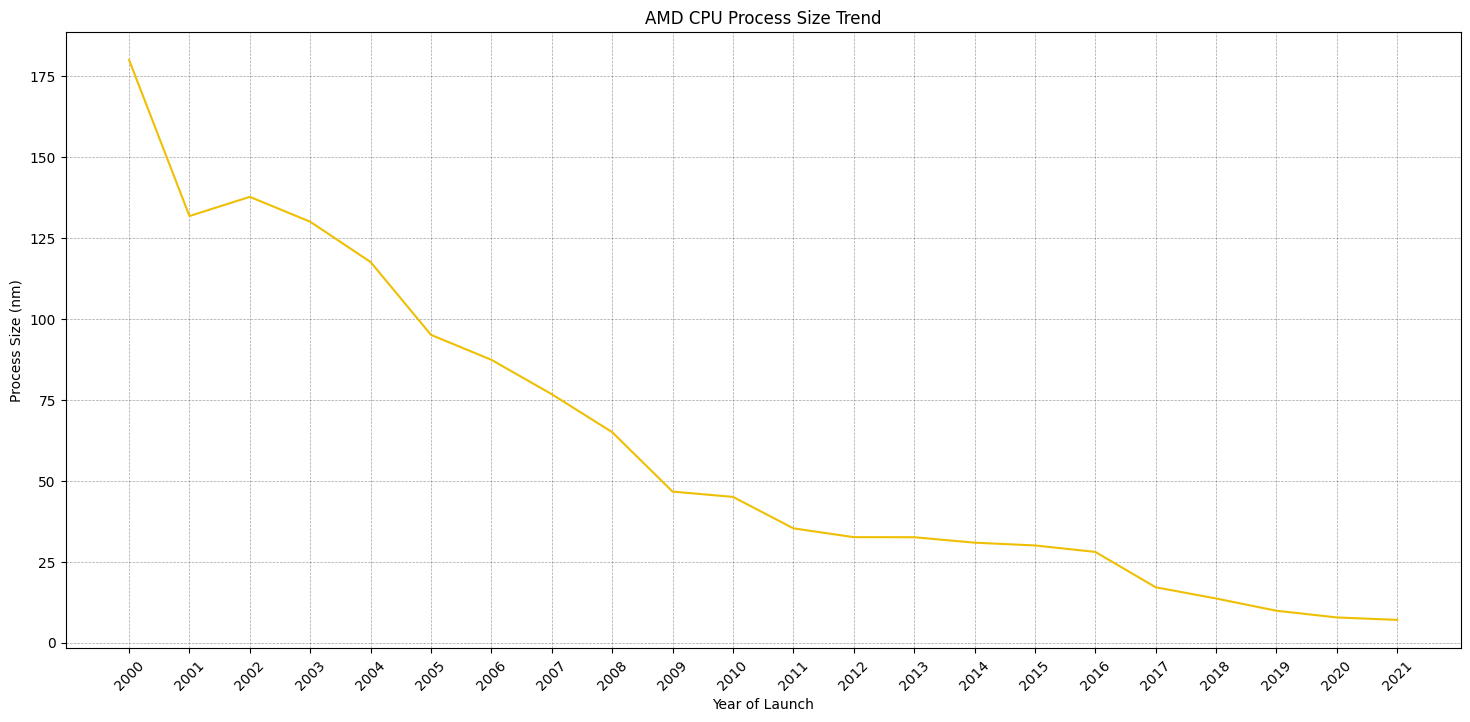

In [9]:
# AMD CPU Line Graph

mpl.figure(figsize=(18,8))
mpl.plot(df_ProcSize_AMDCPU['Year'],df_ProcSize_AMDCPU['Process_Size'], color='#efbf04')
mpl.title('AMD CPU Process Size Trend')
mpl.ylabel('Process Size (nm)')
mpl.xlabel('Year of Launch')
mpl.xticks(df_ProcSize_AMDCPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

### Intel CPU Process Size Trend by Date

Sort Intel CPU <b>Data Frame</b> by <i>ascending</i> order

In [10]:
# Intel CPU Data Frame Ascending

df_ProcSize_IntelCPU = df_ProcSize_IntelCPU.sort_values(by='Date', ascending=True)
df_ProcSize_IntelCPU

Type                 Product      Date  Process_Size Vendor
430   CPU     Intel Pentium 4 2.0  1/1/2001         130.0  Intel
1092  CPU  Intel Pentium 4 HT 517  1/1/2001          90.0  Intel
519   CPU  Intel Pentium 4 HT 524  1/1/2001          90.0  Intel
1245  CPU  Intel Pentium 4 HT 517  1/1/2001          90.0  Intel
1703  CPU  Intel Pentium 4 HT 524  1/1/2001          90.0  Intel
...   ...                     ...       ...           ...    ...
1097  CPU       Intel Core i5-750  9/8/2009          45.0  Intel
2120  CPU       Intel Core i7-860  9/8/2009          45.0  Intel
2026  CPU   Intel Core i9-10990XE       NaT          14.0  Intel
1558  CPU    Intel Core i7-9850HL       NaT          14.0  Intel
68    CPU    Intel Core i7-9850HE       NaT          14.0  Intel

[1242 rows x 5 columns]

Sort Intel CPU <b>Data Frame</b> by <i>descending</i> order

In [11]:
# Intel CPU Data Frame Descending

df_ProcSize_IntelCPU = df_ProcSize_IntelCPU.sort_values(by='Date', ascending=False)
df_ProcSize_IntelCPU

Type                 Product      Date  Process_Size Vendor
68    CPU    Intel Core i7-9850HE       NaT          14.0  Intel
1558  CPU    Intel Core i7-9850HL       NaT          14.0  Intel
2026  CPU   Intel Core i9-10990XE       NaT          14.0  Intel
2120  CPU       Intel Core i7-860  9/8/2009          45.0  Intel
1097  CPU       Intel Core i5-750  9/8/2009          45.0  Intel
...   ...                     ...       ...           ...    ...
1092  CPU  Intel Pentium 4 HT 517  1/1/2001          90.0  Intel
1845  CPU  Intel Pentium 4 HT 515  1/1/2001          90.0  Intel
1022  CPU  Intel Pentium 4 HT 516  1/1/2001          90.0  Intel
189   CPU  Intel Pentium 4 HT 515  1/1/2001          90.0  Intel
430   CPU     Intel Pentium 4 2.0  1/1/2001         130.0  Intel

[1242 rows x 5 columns]

Format Intel CPU by <b>Date</b> and remove special values

In [12]:
# Formatting Date of Intel CPUs and Removal of Special Values

df_ProcSize_IntelCPU['Date'] = pd.to_datetime(df_ProcSize_IntelCPU['Date'])
df_ProcSize_IntelCPU['Year'] = df_ProcSize_IntelCPU['Date'].dt.year
df_ProcSize_IntelCPU = df_ProcSize_IntelCPU[pd.notna(df_ProcSize_IntelCPU['Date'])]
df_ProcSize_IntelCPU = df_ProcSize_IntelCPU.groupby('Year')['Process_Size'].mean().reset_index()
df_ProcSize_IntelCPU

Year  Process_Size
0   2000.0    180.000000
1   2001.0    146.571429
2   2002.0    130.000000
3   2003.0    130.000000
4   2004.0     94.347826
5   2005.0     89.576271
6   2006.0     65.000000
7   2007.0     65.810811
8   2008.0     49.000000
9   2009.0     45.317460
10  2010.0     38.565657
11  2011.0     32.390000
12  2012.0     24.574257
13  2013.0     22.099010
14  2014.0     20.962963
15  2015.0     15.959184
16  2016.0     14.000000
17  2017.0     14.000000
18  2018.0     13.840000
19  2019.0     13.063830
20  2020.0     13.130435
21  2021.0     12.250000

#### Intel CPU Process Size Trend Graph

Create Line Graph of Intel CPU <b>Process Size</b> Trend

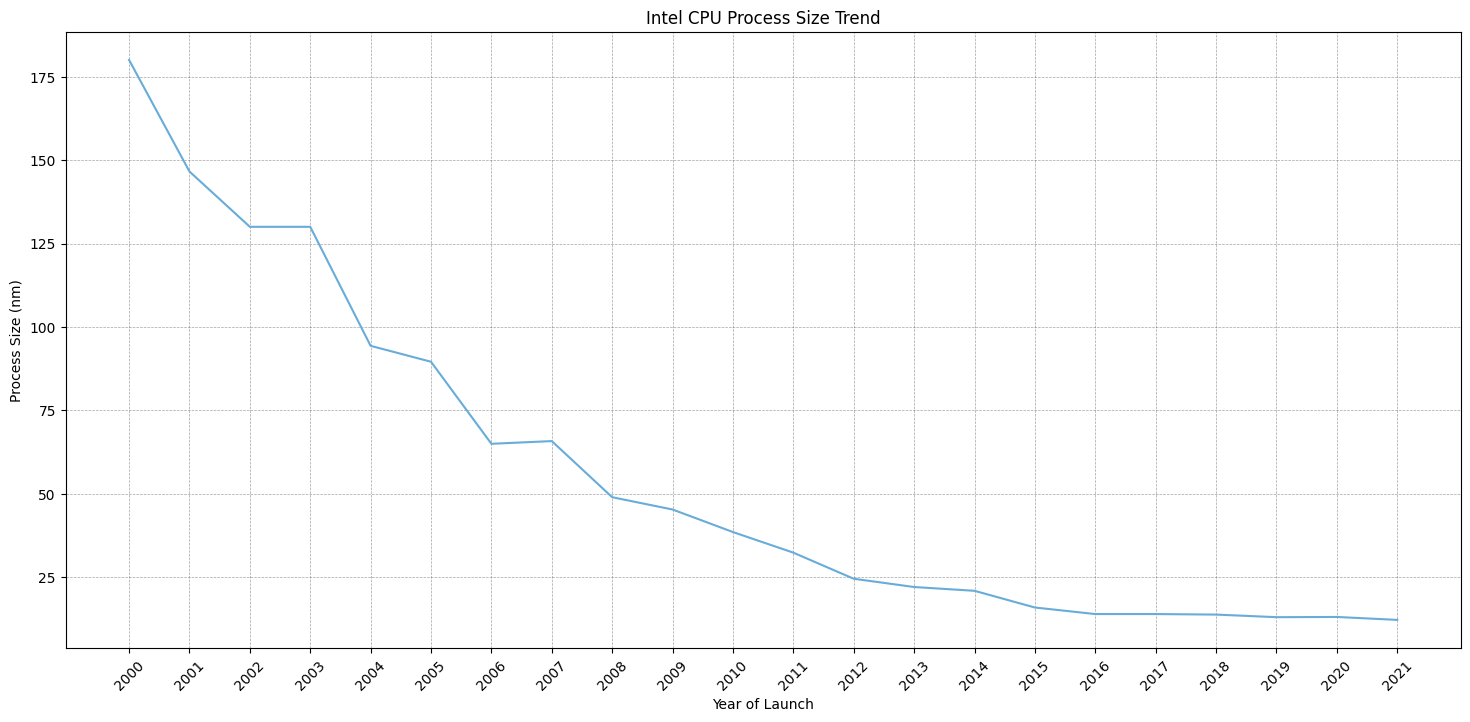

In [13]:
# Intel CPU Line Graph

mpl.figure(figsize=(18,8))
mpl.plot(df_ProcSize_IntelCPU['Year'],df_ProcSize_IntelCPU['Process_Size'], color='#68ACD9')
mpl.title('Intel CPU Process Size Trend')
mpl.ylabel('Process Size (nm)')
mpl.xlabel('Year of Launch')
mpl.xticks(df_ProcSize_IntelCPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

### Correlation between CPU TDP & Process Size

Create seperate <b>Data Frames</b> with <i>TDP</i> and <i>Process Size</i> for each vendor and drop irrelevant columns

In [14]:
df_TDPProcSize_AMDCPU = df.copy()
df_TDPProcSize_AMDCPU = df_TDPProcSize_AMDCPU[['Product', 'Type', 'Date', 'TDP', 'Process_Size', 'Vendor']].where((df_TDPProcSize_AMDCPU['Type']=='CPU') & (df_TDPProcSize_AMDCPU['Vendor']=='AMD')).dropna()
df_TDPProcSize_AMDCPU.head(10)

Product Type        Date    TDP  Process_Size Vendor
0         AMD Athlon 64 3500+  CPU   2/20/2007   45.0          65.0    AMD
1            AMD Athlon 200GE  CPU    9/6/2018   35.0          14.0    AMD
4     AMD Phenom II X4 980 BE  CPU    5/3/2011  125.0          45.0    AMD
6   AMD Phenom X4 9750 (125W)  CPU   3/27/2008  125.0          65.0    AMD
9      AMD Athlon 64 X2 4200+  CPU   5/23/2006   89.0          90.0    AMD
10          AMD Sempron 2800+  CPU    8/1/2004   62.0         130.0    AMD
12                   AMD C-70  CPU    9/1/2012    9.0          40.0    AMD
14      AMD Phenom X4 9600 BE  CPU  12/19/2007   95.0          65.0    AMD
16  AMD Turion X2 Ultra ZM-84  CPU    9/1/2008   35.0          65.0    AMD
19     AMD Athlon 64 X2 4800+  CPU   5/23/2006  110.0          90.0    AMD

In [15]:
df_TDPProcSize_IntelCPU = df.copy()
df_TDPProcSize_IntelCPU = df_TDPProcSize_IntelCPU[['Product', 'Type', 'Date', 'TDP', 'Process_Size', 'Vendor']].where((df_TDPProcSize_IntelCPU['Type']=='CPU') & (df_TDPProcSize_IntelCPU['Vendor']=='Intel')).dropna()
df_TDPProcSize_IntelCPU.head(10)

Product Type        Date    TDP  Process_Size Vendor
2    Intel Core i5-1145G7  CPU    9/2/2020   28.0          10.0  Intel
3   Intel Xeon E5-2603 v2  CPU    9/1/2013   80.0          22.0  Intel
5   Intel Xeon E5-2470 v2  CPU    9/1/2013   95.0          22.0  Intel
7     Intel Pentium D 930  CPU   1/16/2006  130.0          65.0  Intel
8    Intel Core i3-1125G4  CPU    9/2/2020   28.0          10.0  Intel
11   Intel Core i7-3632QM  CPU  10/19/2012   35.0          22.0  Intel
13    Intel Core i5-8269U  CPU    4/5/2018   28.0          14.0  Intel
15    Intel Pentium 3560Y  CPU    9/1/2013   12.0          22.0  Intel
17    Intel Pentium 4 506  CPU    6/1/2005   84.0          90.0  Intel
18  Intel Xeon E5-2430 v2  CPU    9/1/2013   80.0          22.0  Intel

#### AMD CPU TDP & Process Size Trend 

Format AMD CPU by <b>Date</b> and remove special values

In [16]:
# Formatting Date of AMD CPUs and Removal of Special Values

df_TDPProcSize_AMDCPU['Date'] = pd.to_datetime(df_TDPProcSize_AMDCPU['Date'])
df_TDPProcSize_AMDCPU['Year'] = df_TDPProcSize_AMDCPU['Date'].dt.year
df_TDPProcSize_AMDCPU = df_TDPProcSize_AMDCPU[pd.notna(df_TDPProcSize_AMDCPU['Date'])]
df_TDPProcSize_AMDCPU = df_TDPProcSize_AMDCPU.groupby(['Year'])[['Process_Size', 'TDP']].mean().reset_index()
df_TDPProcSize_AMDCPU

Year  Process_Size         TDP
0   2000    180.000000   51.142857
1   2001    131.764706   60.333333
2   2002    137.692308   64.384615
3   2003    130.000000   79.804878
4   2004    117.555556   72.755556
5   2005     95.052632   65.326316
6   2006     87.348485   75.166667
7   2007     76.718750   60.531250
8   2008     65.000000   66.492537
9   2009     46.634615   81.923077
10  2010     45.000000   82.444444
11  2011     35.288136   66.271186
12  2012     32.561404   75.315789
13  2013     32.538462   52.846154
14  2014     30.857143   75.571429
15  2015     30.000000  110.000000
16  2016     28.000000   30.444444
17  2017     17.080000  103.000000
18  2018     13.611111   74.861111
19  2019      9.826923  108.019231
20  2020      7.760870   86.347826
21  2021      7.000000  165.888889

##### AMD CPU Process Size Trend Graph

Create Line Graph for Intel CPU <b>TDP</b> and <b>Process Size</b>

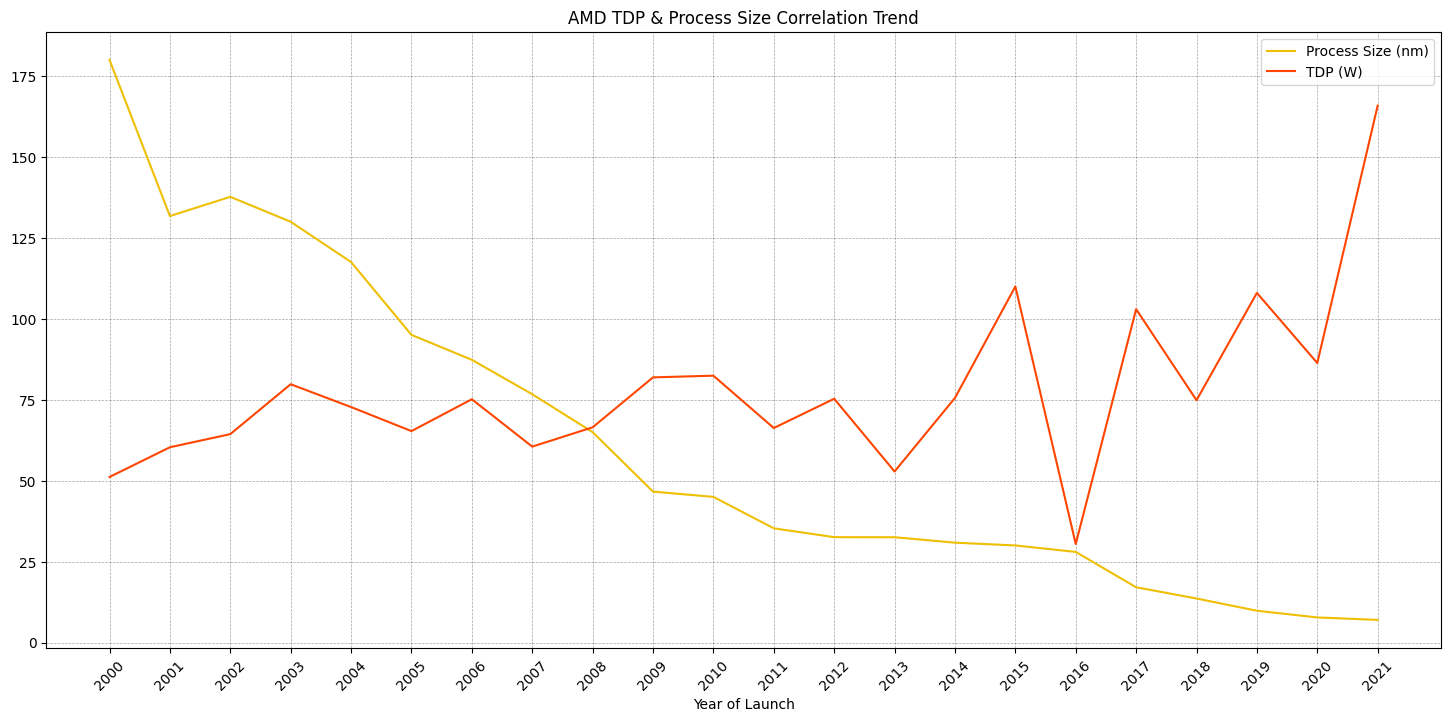

In [17]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TDPProcSize_AMDCPU['Year'], df_TDPProcSize_AMDCPU['Process_Size'], color='#efbf04', label="Process Size (nm)")
mpl.plot(df_TDPProcSize_AMDCPU['Year'], df_TDPProcSize_AMDCPU['TDP'], color='#FF4500', label="TDP (W)")
mpl.legend()
mpl.title('AMD TDP & Process Size Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TDPProcSize_AMDCPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

#### Intel CPU TDP & Process Size Trend

Format AMD CPU by <b>Date</b> and remove special values

In [18]:
# Formatting Date of Intel CPUs and Removal of Special Values

df_TDPProcSize_IntelCPU['Date'] = pd.to_datetime(df_TDPProcSize_IntelCPU['Date'])
df_TDPProcSize_IntelCPU['Year'] = df_TDPProcSize_IntelCPU['Date'].dt.year
df_TDPProcSize_IntelCPU = df_TDPProcSize_IntelCPU[pd.notna(df_TDPProcSize_IntelCPU['Date'])]
df_TDPProcSize_IntelCPU = df_TDPProcSize_IntelCPU.groupby(['Year'])[['Process_Size', 'TDP']].mean().reset_index()
df_TDPProcSize_IntelCPU

Year  Process_Size         TDP
0   2000.0    180.000000   47.333333
1   2001.0    146.571429   57.514286
2   2002.0    130.000000   70.538462
3   2003.0    130.000000   65.718750
4   2004.0     94.347826   89.000000
5   2005.0     89.576271  102.389831
6   2006.0     65.000000   70.579710
7   2007.0     65.810811   53.216216
8   2008.0     49.000000   59.266667
9   2009.0     45.317460   68.238095
10  2010.0     38.565657   52.757576
11  2011.0     32.390000   54.180000
12  2012.0     24.574257   58.722772
13  2013.0     22.099010   70.049505
14  2014.0     20.962963   55.018519
15  2015.0     15.959184   64.897959
16  2016.0     14.000000  188.076923
17  2017.0     14.000000   86.949153
18  2018.0     13.840000   84.040000
19  2019.0     13.063830   77.510638
20  2020.0     13.130435   58.956522
21  2021.0     12.250000  144.875000

###### Intel CPU Process Size Trend Graph

Create Line Graph for Intel CPU <b>TDP</b> and <b>Process Size</b>

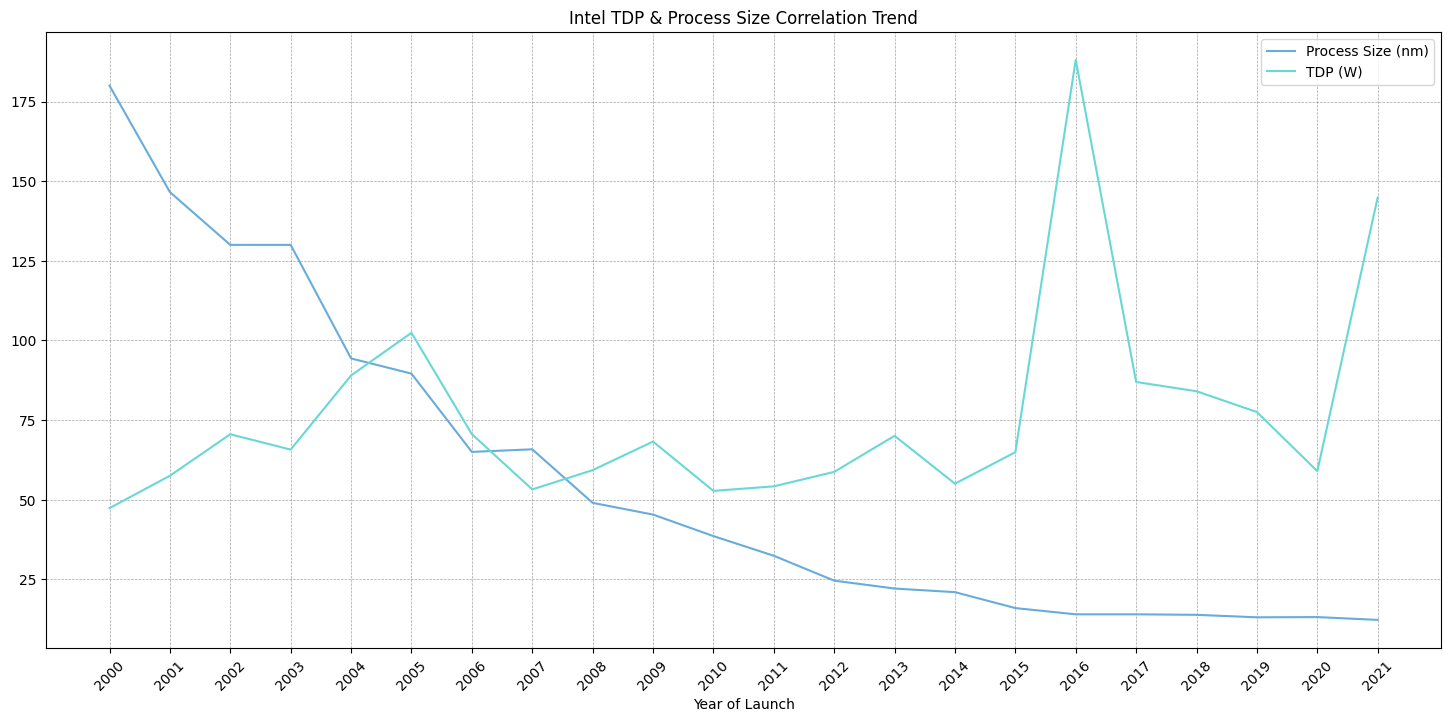

In [19]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TDPProcSize_IntelCPU['Year'], df_TDPProcSize_IntelCPU['Process_Size'], color='#68ACD9', label="Process Size (nm)")
mpl.plot(df_TDPProcSize_IntelCPU['Year'], df_TDPProcSize_IntelCPU['TDP'], color='#68d8d6', label="TDP (W)")
mpl.legend()
mpl.title('Intel TDP & Process Size Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TDPProcSize_IntelCPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

### Top AMD CPUs based on Frequency

Create seperate <b>Data Frames</b> with <i>TDP</i> and <i>Frequency</i> for each vendor and drop irrelevant columns

In [20]:
df_Frequency_AMDCPU = df.copy()
df_Frequency_AMDCPU = df_Frequency_AMDCPU[['Product', 'Type', 'Date', 'TDP', 'Frequency', 'Vendor']].where((df_Frequency_AMDCPU['Type']=='CPU') & (df_Frequency_AMDCPU['Vendor']=='AMD')).dropna()
df_Frequency_AMDCPU.head(10)

Product Type        Date    TDP  Frequency Vendor
0         AMD Athlon 64 3500+  CPU   2/20/2007   45.0     2200.0    AMD
1            AMD Athlon 200GE  CPU    9/6/2018   35.0     3200.0    AMD
4     AMD Phenom II X4 980 BE  CPU    5/3/2011  125.0     3700.0    AMD
6   AMD Phenom X4 9750 (125W)  CPU   3/27/2008  125.0     2400.0    AMD
9      AMD Athlon 64 X2 4200+  CPU   5/23/2006   89.0     2200.0    AMD
10          AMD Sempron 2800+  CPU    8/1/2004   62.0     1992.0    AMD
12                   AMD C-70  CPU    9/1/2012    9.0     1000.0    AMD
14      AMD Phenom X4 9600 BE  CPU  12/19/2007   95.0     2300.0    AMD
16  AMD Turion X2 Ultra ZM-84  CPU    9/1/2008   35.0     2300.0    AMD
19     AMD Athlon 64 X2 4800+  CPU   5/23/2006  110.0     2400.0    AMD

Sort content of the <b>Data Frames</b> in Descending Order

In [21]:
df_Frequency_AMDCPU = df_Frequency_AMDCPU.sort_values(by='Frequency', ascending=False)
df_Frequency_AMDCPU = df_Frequency_AMDCPU.head(10)
df_Frequency_AMDCPU

Product Type        Date    TDP  Frequency  \
225                         AMD FX-9590  CPU    7/6/2013  220.0     4700.0   
727                         AMD FX-9370  CPU    7/6/2013  220.0     4400.0   
936                         AMD FX-4170  CPU   2/27/2012  125.0     4200.0   
1042                        AMD FX-4350  CPU   4/29/2013  125.0     4200.0   
1198                      AMD A10-6800K  CPU    6/1/2013  100.0     4100.0   
1684                        AMD FX-4320  CPU  10/23/2012   95.0     4000.0   
1554                      AMD A10-7890K  CPU   1/11/2016   95.0     4000.0   
1381                        AMD FX-8370  CPU    9/2/2014  125.0     4000.0   
1199                      AMD A10-6790K  CPU  10/28/2013  100.0     4000.0   
1897  AMD Ryzen Threadripper PRO 3945WX  CPU   7/14/2020  280.0     4000.0   

     Vendor  
225     AMD  
727     AMD  
936     AMD  
1042    AMD  
1198    AMD  
1684    AMD  
1554    AMD  
1381    AMD  
1199    AMD  
1897    AMD

#### Top 10 AMD CPUs with the highest Frequency Bar Graph

Create a bargraph for the Top 10 <b>AMD</b> CPUs with the highest <i>Frequency</i>

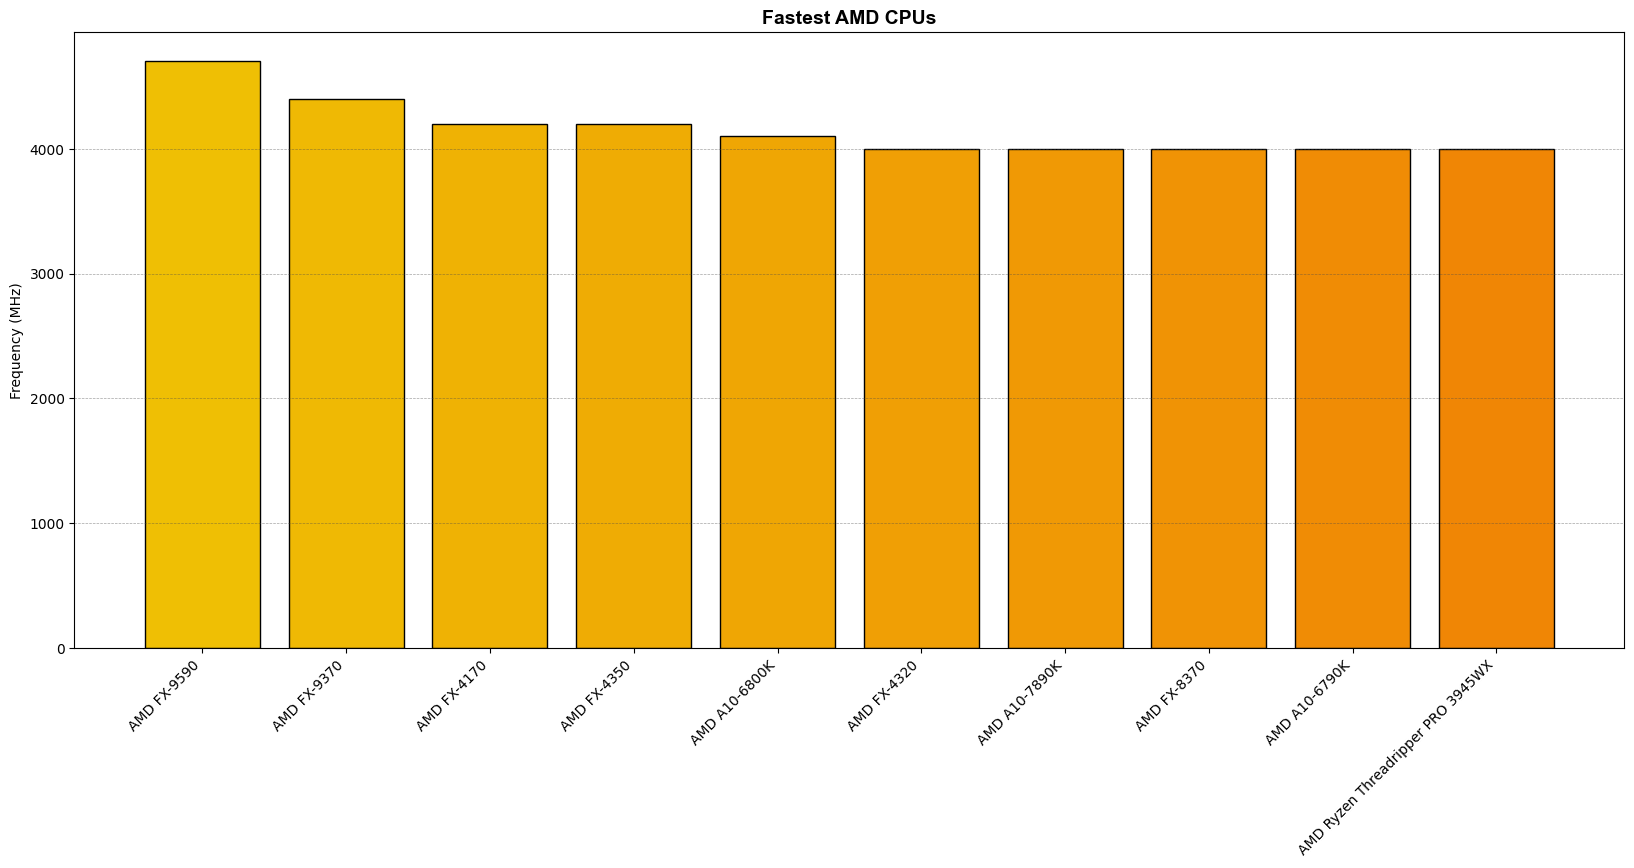

In [22]:
mpl.figure(figsize=(20,8))
mpl.bar(df_Frequency_AMDCPU['Product'],df_Frequency_AMDCPU['Frequency'], 
        edgecolor='#000000', color=['#EFBF04', '#EFB904', '#EFB204', '#EFAC04', '#EFA604',
                '#F09F05', '#F09905', '#F09305', '#F08C05', '#F08605'])
mpl.title('Fastest AMD CPUs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)
mpl.show()

Create a bargraph for the Top 10 <b>AMD</b> CPUs with the highest <i>Frequency</i> and show their corresponding <i>TDP</i>

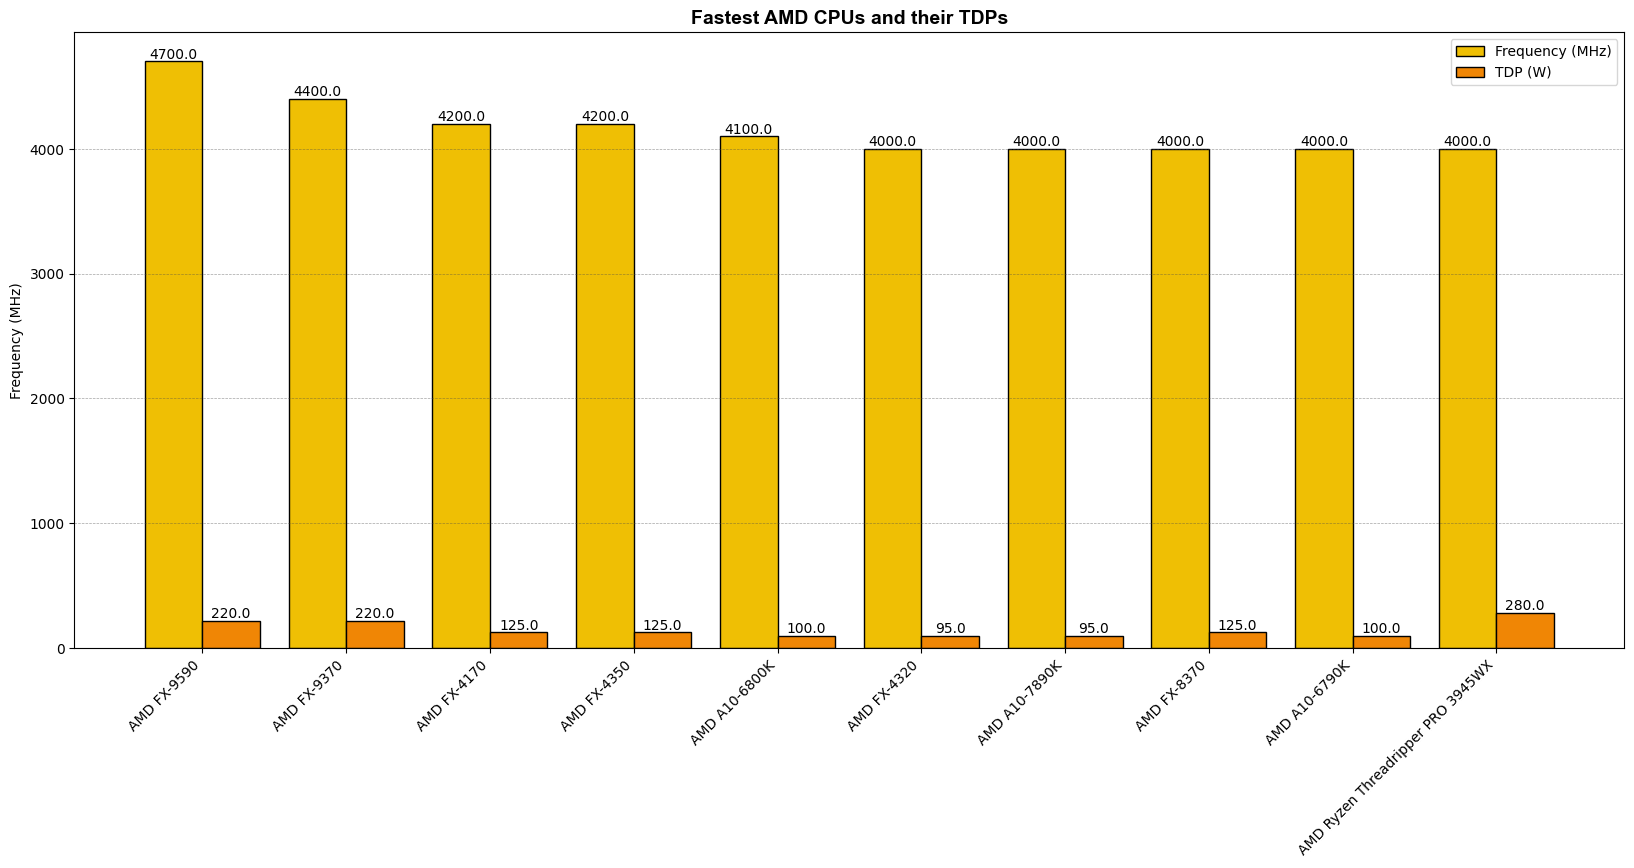

In [23]:
mpl.figure(figsize=(20,8))

bars1 = mpl.bar(np.arange(len(df_Frequency_AMDCPU['Product'])) - 0.2,df_Frequency_AMDCPU['Frequency'], 0.4, label='Frequency (MHz)',
        edgecolor='#000000', color=['#EFBF04'])
bars2 = mpl.bar(np.arange(len(df_Frequency_AMDCPU['Product'])) + 0.2,df_Frequency_AMDCPU['TDP'], 0.4, label='TDP (W)',
        edgecolor='#000000', color=['#F08605'])

for bar in bars1:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

mpl.title('Fastest AMD CPUs and their TDPs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(np.arange(len(df_Frequency_AMDCPU['Product'])), df_Frequency_AMDCPU['Product'], rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)

mpl.legend()
mpl.show()

### Top Intel CPUs based on Frequency

Create seperate <b>Data Frames</b> with <i>TDP</i> and <i>Frequency</i> for each vendor and drop irrelevant columns

In [24]:
df_Frequency_IntelCPU = df.copy()
df_Frequency_IntelCPU = df_Frequency_IntelCPU[['Product', 'Type', 'Date', 'TDP', 'Frequency', 'Vendor']].where((df_Frequency_IntelCPU['Type']=='CPU') & (df_Frequency_IntelCPU['Vendor']=='Intel')).dropna()
df_Frequency_IntelCPU.head(10)

Product Type        Date    TDP  Frequency Vendor
2    Intel Core i5-1145G7  CPU    9/2/2020   28.0     2600.0  Intel
3   Intel Xeon E5-2603 v2  CPU    9/1/2013   80.0     1800.0  Intel
5   Intel Xeon E5-2470 v2  CPU    9/1/2013   95.0     2400.0  Intel
7     Intel Pentium D 930  CPU   1/16/2006  130.0     3000.0  Intel
8    Intel Core i3-1125G4  CPU    9/2/2020   28.0     2000.0  Intel
11   Intel Core i7-3632QM  CPU  10/19/2012   35.0     2200.0  Intel
13    Intel Core i5-8269U  CPU    4/5/2018   28.0     2600.0  Intel
15    Intel Pentium 3560Y  CPU    9/1/2013   12.0     1200.0  Intel
17    Intel Pentium 4 506  CPU    6/1/2005   84.0     2660.0  Intel
18  Intel Xeon E5-2430 v2  CPU    9/1/2013   80.0     2500.0  Intel

Sort content of the <b>Data Frames</b> in Descending Order

In [25]:
df_Frequency_IntelCPU = df_Frequency_IntelCPU.sort_values(by='Frequency', ascending=False)
df_Frequency_IntelCPU = df_Frequency_IntelCPU.head(10)
df_Frequency_IntelCPU

Product Type       Date    TDP  Frequency Vendor
1115  Intel Pentium Gold G6605  CPU  3/16/2021   65.0     4300.0  Intel
1472       Intel Core i3-7360X  CPU  10/3/2017  112.0     4300.0  Intel
237        Intel Core i7-7740X  CPU  6/26/2017  112.0     4300.0  Intel
2132       Intel Core i7-7700K  CPU   1/3/2017   91.0     4200.0  Intel
2153  Intel Pentium Gold G6505  CPU  3/16/2021   65.0     4200.0  Intel
1542  Intel Pentium Gold G6600  CPU  4/30/2020   58.0     4200.0  Intel
889         Intel Core i3-7340  CPU  7/17/2017   51.0     4200.0  Intel
313        Intel Core i3-7350K  CPU   1/3/2017   60.0     4200.0  Intel
1722     Intel Core i5-10600KF  CPU  4/30/2020   95.0     4100.0  Intel
1510     Intel Xeon E3-1285 v6  CPU   8/1/2017   79.0     4100.0  Intel

#### Top 10 Intel CPUs with the highest Frequency Bar Graph

Create a bargraph for the Top 10 <b>Intel</b> CPUs with the highest <i>Frequency</i>

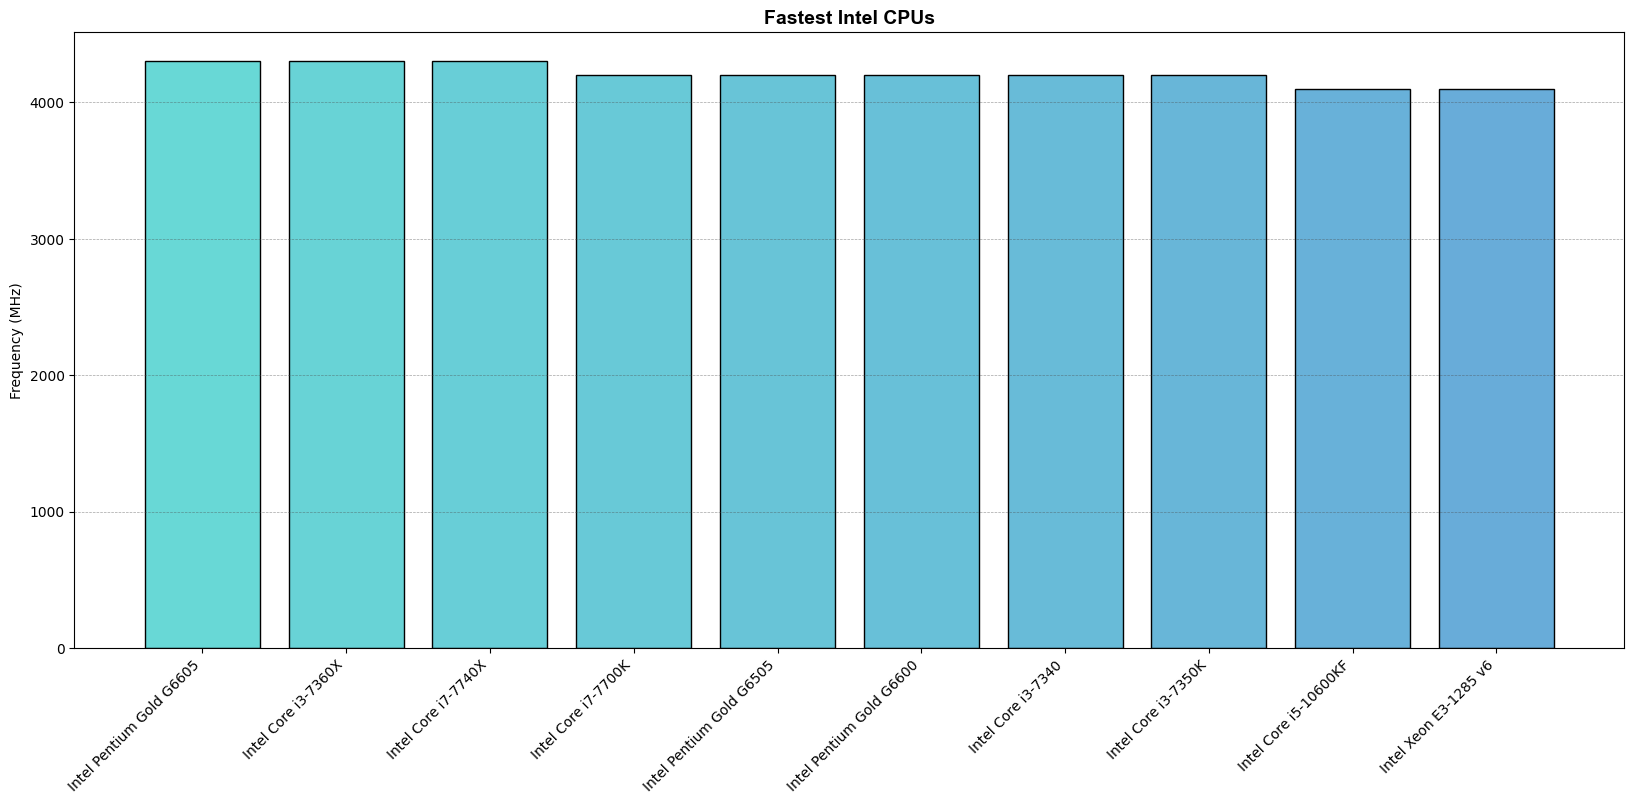

In [26]:
mpl.figure(figsize=(20,8))
mpl.bar(df_Frequency_IntelCPU['Product'],df_Frequency_IntelCPU['Frequency'], 
        edgecolor='#000000', color=['#68D8D6', '#68D3D6', '#68CED7', '#68C9D7', '#68C4D7',
                '#68C0D8', '#68BBD8', '#68B6D8', '#68B1D9', '#68ACD9'])
mpl.title('Fastest Intel CPUs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)
mpl.show()

Create a bargraph for the Top 10 <b>Intel</b> CPUs with the highest <i>Frequency</i> and show their corresponding <i>TDP</i>

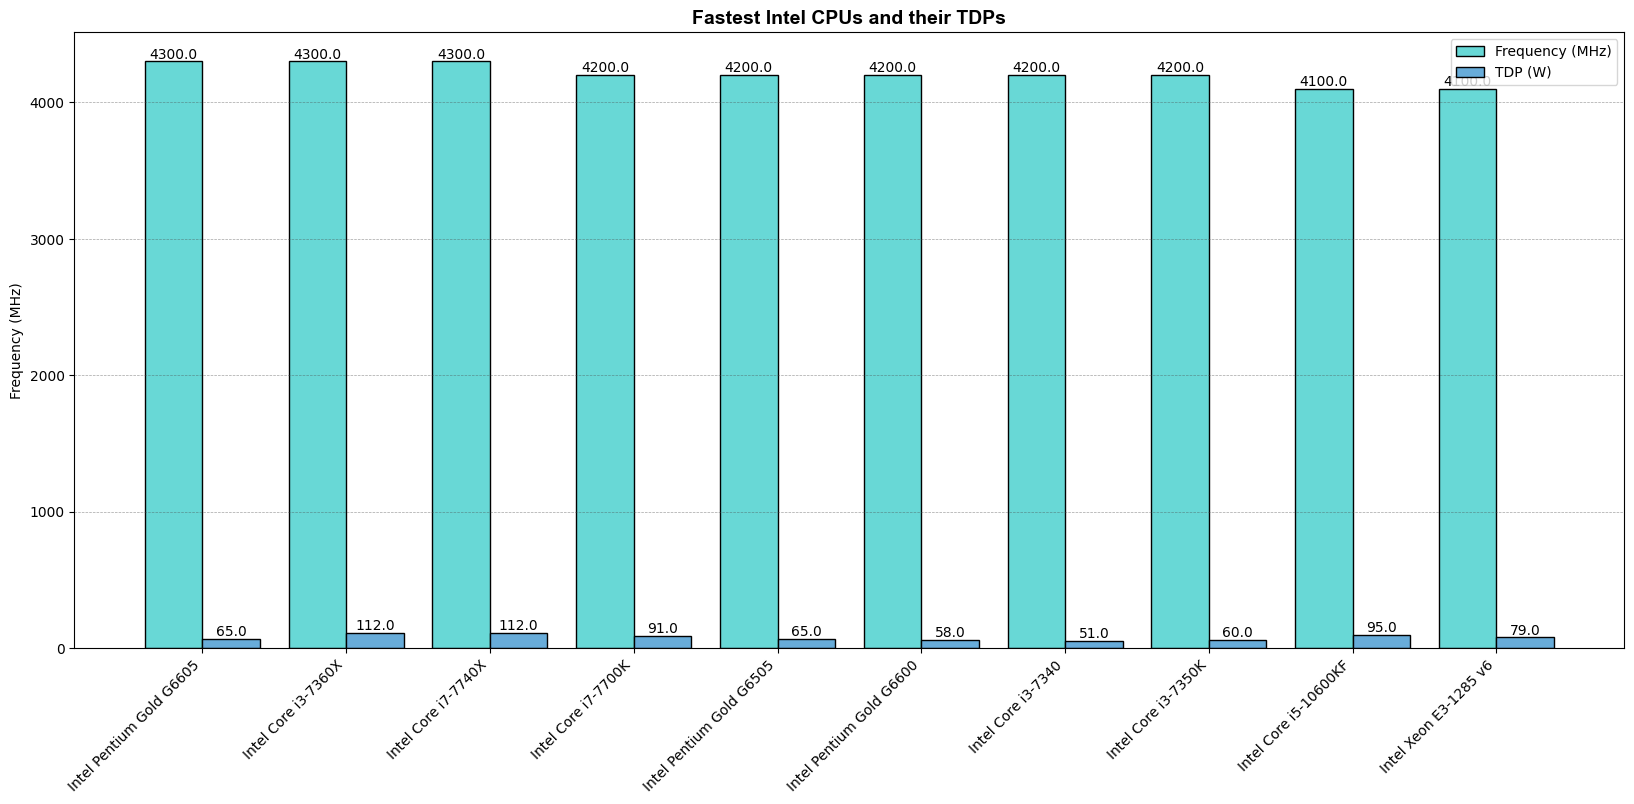

In [27]:
mpl.figure(figsize=(20,8))

bars1 = mpl.bar(np.arange(len(df_Frequency_IntelCPU['Product'])) - 0.2,df_Frequency_IntelCPU['Frequency'], 0.4, label='Frequency (MHz)',
        edgecolor='#000000', color=['#68D8D6'])
bars2 = mpl.bar(np.arange(len(df_Frequency_IntelCPU['Product'])) + 0.2,df_Frequency_IntelCPU['TDP'], 0.4, label='TDP (W)',
        edgecolor='#000000', color=['#68ACD9'])

for bar in bars1:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

mpl.title('Fastest Intel CPUs and their TDPs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(np.arange(len(df_Frequency_IntelCPU['Product'])), df_Frequency_IntelCPU['Product'], rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)

mpl.legend()
mpl.show()

### CPU Transistor Count Trend

#### AMD CPU Transistor Count

Create a seperate <b>Data Frame</b> with <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [28]:
df_TransCount_AMDCPU = df.copy()
df_TransCount_AMDCPU = df_TransCount_AMDCPU[['Product', 'Type', 'Date', 'Transistors', 'Vendor']].where((df_TransCount_AMDCPU['Type']=='CPU') & (df_TransCount_AMDCPU['Vendor']=='AMD')).dropna()
df_TransCount_AMDCPU

Product Type       Date  Transistors Vendor
0           AMD Athlon 64 3500+  CPU  2/20/2007        122.0    AMD
1              AMD Athlon 200GE  CPU   9/6/2018       4800.0    AMD
4       AMD Phenom II X4 980 BE  CPU   5/3/2011        758.0    AMD
6     AMD Phenom X4 9750 (125W)  CPU  3/27/2008        450.0    AMD
9        AMD Athlon 64 X2 4200+  CPU  5/23/2006        154.0    AMD
...                         ...  ...        ...          ...    ...
2182    AMD Athlon XP 2600+ DTR  CPU   1/1/2001         63.0    AMD
2186          AMD Sempron 3000+  CPU  7/15/2005         69.0    AMD
2188          AMD Ryzen 9 4900H  CPU  3/16/2020       9800.0    AMD
2190            AMD Opteron 246  CPU  12/1/2004        106.0    AMD
2191  AMD Athlon 64 X2 5000+ EE  CPU   2/1/2007        154.0    AMD

[950 rows x 5 columns]

Format content of the <b>Data Frame</b> by <b>Date</b> in <i>Ascending Order</i> and remove special values

In [29]:
# Formatting Date of Intel CPUs and Removal of Special Values

df_TransCount_AMDCPU['Date'] = pd.to_datetime(df_TransCount_AMDCPU['Date'])
df_TransCount_AMDCPU['Year'] = df_TransCount_AMDCPU['Date'].dt.year
df_TransCount_AMDCPU = df_TransCount_AMDCPU[pd.notna(df_TransCount_AMDCPU['Date'])]
df_TransCount_AMDCPU = df_TransCount_AMDCPU.groupby(['Year'])[['Transistors']].mean().reset_index()
df_TransCount_AMDCPU

Year  Transistors
0   2000    37.000000
1   2001    67.333333
2   2002    41.000000
3   2003    93.512195
4   2004    88.144444
5   2005   122.705263
6   2006   182.392762
7   2007   474.487856
8   2008   715.906813
9   2009   594.153846
10  2010   608.088889
11  2011  1263.074207
12  2012  1416.310335
13  2013  1238.248439
14  2014  1187.428571
15  2015  1189.000000
16  2016  1521.965457
17  2017  4598.955337
18  2018  6013.824698
19  2019  3785.551714
20  2020  4365.180220
21  2021  3387.344079

##### AMD CPU Transistor Count Trend Graph

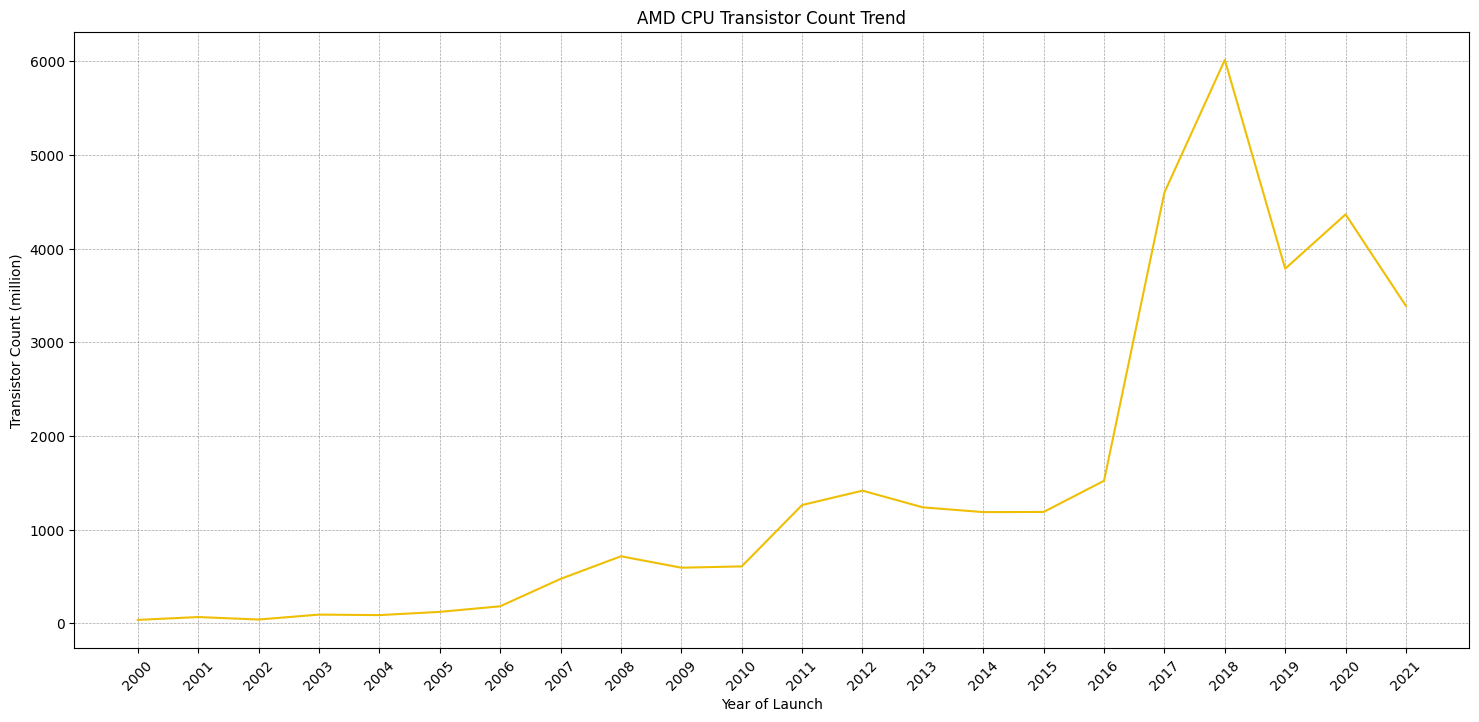

In [30]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TransCount_AMDCPU['Year'], df_TransCount_AMDCPU['Transistors'], color='#EFBF04')
mpl.title('AMD CPU Transistor Count Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TransCount_AMDCPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.ylabel('Transistor Count (million)')
mpl.show()

#### Intel CPU Transistor Count

Create a seperate <b>Data Frame</b> with <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [31]:
df_TransCount_IntelCPU = df.copy()
df_TransCount_IntelCPU = df_TransCount_IntelCPU[['Product', 'Type', 'Date', 'Transistors', 'Vendor']].where((df_TransCount_IntelCPU['Type']=='CPU') & (df_TransCount_IntelCPU['Vendor']=='Intel')).dropna()
df_TransCount_IntelCPU

Product Type       Date  Transistors Vendor
2       Intel Core i5-1145G7  CPU   9/2/2020  1929.922279  Intel
3      Intel Xeon E5-2603 v2  CPU   9/1/2013  1400.000000  Intel
5      Intel Xeon E5-2470 v2  CPU   9/1/2013  1400.000000  Intel
7        Intel Pentium D 930  CPU  1/16/2006   376.000000  Intel
8       Intel Core i3-1125G4  CPU   9/2/2020  1929.922279  Intel
...                      ...  ...        ...          ...    ...
2183    Intel Core i7-10510U  CPU  8/21/2019  1929.922279  Intel
2184     Intel Core i3-7100T  CPU   1/3/2017  1929.922279  Intel
2185     Intel Core i7-9850H  CPU  4/23/2019  1929.922279  Intel
2187   Intel Xeon Gold 6312U  CPU   4/6/2021  1929.922279  Intel
2189  Intel Core 2 Duo E6550  CPU   7/1/2007   291.000000  Intel

[1242 rows x 5 columns]

Sort content of the <b>Data Frames</b> in <i>Ascending</i> Order

In [32]:
# Formatting Date of Intel CPUs and Removal of Special Values

df_TransCount_IntelCPU['Date'] = pd.to_datetime(df_TransCount_IntelCPU['Date'])
df_TransCount_IntelCPU['Year'] = df_TransCount_IntelCPU['Date'].dt.year
df_TransCount_IntelCPU = df_TransCount_IntelCPU[pd.notna(df_TransCount_IntelCPU['Date'])]
df_TransCount_IntelCPU = df_TransCount_IntelCPU.groupby(['Year'])[['Transistors']].mean().reset_index()
df_TransCount_IntelCPU

Year  Transistors
0   2000.0    42.666667
1   2001.0    62.085714
2   2002.0    57.269231
3   2003.0    83.937500
4   2004.0   135.652174
5   2005.0   404.277597
6   2006.0   761.257340
7   2007.0   331.862764
8   2008.0   442.550374
9   2009.0   484.095238
10  2010.0   508.989114
11  2011.0   807.599223
12  2012.0  1707.152721
13  2013.0  1708.899348
14  2014.0  1725.722030
15  2015.0  1691.997990
16  2016.0  5809.206855
17  2017.0  2744.001931
18  2018.0  2725.134714
19  2019.0  2446.524638
20  2020.0  1929.922279
21  2021.0  1929.922279

##### Intel CPU Transistor Count Trend Graph

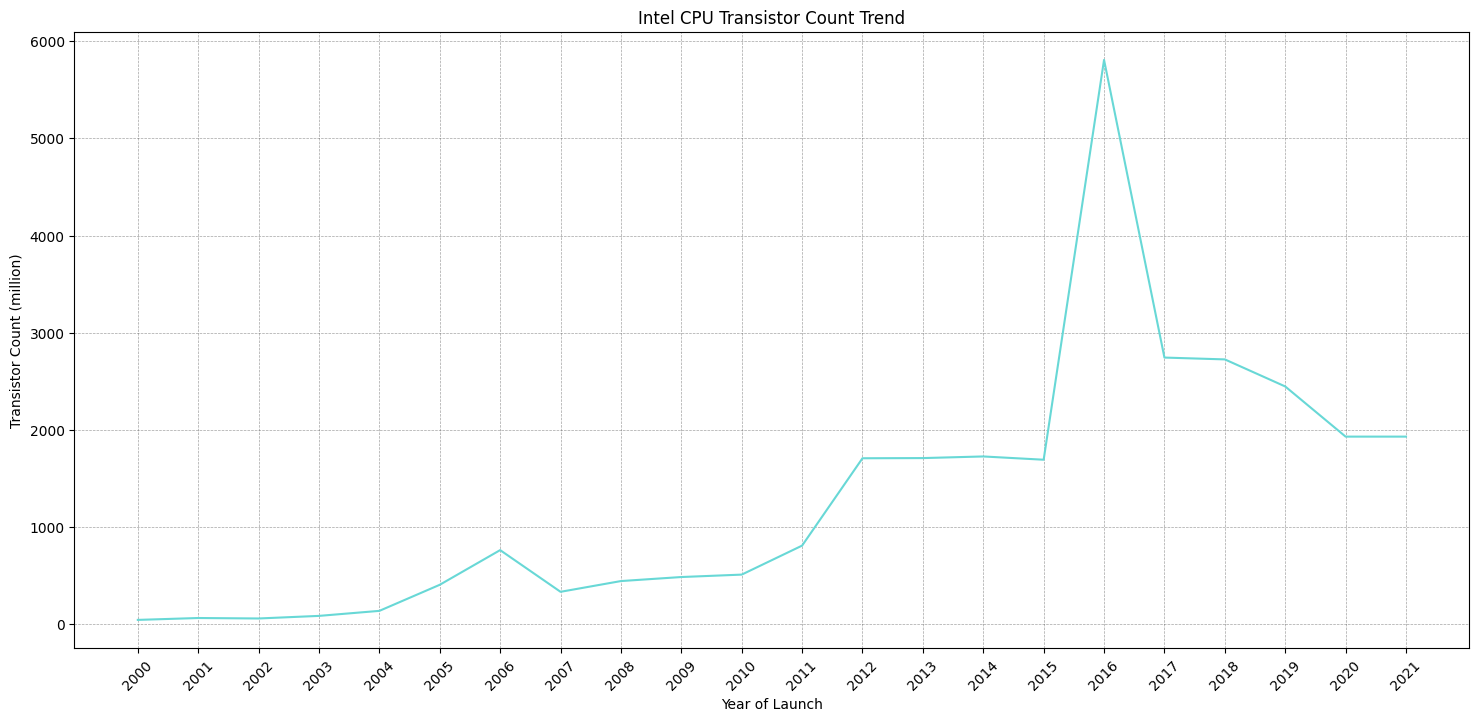

In [33]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TransCount_IntelCPU['Year'], df_TransCount_IntelCPU['Transistors'], color='#68D8D6')
mpl.title('Intel CPU Transistor Count Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TransCount_IntelCPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.ylabel('Transistor Count (million)')

mpl.show()

### Correlation between CPU Die Size & Transistor Count 

#### AMD CPU Die Size & Transistor Count

Create a seperate <b>Data Frame</b> with <i>Die Size</i> and <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [34]:
df_DieSizeTransCount_AMDCPU = df.copy()
df_DieSizeTransCount_AMDCPU = df_DieSizeTransCount_AMDCPU[['Product', 'Type', 'Date', 'Die_Size', 'Transistors', 'Vendor']].where((df_DieSizeTransCount_AMDCPU['Type']=='CPU') & (df_DieSizeTransCount_AMDCPU['Vendor']=='AMD')).dropna()
df_DieSizeTransCount_AMDCPU

Product Type       Date    Die_Size  Transistors  \
0           AMD Athlon 64 3500+  CPU  2/20/2007   77.000000        122.0   
1              AMD Athlon 200GE  CPU   9/6/2018  192.000000       4800.0   
4       AMD Phenom II X4 980 BE  CPU   5/3/2011  258.000000        758.0   
6     AMD Phenom X4 9750 (125W)  CPU  3/27/2008  285.000000        450.0   
9        AMD Athlon 64 X2 4200+  CPU  5/23/2006  156.000000        154.0   
...                         ...  ...        ...         ...          ...   
2182    AMD Athlon XP 2600+ DTR  CPU   1/1/2001  101.000000         63.0   
2186          AMD Sempron 3000+  CPU  7/15/2005  188.440445         69.0   
2188          AMD Ryzen 9 4900H  CPU  3/16/2020  156.000000       9800.0   
2190            AMD Opteron 246  CPU  12/1/2004  188.440445        106.0   
2191  AMD Athlon 64 X2 5000+ EE  CPU   2/1/2007  220.000000        154.0   

     Vendor  
0       AMD  
1       AMD  
4       AMD  
6       AMD  
9       AMD  
...     ...  
2182    AMD  
2186    AMD  
2188    AMD  
2190    AMD  
2191    AMD  

[950 rows x 6 columns]

Sort content of the <b>Data Frames</b> in <i>Ascending</i> Order

In [35]:
df_DieSizeTransCount_AMDCPU['Date'] = pd.to_datetime(df_DieSizeTransCount_AMDCPU['Date'])
df_DieSizeTransCount_AMDCPU['Year'] = df_DieSizeTransCount_AMDCPU['Date'].dt.year
df_DieSizeTransCount_AMDCPU = df_DieSizeTransCount_AMDCPU[pd.notna(df_DieSizeTransCount_AMDCPU['Date'])]
df_DieSizeTransCount_AMDCPU = df_DieSizeTransCount_AMDCPU.groupby(['Year'])[['Die_Size', 'Transistors']].mean().reset_index()
df_DieSizeTransCount_AMDCPU

Year    Die_Size  Transistors
0   2000  120.000000    37.000000
1   2001  114.901961    67.333333
2   2002   92.384615    41.000000
3   2003  187.511317    93.512195
4   2004  163.386765    88.144444
5   2005  161.959004   122.705263
6   2006  178.610384   182.392762
7   2007  157.068819   474.487856
8   2008  208.881300   715.906813
9   2009  212.038462   594.153846
10  2010  225.244444   608.088889
11  2011  218.261702  1263.074207
12  2012  275.341060  1416.310335
13  2013  239.817459  1238.248439
14  2014  275.571429  1187.428571
15  2015  280.500000  1189.000000
16  2016  166.195753  1521.965457
17  2017  215.520000  4598.955337
18  2018  207.583333  6013.824698
19  2019  124.632325  3785.551714
20  2020  151.297604  4365.180220
21  2021  182.432955  3387.344079

##### AMD CPU Die Size & Transistor Count Trend Graph

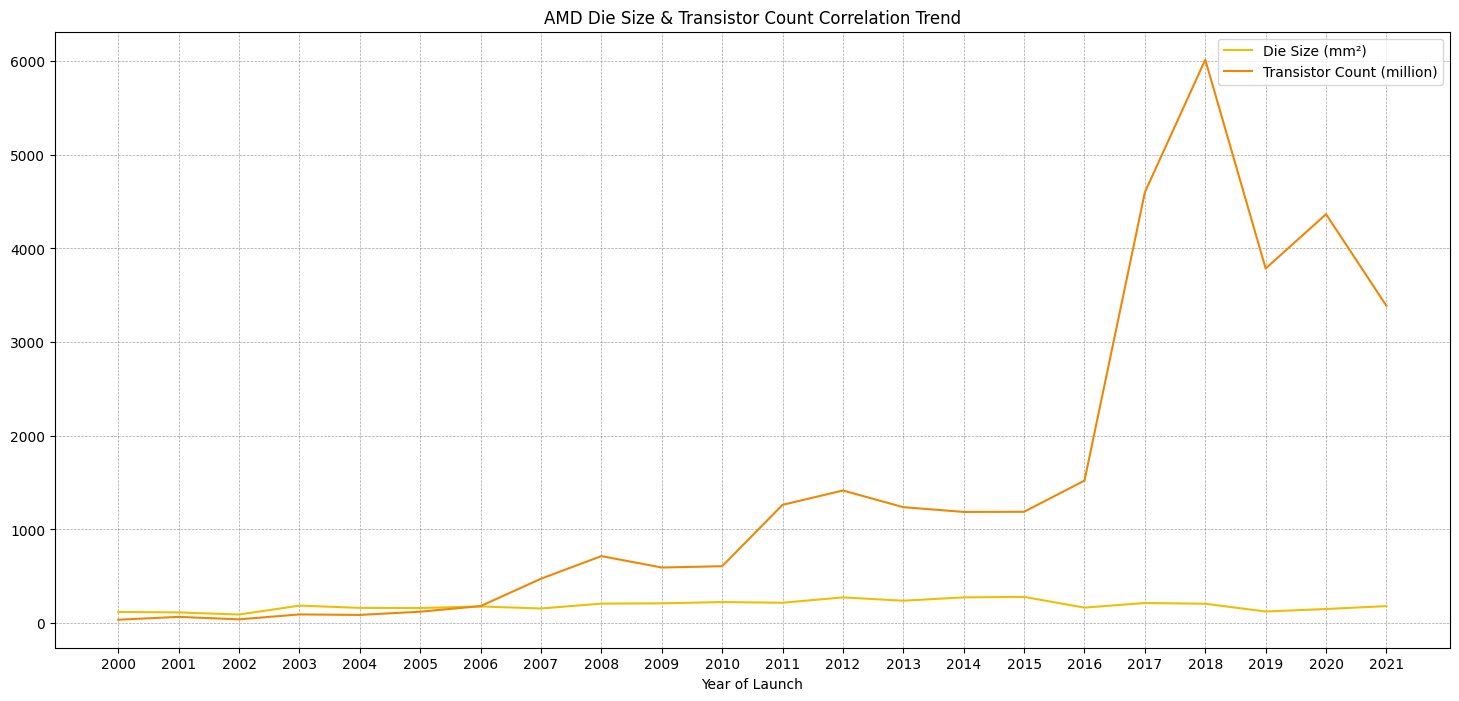

In [36]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_DieSizeTransCount_AMDCPU['Year'], df_DieSizeTransCount_AMDCPU['Die_Size'], color='#EFBF04', label="Die Size (mm²)")
mpl.plot(df_DieSizeTransCount_AMDCPU['Year'], df_DieSizeTransCount_AMDCPU['Transistors'], color='#F08605', label="Transistor Count (million)")
mpl.legend()
mpl.title('AMD Die Size & Transistor Count Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_DieSizeTransCount_AMDCPU['Year'])
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.show()

#### Intel CPU Die Size & Transistor Count

Create a seperate <b>Data Frame</b> with <i>Die Size</i> and <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [37]:
df_DieSizeTransCount_IntelCPU = df.copy()
df_DieSizeTransCount_IntelCPU = df_DieSizeTransCount_IntelCPU[['Product', 'Type', 'Date', 'Die_Size', 'Transistors', 'Vendor']].where((df_DieSizeTransCount_IntelCPU['Type']=='CPU') & (df_DieSizeTransCount_IntelCPU['Vendor']=='Intel')).dropna()
df_DieSizeTransCount_IntelCPU

Product Type       Date    Die_Size  Transistors Vendor
2       Intel Core i5-1145G7  CPU   9/2/2020  188.440445  1929.922279  Intel
3      Intel Xeon E5-2603 v2  CPU   9/1/2013  160.000000  1400.000000  Intel
5      Intel Xeon E5-2470 v2  CPU   9/1/2013  160.000000  1400.000000  Intel
7        Intel Pentium D 930  CPU  1/16/2006  140.000000   376.000000  Intel
8       Intel Core i3-1125G4  CPU   9/2/2020  188.440445  1929.922279  Intel
...                      ...  ...        ...         ...          ...    ...
2183    Intel Core i7-10510U  CPU  8/21/2019  188.440445  1929.922279  Intel
2184     Intel Core i3-7100T  CPU   1/3/2017  188.440445  1929.922279  Intel
2185     Intel Core i7-9850H  CPU  4/23/2019  149.000000  1929.922279  Intel
2187   Intel Xeon Gold 6312U  CPU   4/6/2021  188.440445  1929.922279  Intel
2189  Intel Core 2 Duo E6550  CPU   7/1/2007  143.000000   291.000000  Intel

[1242 rows x 6 columns]

Sort content of the <b>Data Frames</b> in <i>Ascending</i> Order

In [38]:
df_DieSizeTransCount_IntelCPU['Date'] = pd.to_datetime(df_DieSizeTransCount_IntelCPU['Date'])
df_DieSizeTransCount_IntelCPU['Year'] = df_DieSizeTransCount_IntelCPU['Date'].dt.year
df_DieSizeTransCount_IntelCPU = df_DieSizeTransCount_IntelCPU[pd.notna(df_DieSizeTransCount_IntelCPU['Date'])]
df_DieSizeTransCount_IntelCPU = df_DieSizeTransCount_IntelCPU.groupby(['Year'])[['Die_Size', 'Transistors']].mean().reset_index()
df_DieSizeTransCount_IntelCPU

Year    Die_Size  Transistors
0   2000.0  171.333333    42.666667
1   2001.0  139.400000    62.085714
2   2002.0  149.769231    57.269231
3   2003.0  144.906250    83.937500
4   2004.0  120.434783   135.652174
5   2005.0  145.648904   404.277597
6   2006.0  166.604721   761.257340
7   2007.0  114.864865   331.862764
8   2008.0   95.955556   442.550374
9   2009.0  163.952381   484.095238
10  2010.0  128.913540   508.989114
11  2011.0  174.734404   807.599223
12  2012.0  152.383780  1707.152721
13  2013.0  176.858671  1708.899348
14  2014.0  185.641531  1725.722030
15  2015.0  173.338177  1691.997990
16  2016.0  188.440445  5809.206855
17  2017.0  182.938026  2744.001931
18  2018.0  173.776326  2725.134714
19  2019.0  183.705901  2446.524638
20  2020.0  189.203903  1929.922279
21  2021.0  188.440445  1929.922279

##### Intel CPU Die Size & Transistor Count Trend Graph

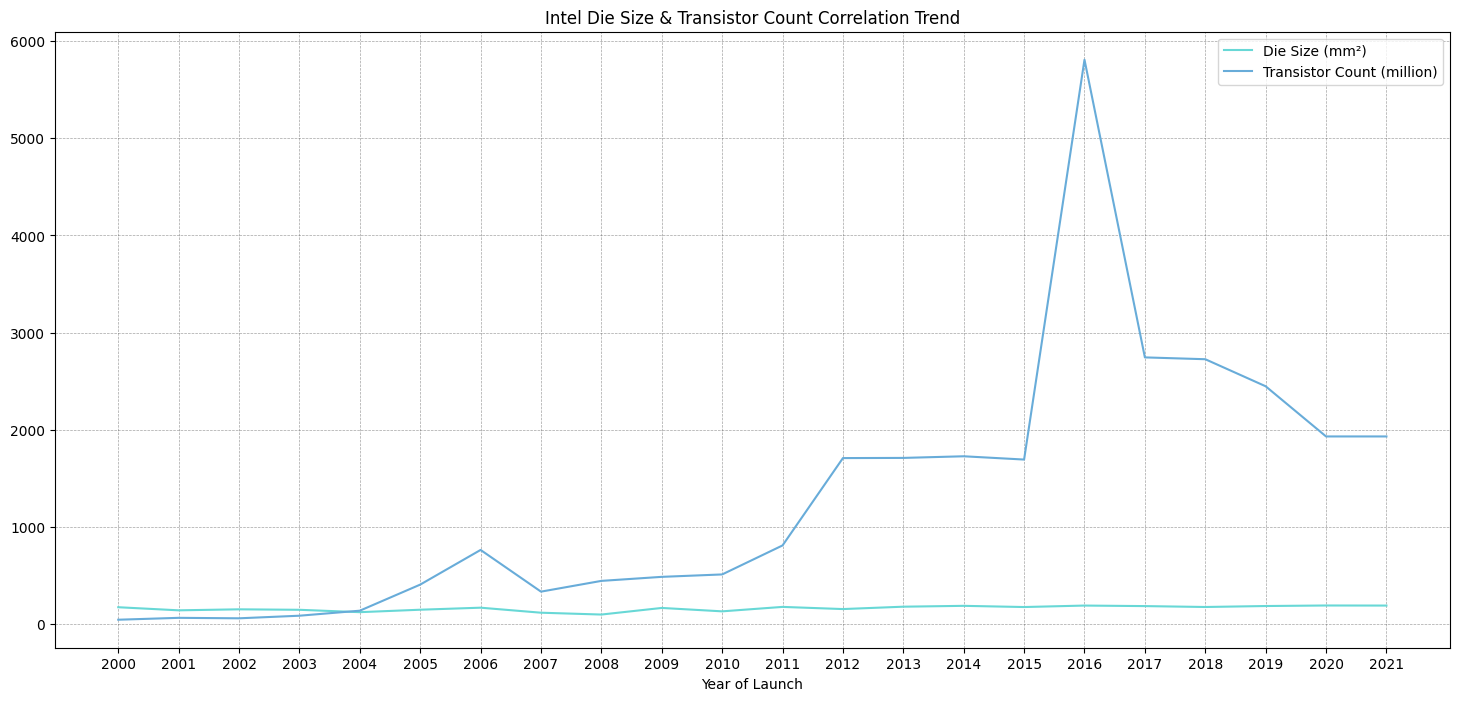

In [39]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_DieSizeTransCount_IntelCPU['Year'], df_DieSizeTransCount_IntelCPU['Die_Size'], color='#68D8D6', label="Die Size (mm²)")
mpl.plot(df_DieSizeTransCount_IntelCPU['Year'], df_DieSizeTransCount_IntelCPU['Transistors'], color='#68ACD9', label="Transistor Count (million)")
mpl.legend()
mpl.title('Intel Die Size & Transistor Count Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_DieSizeTransCount_IntelCPU['Year'])
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.show()

## Analysis of GPU Related Data

### Evaluating Process Size of GPUs by Date and Vendor

Create seperate <b>Data Frames</b> for <i>Process Size of GPUs</i> by vendor and drop irrelevant columns

In [40]:
# AMD GPU Data Frame

df_ProcSize_AMDGPU = df.copy()
df_ProcSize_AMDGPU = df_ProcSize_AMDGPU[['Type', 'Product', 'Date', 'Process_Size', 'Vendor']].where((df_ProcSize_AMDGPU['Type']=='GPU') & (df_ProcSize_AMDGPU['Vendor']=='AMD')).dropna()
df_ProcSize_AMDGPU.head(10)

Type                        Product        Date  Process_Size Vendor
2203  GPU                  AMD Wii U GPU  11/18/2012          40.0    AMD
2204  GPU             AMD Radeon RX 6800  10/28/2020           7.0    AMD
2209  GPU         AMD Radeon HD 8400 IGP  11/23/2013          28.0    AMD
2217  GPU  AMD Radeon R7 Mobile Graphics  11/15/2015          28.0    AMD
2223  GPU           AMD Radeon RX 560 XT   3/13/2019          14.0    AMD
2228  GPU         AMD Radeon HD 7350 OEM    1/5/2012          40.0    AMD
2232  GPU             AMD Radeon R7 M445   5/15/2016          28.0    AMD
2242  GPU             AMD Radeon R5 M255  10/12/2014          28.0    AMD
2246  GPU            AMD Radeon HD 7450A    1/5/2012          40.0    AMD
2255  GPU         AMD Radeon Pro Vega II    6/3/2019           7.0    AMD

In [41]:
#Intel GPU Data Frame

df_ProcSize_IntelGPU = df.copy()
df_ProcSize_IntelGPU = df_ProcSize_IntelGPU[['Type', 'Product', 'Date', 'Process_Size', 'Vendor']].where((df_ProcSize_IntelGPU['Type']=='GPU') & (df_ProcSize_IntelGPU['Vendor']=='Intel')).dropna()
df_ProcSize_IntelGPU.head(10)

Type                  Product       Date  Process_Size Vendor
2192  GPU       Intel Xeon E3-1275   4/3/2011          32.0  Intel
2195  GPU            Intel GMA 500   3/2/2008         130.0  Intel
2202  GPU   Intel UHD Graphics 630  4/30/2020          14.0  Intel
2205  GPU        Intel HD Graphics  4/29/2013          22.0  Intel
2207  GPU  Intel Iris Graphics 540   9/1/2015          14.0  Intel
2222  GPU   Intel HD Graphics 3000   2/1/2011          32.0  Intel
2224  GPU       Intel UHD Graphics  8/21/2019          14.0  Intel
2238  GPU   Intel HD Graphics 5300   9/5/2014          14.0  Intel
2288  GPU    Intel HD Graphics 620  8/30/2016          14.0  Intel
2320  GPU    Intel HD Graphics 520   9/1/2015          14.0  Intel

In [42]:
#Nvidia GPU Data Frame

df_ProcSize_NvidiaGPU = df.copy()
df_ProcSize_NvidiaGPU = df_ProcSize_NvidiaGPU[['Type', 'Product', 'Date', 'Process_Size', 'Vendor']].where((df_ProcSize_NvidiaGPU['Type']=='GPU') & (df_ProcSize_NvidiaGPU['Vendor']=='NVIDIA')).dropna()
df_ProcSize_NvidiaGPU.head(10)

Type                       Product       Date  Process_Size  Vendor
2194  GPU    NVIDIA GeForce MX150 GP107  2/23/2019          14.0  NVIDIA
2197  GPU        NVIDIA GeForce 7100 GS   8/8/2006         110.0  NVIDIA
2199  GPU        NVIDIA GeForce 6800 XT  9/30/2005         130.0  NVIDIA
2201  GPU                    NVIDIA ION   6/3/2008          65.0  NVIDIA
2206  GPU    NVIDIA GeForce GTX 760 OEM  6/27/2013          28.0  NVIDIA
2208  GPU        NVIDIA GeForce GT 445M   9/3/2010          40.0  NVIDIA
2211  GPU  NVIDIA Tesla V100 SXM2 32 GB  3/27/2018          12.0  NVIDIA
2212  GPU             NVIDIA Tesla C870   5/2/2007          90.0  NVIDIA
2213  GPU        NVIDIA GeForce GTX 470  3/26/2010          40.0  NVIDIA
2214  GPU        NVIDIA GeForce GT 735M   4/1/2013          28.0  NVIDIA

In [43]:
#ATI GPU Data Frame

df_ProcSize_ATIGPU = df.copy()
df_ProcSize_ATIGPU = df_ProcSize_ATIGPU[['Type', 'Product', 'Date', 'Process_Size', 'Vendor']].where((df_ProcSize_ATIGPU['Type']=='GPU') & (df_ProcSize_ATIGPU['Vendor']=='ATI')).dropna()
df_ProcSize_ATIGPU.head(10)

Type                         Product        Date  Process_Size Vendor
2196  GPU          ATI Radeon HD 4350 AGP   9/30/2008          55.0    ATI
2198  GPU             ATI Radeon X700 AGP    9/1/2004         110.0    ATI
2200  GPU          ATI Radeon HD 2900 PRO  12/12/2007          80.0    ATI
2210  GPU            ATI Radeon E4690 MXM    6/1/2009          55.0    ATI
2218  GPU           ATI Xbox 360 GPU 80nm  10/27/2007          80.0    ATI
2226  GPU    ATI Mobility Radeon 9600 PRO    6/1/2004         130.0    ATI
2230  GPU          ATI All-In-Wonder 9500    7/1/2002         150.0    ATI
2234  GPU             ATI Radeon X800 GTO  12/29/2007         130.0    ATI
2236  GPU  ATI Mobility Radeon HD 3870 X2    9/1/2008          55.0    ATI
2243  GPU        ATI Radeon X1600 PRO AGP   10/1/2007          90.0    ATI

In [44]:
#Other Brand GPU Data Frame

df_ProcSize_OtherGPU = df.copy()
df_ProcSize_OtherGPU = df_ProcSize_OtherGPU[['Type', 'Product', 'Date', 'Process_Size', 'Vendor']].where((df_ProcSize_OtherGPU['Type']=='GPU') & (df_ProcSize_OtherGPU['Vendor']=='Other')).dropna()
df_ProcSize_OtherGPU.head(10)

Type                             Product        Date  Process_Size Vendor
2193  GPU              Matrox Parhelia 128 MB   6/25/2002    150.000000  Other
2237  GPU                   3dfx Spectre 1000         NaT    180.000000  Other
2239  GPU                  Matrox QID LP PCIe  12/17/2004      0.000000  Other
2270  GPU                   3dfx Spectre 2000         NaT     55.109598  Other
2290  GPU             XGI Volari Duo V5 Ultra   9/15/2003    130.000000  Other
2300  GPU             3dfx Voodoo4-2 4800 AGP         NaT    180.000000  Other
2317  GPU        Sony Playstation 2 GPU 180nm   4/18/2001    180.000000  Other
2381  GPU  Sony Playstation Portable GPU 90nm  12/12/2004     90.000000  Other
2392  GPU                       XGI Volari V8   9/15/2003    130.000000  Other
2422  GPU                  XGI Volari 8600 XT         NaT    110.000000  Other

### AMD GPU Process Size Trend by Date

Sort AMD GPU <b>Data Frame</b> by <i>ascending</i> order

In [45]:
# AMD GPU Data Frame Ascending

df_ProcSize_AMDGPU = df_ProcSize_AMDGPU.sort_values(by='Date', ascending=True)
df_ProcSize_AMDGPU

Type                  Product      Date  Process_Size Vendor
3857  GPU     AMD Stream Processor  1/1/2006          90.0    AMD
4273  GPU       AMD Radeon R7 A260  1/1/2014          28.0    AMD
3343  GPU       AMD Radeon R5 A220  1/1/2014          40.0    AMD
4496  GPU       AMD Radeon R5 A240  1/1/2014          28.0    AMD
2332  GPU       AMD Radeon R5 A240  1/1/2014          28.0    AMD
...   ...                      ...       ...           ...    ...
3883  GPU  AMD Radeon RX Vega Nano       NaT          14.0    AMD
3462  GPU   AMD Radeon HD 8180 IGP       NaT          28.0    AMD
4682  GPU       AMD Radeon R5 M250       NaT          28.0    AMD
2743  GPU    AMD Radeon RX 6600 XT       NaT           7.0    AMD
3714  GPU  AMD Radeon HD 8370D IGP       NaT          32.0    AMD

[712 rows x 5 columns]

Sort AMD GPU <b>Data Frame</b> by <i>descending</i> order

In [46]:
# AMD GPU Data Frame Descending

df_ProcSize_AMDGPU = df_ProcSize_AMDGPU.sort_values(by='Date', ascending=False)
df_ProcSize_AMDGPU

Type                  Product      Date  Process_Size Vendor
3714  GPU  AMD Radeon HD 8370D IGP       NaT          32.0    AMD
4820  GPU       AMD FirePro W4130M       NaT          28.0    AMD
3144  GPU    AMD Radeon R9 FURY X2       NaT          28.0    AMD
4270  GPU    AMD Radeon HD 6970 X2       NaT          40.0    AMD
4833  GPU      AMD Radeon R9 280X2       NaT          28.0    AMD
...   ...                      ...       ...           ...    ...
3343  GPU       AMD Radeon R5 A220  1/1/2014          40.0    AMD
4273  GPU       AMD Radeon R7 A260  1/1/2014          28.0    AMD
2332  GPU       AMD Radeon R5 A240  1/1/2014          28.0    AMD
2552  GPU       AMD Radeon R5 A255  1/1/2014          28.0    AMD
3857  GPU     AMD Stream Processor  1/1/2006          90.0    AMD

[712 rows x 5 columns]

Format AMD GPU by <b>Date</b> and remove special values

In [47]:
# Formatting Date of AMD CPUs and Removal of Special Values

df_ProcSize_AMDGPU['Date'] = pd.to_datetime(df_ProcSize_AMDGPU['Date'])
df_ProcSize_AMDGPU['Year'] = df_ProcSize_AMDGPU['Date'].dt.year
df_ProcSize_AMDGPU = df_ProcSize_AMDGPU[pd.notna(df_ProcSize_AMDGPU['Date'])]
df_ProcSize_AMDGPU = df_ProcSize_AMDGPU.groupby('Year')['Process_Size'].mean().reset_index()
df_ProcSize_AMDGPU

Year  Process_Size
0   2006.0     90.000000
1   2007.0     55.000000
2   2008.0     67.500000
3   2009.0     40.000000
4   2010.0     40.833333
5   2011.0     38.894737
6   2012.0     34.344828
7   2013.0     30.350515
8   2014.0     28.324324
9   2015.0     28.423529
10  2016.0     22.947368
11  2017.0     15.724138
12  2018.0     13.636364
13  2019.0     13.075472
14  2020.0      8.233333
15  2021.0      7.000000

#### AMD GPU Process Size Trend Graph

Create Line Graph of AMD CPU Process Size Trend

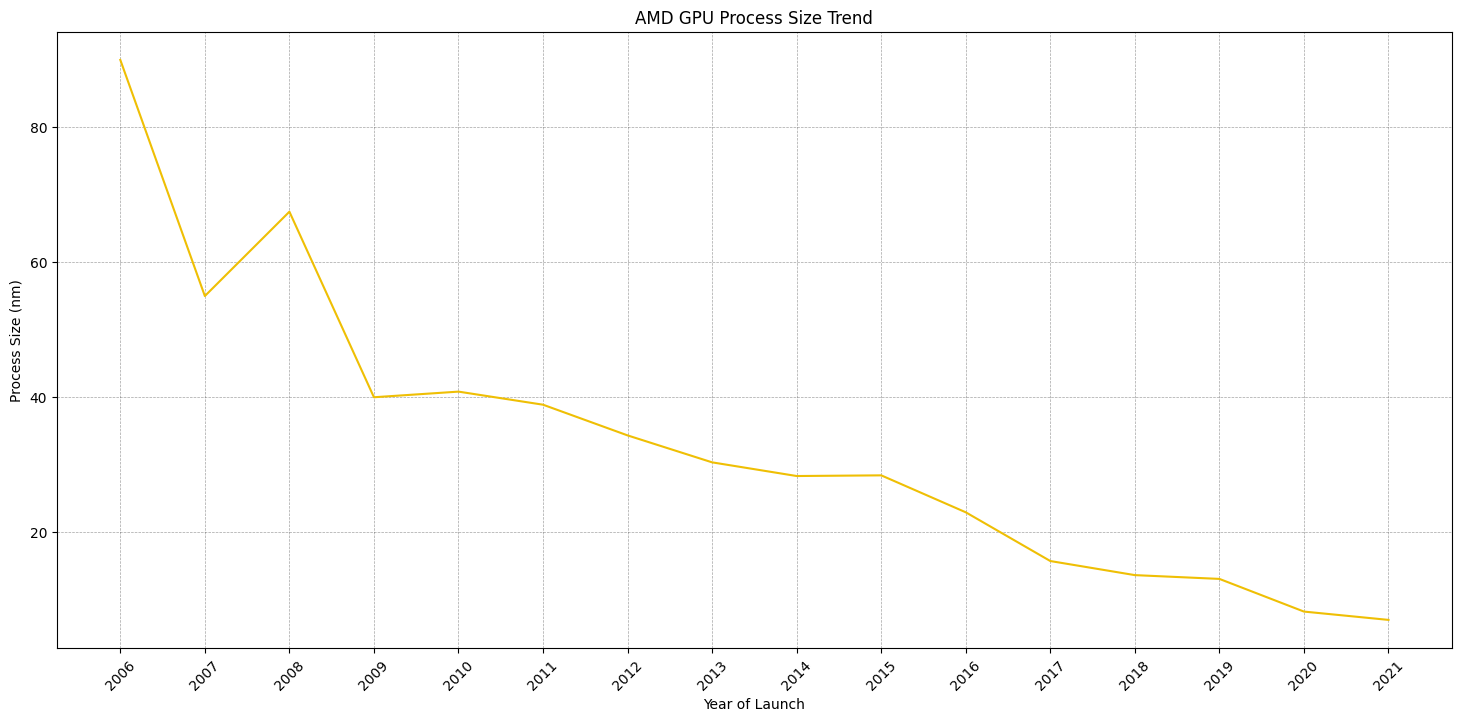

In [48]:
# AMD CPU Line Graph

mpl.figure(figsize=(18,8))
mpl.plot(df_ProcSize_AMDGPU['Year'],df_ProcSize_AMDGPU['Process_Size'], color='#efbf04')
mpl.title('AMD GPU Process Size Trend')
mpl.ylabel('Process Size (nm)')
mpl.xlabel('Year of Launch')
mpl.xticks(df_ProcSize_AMDGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

### Intel GPU Process Size Trend by Date

Sort Intel GPU <b>Data Frame</b> by <i>ascending</i> order

In [49]:
# Intel GPU Data Frame Ascending

df_ProcSize_IntelGPU = df_ProcSize_IntelGPU.sort_values(by='Date', ascending=True)
df_ProcSize_IntelGPU

Type                       Product      Date  Process_Size Vendor
4421  GPU           Intel i815 Graphics  1/1/2000         150.0  Intel
3736  GPU          Intel i830M Graphics  1/1/2001         150.0  Intel
3507  GPU         Intel i830MG Graphics  1/1/2002         150.0  Intel
3417  GPU        Intel Extreme Graphics  1/1/2002         150.0  Intel
3276  GPU                 Intel GMA 900  1/1/2005         130.0  Intel
...   ...                           ...       ...           ...    ...
4007  GPU        Intel HD Graphics 5500  9/5/2014          14.0  Intel
4018  GPU  Intel Iris Pro Graphics 6200  9/5/2014          14.0  Intel
2441  GPU      Intel Iris Graphics 6100  9/5/2014          14.0  Intel
4737  GPU              Intel Xe DG1 OEM       NaT          10.0  Intel
4054  GPU              Intel Xe DG1-SDV       NaT          10.0  Intel

[150 rows x 5 columns]

Sort Intel GPU <b>Data Frame</b> by <i>descending</i> order

In [50]:
# Intel GPU Data Frame Descending

df_ProcSize_IntelGPU = df_ProcSize_IntelGPU.sort_values(by='Date', ascending=False)
df_ProcSize_IntelGPU

Type                       Product      Date  Process_Size Vendor
4054  GPU              Intel Xe DG1-SDV       NaT          10.0  Intel
4737  GPU              Intel Xe DG1 OEM       NaT          10.0  Intel
3200  GPU  Intel Iris Pro Graphics 6200  9/5/2014          14.0  Intel
4457  GPU        Intel HD Graphics 5600  9/5/2014          14.0  Intel
2238  GPU        Intel HD Graphics 5300  9/5/2014          14.0  Intel
...   ...                           ...       ...           ...    ...
3276  GPU                 Intel GMA 900  1/1/2005         130.0  Intel
3507  GPU         Intel i830MG Graphics  1/1/2002         150.0  Intel
3417  GPU        Intel Extreme Graphics  1/1/2002         150.0  Intel
3736  GPU          Intel i830M Graphics  1/1/2001         150.0  Intel
4421  GPU           Intel i815 Graphics  1/1/2000         150.0  Intel

[150 rows x 5 columns]

Format Intel GPU by <b>Date</b> and remove special values

In [51]:
# Formatting Date of Intel GPUs and Removal of Special Values

df_ProcSize_IntelGPU['Date'] = pd.to_datetime(df_ProcSize_IntelGPU['Date'])
df_ProcSize_IntelGPU['Year'] = df_ProcSize_IntelGPU['Date'].dt.year
df_ProcSize_IntelGPU = df_ProcSize_IntelGPU[pd.notna(df_ProcSize_IntelGPU['Date'])]
df_ProcSize_IntelGPU = df_ProcSize_IntelGPU.groupby('Year')['Process_Size'].mean().reset_index()
df_ProcSize_IntelGPU

Year  Process_Size
0   2000.0    150.000000
1   2001.0    150.000000
2   2002.0    150.000000
3   2003.0    130.000000
4   2004.0    130.000000
5   2005.0    103.333333
6   2006.0     90.000000
7   2007.0     78.750000
8   2008.0     72.222222
9   2010.0     42.400000
10  2011.0     32.000000
11  2012.0     22.000000
12  2013.0     22.000000
13  2014.0     14.000000
14  2015.0     14.000000
15  2016.0     14.000000
16  2017.0     14.000000
17  2018.0     14.000000
18  2019.0     12.666667
19  2020.0     11.428571
20  2021.0     14.000000

#### Intel GPU Process Size Trend Graph

Create Line Graph of Intel GPU Process Size Trend

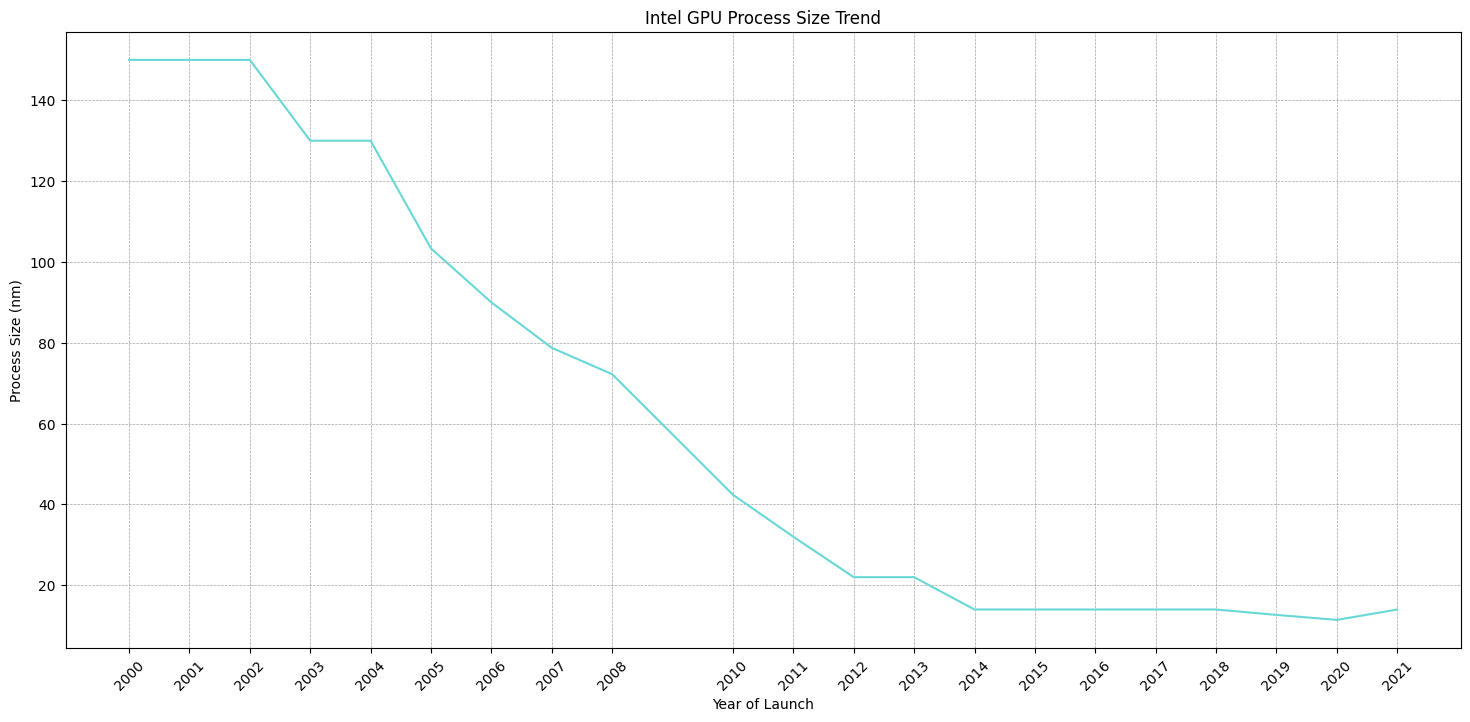

In [52]:
# Intel GPU Line Graph

mpl.figure(figsize=(18,8))
mpl.plot(df_ProcSize_IntelGPU['Year'],df_ProcSize_IntelGPU['Process_Size'], color='#68D8D6')
mpl.title('Intel GPU Process Size Trend')
mpl.ylabel('Process Size (nm)')
mpl.xlabel('Year of Launch')
mpl.xticks(df_ProcSize_IntelGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

### NVIDIA GPU Process Size Trend by Date

Sort NVIDIA GPU <b>Data Frame</b> by <i>ascending</i> order

In [53]:
# NVIDIA GPU Data Frame Ascending

df_ProcSize_NvidiaGPU = df_ProcSize_NvidiaGPU.sort_values(by='Date', ascending=True)
df_ProcSize_NvidiaGPU

Type                        Product      Date  Process_Size  Vendor
4244  GPU         NVIDIA GeForce 6600 LE  1/1/2005         110.0  NVIDIA
2331  GPU         NVIDIA GeForce 6600 VE  1/1/2005         110.0  NVIDIA
3473  GPU     NVIDIA GeForce 6600 LE AGP  1/1/2005         110.0  NVIDIA
4621  GPU           NVIDIA GeForce 940MX  1/1/2016          28.0  NVIDIA
4545  GPU          NVIDIA Jetson TX2 GPU  1/1/2016          16.0  NVIDIA
...   ...                            ...       ...           ...     ...
2724  GPU         NVIDIA GRID RTX T10-16       NaT          12.0  NVIDIA
4798  GPU      NVIDIA Quadro T400 Mobile       NaT          12.0  NVIDIA
4233  GPU                NVIDIA NVS 1000       NaT          28.0  NVIDIA
3893  GPU            NVIDIA GeForce 705M       NaT          40.0  NVIDIA
4326  GPU  NVIDIA Playstation 3 GPU 65nm       NaT          65.0  NVIDIA

[1201 rows x 5 columns]

Sort NVIDIA GPU <b>Data Frame</b> by <i>descending</i> order

In [54]:
# NVIDIA GPU Data Frame Descending

df_ProcSize_NvidiaGPU = df_ProcSize_NvidiaGPU.sort_values(by='Date', ascending=False)
df_ProcSize_NvidiaGPU

Type                          Product      Date  Process_Size  Vendor
4326  GPU    NVIDIA Playstation 3 GPU 65nm       NaT          65.0  NVIDIA
4383  GPU            NVIDIA GRID RTX T10-4       NaT          12.0  NVIDIA
4334  GPU  NVIDIA GeForce GTX 480 Core 512       NaT          40.0  NVIDIA
2494  GPU        NVIDIA Quadro T600 Mobile       NaT          12.0  NVIDIA
2221  GPU           NVIDIA Jetson Nano GPU       NaT          20.0  NVIDIA
...   ...                              ...       ...           ...     ...
4470  GPU          NVIDIA GeForce GTX 965M  1/1/2016          28.0  NVIDIA
3173  GPU             NVIDIA GeForce 940MX  1/1/2016          28.0  NVIDIA
3473  GPU       NVIDIA GeForce 6600 LE AGP  1/1/2005         110.0  NVIDIA
2331  GPU           NVIDIA GeForce 6600 VE  1/1/2005         110.0  NVIDIA
4244  GPU           NVIDIA GeForce 6600 LE  1/1/2005         110.0  NVIDIA

[1201 rows x 5 columns]

Format NVIDIA GPU by <b>Date</b> and remove special values

In [55]:
# Formatting Date of NVIDIA GPUs and Removal of Special Values

df_ProcSize_NvidiaGPU['Date'] = pd.to_datetime(df_ProcSize_NvidiaGPU['Date'])
df_ProcSize_NvidiaGPU['Year'] = df_ProcSize_NvidiaGPU['Date'].dt.year
df_ProcSize_NvidiaGPU = df_ProcSize_NvidiaGPU[pd.notna(df_ProcSize_NvidiaGPU['Date'])]
df_ProcSize_NvidiaGPU = df_ProcSize_NvidiaGPU.groupby('Year')['Process_Size'].mean().reset_index()
df_ProcSize_NvidiaGPU

Year  Process_Size
0   2000.0    176.153846
1   2001.0    167.647059
2   2002.0    150.000000
3   2003.0    140.943396
4   2004.0    122.068966
5   2005.0    119.189189
6   2006.0     93.000000
7   2007.0     79.375000
8   2008.0     65.104167
9   2009.0     53.139308
10  2010.0     41.986906
11  2011.0     39.844156
12  2012.0     33.260274
13  2013.0     28.638298
14  2014.0     29.125000
15  2015.0     27.864407
16  2016.0     22.454545
17  2017.0     17.136364
18  2018.0     14.000000
19  2019.0     12.604651
20  2020.0     10.868421
21  2021.0      8.615385

#### NVIDIA GPU Process Size Trend Graph

Create Line Graph of NVIDIA GPU Process Size Trend

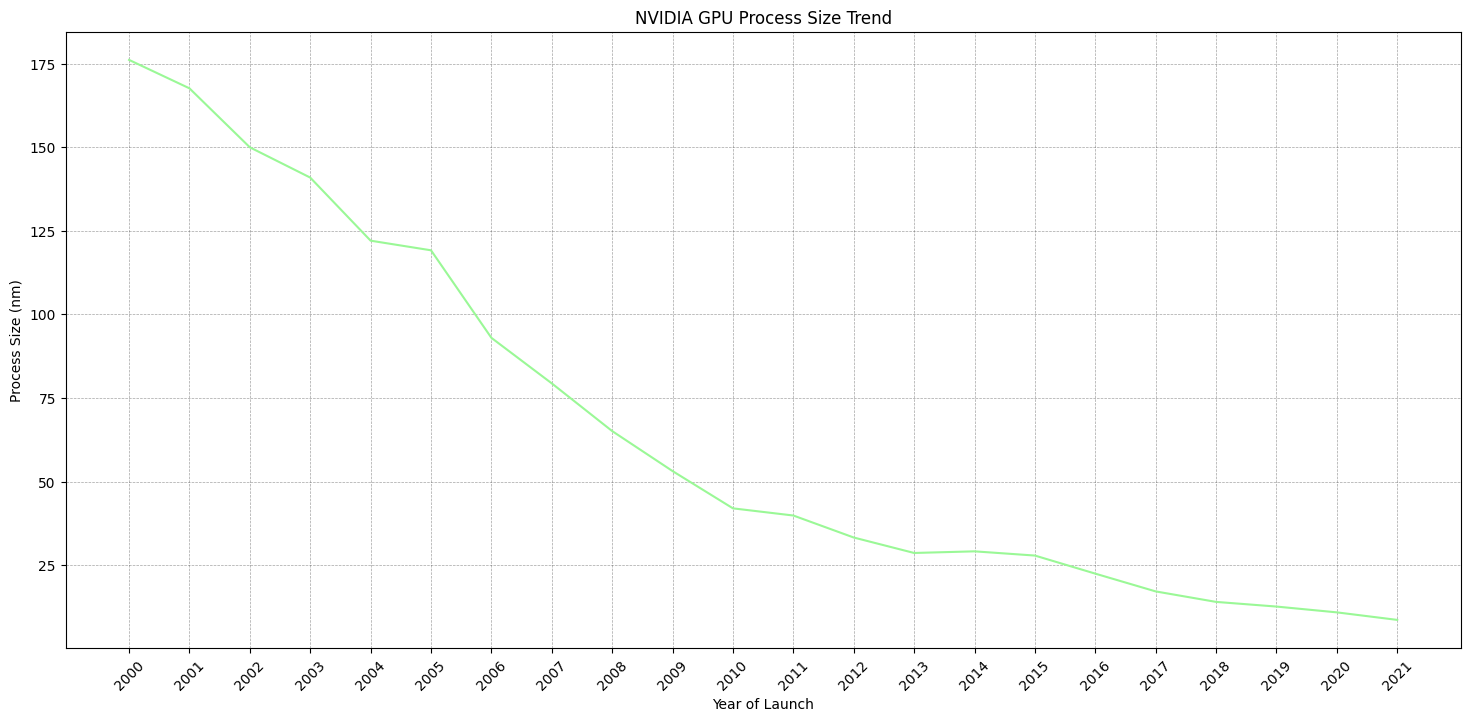

In [56]:
# NVIDIA GPU Line Graph

mpl.figure(figsize=(18,8))
mpl.plot(df_ProcSize_NvidiaGPU['Year'],df_ProcSize_NvidiaGPU['Process_Size'], color='#9AF896')
mpl.title('NVIDIA GPU Process Size Trend')
mpl.ylabel('Process Size (nm)')
mpl.xlabel('Year of Launch')
mpl.xticks(df_ProcSize_NvidiaGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

### ATI GPU Process Size Trend by Date

Sort ATI GPU <b>Data Frame</b> by <i>ascending</i> order

In [57]:
# ATI GPU Data Frame Ascending

df_ProcSize_ATIGPU = df_ProcSize_ATIGPU.sort_values(by='Date', ascending=True)
df_ProcSize_ATIGPU

Type                       Product      Date  Process_Size Vendor
4252  GPU      ATI Mobility FireGL 9000  1/1/2002         150.0    ATI
4369  GPU    ATI Radeon Xpress 200M IGP  1/1/2005         130.0    ATI
4603  GPU  ATI Mobility Radeon X200 IGP  1/1/2005         130.0    ATI
2885  GPU  ATI Mobility Radeon X300 IGP  1/1/2005         110.0    ATI
3754  GPU  ATI Mobility Radeon X200 IGP  1/1/2005         110.0    ATI
...   ...                           ...       ...           ...    ...
3976  GPU        ATI Radeon HD 2950 PRO       NaT          55.0    ATI
2515  GPU      ATI Radeon X1600 XT Dual       NaT          90.0    ATI
2453  GPU      ATI Radeon 9800 PRO MAXX       NaT         150.0    ATI
4336  GPU            ATI Radeon 8500 XT       NaT         150.0    ATI
2418  GPU         ATI Radeon HD 3850 X3       NaT          55.0    ATI

[535 rows x 5 columns]

Sort ATI GPU <b>Data Frame</b> by <i>descending</i> order

In [58]:
# ATI GPU Data Frame Descending

df_ProcSize_ATIGPU = df_ProcSize_ATIGPU.sort_values(by='Date', ascending=False)
df_ProcSize_ATIGPU

Type                            Product      Date  Process_Size Vendor
2418  GPU              ATI Radeon HD 3850 X3       NaT          55.0    ATI
4336  GPU                 ATI Radeon 8500 XT       NaT         150.0    ATI
2453  GPU           ATI Radeon 9800 PRO MAXX       NaT         150.0    ATI
2515  GPU           ATI Radeon X1600 XT Dual       NaT          90.0    ATI
3976  GPU             ATI Radeon HD 2950 PRO       NaT          55.0    ATI
...   ...                                ...       ...           ...    ...
2885  GPU       ATI Mobility Radeon X300 IGP  1/1/2005         110.0    ATI
4369  GPU         ATI Radeon Xpress 200M IGP  1/1/2005         130.0    ATI
3115  GPU  ATI Radeon Xpress 1100 Mobile IGP  1/1/2005         110.0    ATI
4503  GPU  ATI Radeon Xpress 1100 Mobile IGP  1/1/2005         130.0    ATI
4252  GPU           ATI Mobility FireGL 9000  1/1/2002         150.0    ATI

[535 rows x 5 columns]

Format ATI GPU by <b>Date</b> and remove special values

In [59]:
# Formatting Date of ATI GPUs and Removal of Special Values

df_ProcSize_ATIGPU['Date'] = pd.to_datetime(df_ProcSize_ATIGPU['Date'])
df_ProcSize_ATIGPU['Year'] = df_ProcSize_ATIGPU['Date'].dt.year
df_ProcSize_ATIGPU = df_ProcSize_ATIGPU[pd.notna(df_ProcSize_ATIGPU['Date'])]
df_ProcSize_ATIGPU = df_ProcSize_ATIGPU.groupby('Year')['Process_Size'].mean().reset_index()
df_ProcSize_ATIGPU

Year  Process_Size
0   2000.0    157.292654
1   2001.0    160.222156
2   2002.0    157.777778
3   2003.0    145.476190
4   2004.0    127.812500
5   2005.0    108.113208
6   2006.0     92.750000
7   2007.0     81.325301
8   2008.0     59.453125
9   2009.0     52.608696
10  2010.0     44.642857
11  2011.0     45.000000
12  2012.0     46.000000
13  2013.0     45.000000

#### ATI GPU Process Size Trend Graph

Create Line Graph of ATI GPU Process Size Trend

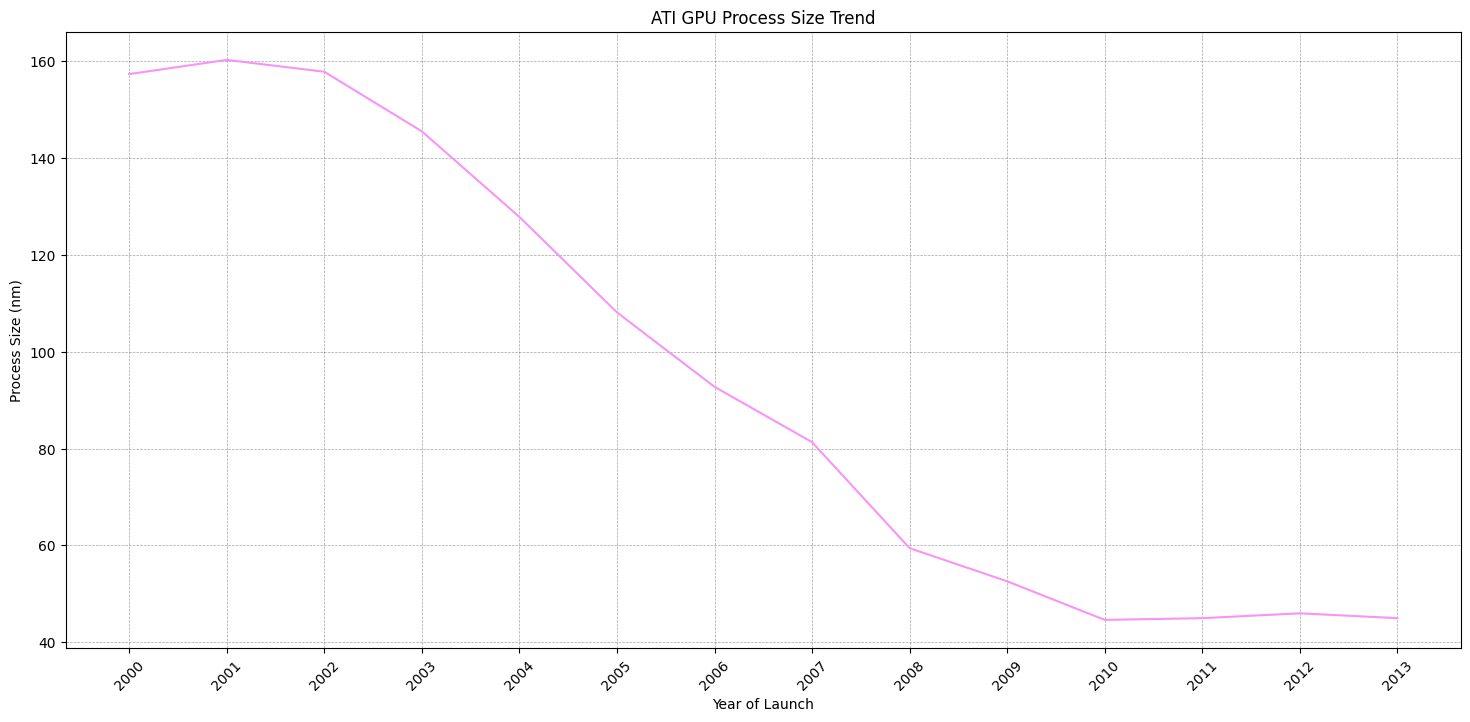

In [60]:
# ATI GPU Line Graph

mpl.figure(figsize=(18,8))
mpl.plot(df_ProcSize_ATIGPU['Year'],df_ProcSize_ATIGPU['Process_Size'], color='#F794F6')
mpl.title('ATI GPU Process Size Trend')
mpl.ylabel('Process Size (nm)')
mpl.xlabel('Year of Launch')
mpl.xticks(df_ProcSize_ATIGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

### Other Brand GPU Process Size Trend by Date

Sort Other Brand(s) GPU <b>Data Frame</b> by <i>ascending</i> order

In [61]:
# Other Brand GPU Data Frame Ascending

df_ProcSize_OtherGPU = df_ProcSize_OtherGPU.sort_values(by='Date', ascending=True)
df_ProcSize_OtherGPU

Type                        Product      Date  Process_Size Vendor
2709  GPU          Matrox Parhelia HR256  1/1/2001    150.000000  Other
4138  GPU  Matrox Parhelia Precision SGT  1/1/2001    150.000000  Other
3290  GPU            Matrox Parhelia PCI  1/1/2001    150.000000  Other
3546  GPU          Matrox Parhelia DL256  1/1/2001    150.000000  Other
3056  GPU  Matrox Parhelia Precision SDT  1/1/2001    150.000000  Other
...   ...                            ...       ...           ...    ...
3733  GPU          3dfx Voodoo5 5000 PCI       NaT    250.000000  Other
4050  GPU              3dfx Spectre 3000       NaT     55.109598  Other
2855  GPU          Matrox M9125 PCIe x16       NaT     90.000000  Other
3445  GPU  3dfx Voodoo4-2 4200 PCI 32 MB       NaT    180.000000  Other
2300  GPU        3dfx Voodoo4-2 4800 AGP       NaT    180.000000  Other

[64 rows x 5 columns]

Sort Other Brand GPU <b>Data Frame</b> by <i>descending</i> order

In [62]:
# Other Brand GPU Data Frame Descending

df_ProcSize_OtherGPU = df_ProcSize_OtherGPU.sort_values(by='Date', ascending=False)
df_ProcSize_OtherGPU

Type                        Product      Date  Process_Size Vendor
2300  GPU        3dfx Voodoo4-2 4800 AGP       NaT         180.0  Other
4231  GPU          3dfx Voodoo5 5000 AGP       NaT         250.0  Other
4731  GPU        3dfx Voodoo4-2 4000 AGP       NaT         180.0  Other
4725  GPU         Matrox Millennium G450       NaT         180.0  Other
2237  GPU              3dfx Spectre 1000       NaT         180.0  Other
...   ...                            ...       ...           ...    ...
3546  GPU          Matrox Parhelia DL256  1/1/2001         150.0  Other
3290  GPU            Matrox Parhelia PCI  1/1/2001         150.0  Other
4138  GPU  Matrox Parhelia Precision SGT  1/1/2001         150.0  Other
3056  GPU  Matrox Parhelia Precision SDT  1/1/2001         150.0  Other
2709  GPU          Matrox Parhelia HR256  1/1/2001         150.0  Other

[64 rows x 5 columns]

Format Other Brand GPU by <b>Date</b> and remove special values

In [63]:
# Formatting Date of Other Brand(s) GPUs and Removal of Special Values

df_ProcSize_OtherGPU['Date'] = pd.to_datetime(df_ProcSize_OtherGPU['Date'])
df_ProcSize_OtherGPU['Year'] = df_ProcSize_OtherGPU['Date'].dt.year
df_ProcSize_OtherGPU = df_ProcSize_OtherGPU[pd.notna(df_ProcSize_OtherGPU['Date'])]
df_ProcSize_OtherGPU = df_ProcSize_OtherGPU.groupby('Year')['Process_Size'].mean().reset_index()
df_ProcSize_OtherGPU

Year  Process_Size
0  2000.0    250.000000
1  2001.0    161.250000
2  2002.0    158.571429
3  2003.0    130.000000
4  2004.0     55.714286
5  2005.0    110.000000
6  2006.0    150.000000
7  2007.0     65.000000
8  2011.0     32.000000

#### Other Brand GPU Process Size Trend Graph

Create Line Graph of Other Brand GPU Process Size Trend

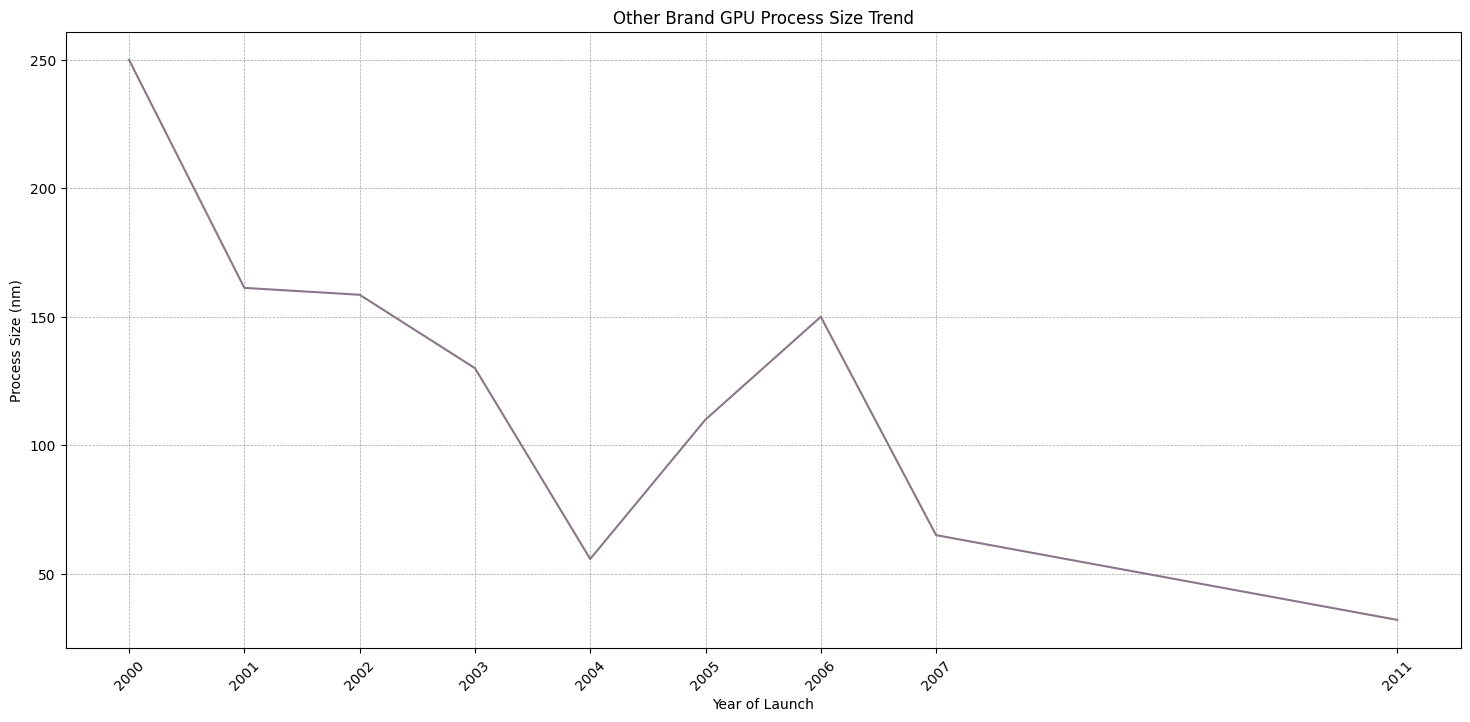

In [64]:
# Other Brand GPU Line Graph

mpl.figure(figsize=(18,8))
mpl.plot(df_ProcSize_OtherGPU['Year'],df_ProcSize_OtherGPU['Process_Size'], color='#8A7689')
mpl.title('Other Brand GPU Process Size Trend')
mpl.ylabel('Process Size (nm)')
mpl.xlabel('Year of Launch')
mpl.xticks(df_ProcSize_OtherGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

### Correlation between GPU TDP & Process Size

Create seperate <b>Data Frames</b> with <i>TDP</i> and <i>Process Size</i> for each vendor and drop irrelevant columns

In [65]:
df_TDPProcSize_AMDGPU = df.copy()
df_TDPProcSize_AMDGPU = df_TDPProcSize_AMDGPU[['Product', 'Type', 'Date', 'TDP', 'Process_Size', 'Vendor']].where((df_TDPProcSize_AMDGPU['Type']=='GPU') & (df_TDPProcSize_AMDGPU['Vendor']=='AMD')).dropna()
df_TDPProcSize_AMDGPU.head(10)

Product Type        Date         TDP  \
2203                  AMD Wii U GPU  GPU  11/18/2012   33.000000   
2204             AMD Radeon RX 6800  GPU  10/28/2020  250.000000   
2209         AMD Radeon HD 8400 IGP  GPU  11/23/2013   25.000000   
2217  AMD Radeon R7 Mobile Graphics  GPU  11/15/2015   15.000000   
2223           AMD Radeon RX 560 XT  GPU   3/13/2019  150.000000   
2228         AMD Radeon HD 7350 OEM  GPU    1/5/2012   19.000000   
2232             AMD Radeon R7 M445  GPU   5/15/2016   81.359981   
2242             AMD Radeon R5 M255  GPU  10/12/2014   81.359981   
2246            AMD Radeon HD 7450A  GPU    1/5/2012   25.000000   
2255         AMD Radeon Pro Vega II  GPU    6/3/2019  475.000000   

      Process_Size Vendor  
2203          40.0    AMD  
2204           7.0    AMD  
2209          28.0    AMD  
2217          28.0    AMD  
2223          14.0    AMD  
2228          40.0    AMD  
2232          28.0    AMD  
2242          28.0    AMD  
2246          40.0    AMD  
2255           7.0    AMD

In [66]:
df_TDPProcSize_IntelGPU = df.copy()
df_TDPProcSize_IntelGPU = df_TDPProcSize_IntelGPU[['Product', 'Type', 'Date', 'TDP', 'Process_Size', 'Vendor']].where((df_TDPProcSize_IntelGPU['Type']=='GPU') & (df_TDPProcSize_IntelGPU['Vendor']=='Intel')).dropna()
df_TDPProcSize_IntelGPU.head(10)

Product Type       Date        TDP  Process_Size Vendor
2192       Intel Xeon E3-1275  GPU   4/3/2011  95.000000          32.0  Intel
2195            Intel GMA 500  GPU   3/2/2008  81.359981         130.0  Intel
2202   Intel UHD Graphics 630  GPU  4/30/2020  15.000000          14.0  Intel
2205        Intel HD Graphics  GPU  4/29/2013  45.000000          22.0  Intel
2207  Intel Iris Graphics 540  GPU   9/1/2015  15.000000          14.0  Intel
2222   Intel HD Graphics 3000  GPU   2/1/2011  81.359981          32.0  Intel
2224       Intel UHD Graphics  GPU  8/21/2019  15.000000          14.0  Intel
2238   Intel HD Graphics 5300  GPU   9/5/2014  15.000000          14.0  Intel
2288    Intel HD Graphics 620  GPU  8/30/2016  15.000000          14.0  Intel
2320    Intel HD Graphics 520  GPU   9/1/2015  15.000000          14.0  Intel

In [67]:
df_TDPProcSize_NvidiaGPU = df.copy()
df_TDPProcSize_NvidiaGPU = df_TDPProcSize_NvidiaGPU[['Product', 'Type', 'Date', 'TDP', 'Process_Size', 'Vendor']].where((df_TDPProcSize_NvidiaGPU['Type']=='GPU') & (df_TDPProcSize_NvidiaGPU['Vendor']=='NVIDIA')).dropna()
df_TDPProcSize_NvidiaGPU.head(10)

Product Type       Date         TDP  Process_Size  \
2194    NVIDIA GeForce MX150 GP107  GPU  2/23/2019   25.000000          14.0   
2197        NVIDIA GeForce 7100 GS  GPU   8/8/2006   81.359981         110.0   
2199        NVIDIA GeForce 6800 XT  GPU  9/30/2005   81.359981         130.0   
2201                    NVIDIA ION  GPU   6/3/2008   20.000000          65.0   
2206    NVIDIA GeForce GTX 760 OEM  GPU  6/27/2013  130.000000          28.0   
2208        NVIDIA GeForce GT 445M  GPU   9/3/2010   35.000000          40.0   
2211  NVIDIA Tesla V100 SXM2 32 GB  GPU  3/27/2018  250.000000          12.0   
2212             NVIDIA Tesla C870  GPU   5/2/2007  171.000000          90.0   
2213        NVIDIA GeForce GTX 470  GPU  3/26/2010  215.000000          40.0   
2214        NVIDIA GeForce GT 735M  GPU   4/1/2013   33.000000          28.0   

      Vendor  
2194  NVIDIA  
2197  NVIDIA  
2199  NVIDIA  
2201  NVIDIA  
2206  NVIDIA  
2208  NVIDIA  
2211  NVIDIA  
2212  NVIDIA  
2213  NVIDIA  
2214  NVIDIA

In [68]:
df_TDPProcSize_ATIGPU = df.copy()
df_TDPProcSize_ATIGPU = df_TDPProcSize_ATIGPU[['Product', 'Type', 'Date', 'TDP', 'Process_Size', 'Vendor']].where((df_TDPProcSize_ATIGPU['Type']=='GPU') & (df_TDPProcSize_ATIGPU['Vendor']=='ATI')).dropna()
df_TDPProcSize_ATIGPU.head(10)

Product Type        Date         TDP  \
2196          ATI Radeon HD 4350 AGP  GPU   9/30/2008   20.000000   
2198             ATI Radeon X700 AGP  GPU    9/1/2004   44.000000   
2200          ATI Radeon HD 2900 PRO  GPU  12/12/2007  200.000000   
2210            ATI Radeon E4690 MXM  GPU    6/1/2009   30.000000   
2218           ATI Xbox 360 GPU 80nm  GPU  10/27/2007  175.000000   
2226    ATI Mobility Radeon 9600 PRO  GPU    6/1/2004   81.359981   
2230          ATI All-In-Wonder 9500  GPU    7/1/2002   81.359981   
2234             ATI Radeon X800 GTO  GPU  12/29/2007   49.000000   
2236  ATI Mobility Radeon HD 3870 X2  GPU    9/1/2008  110.000000   
2243        ATI Radeon X1600 PRO AGP  GPU   10/1/2007   41.000000   

      Process_Size Vendor  
2196          55.0    ATI  
2198         110.0    ATI  
2200          80.0    ATI  
2210          55.0    ATI  
2218          80.0    ATI  
2226         130.0    ATI  
2230         150.0    ATI  
2234         130.0    ATI  
2236          55.0    ATI  
2243          90.0    ATI

In [69]:
df_TDPProcSize_OtherGPU = df.copy()
df_TDPProcSize_OtherGPU = df_TDPProcSize_OtherGPU[['Product', 'Type', 'Date', 'TDP', 'Process_Size', 'Vendor']].where((df_TDPProcSize_OtherGPU['Type']=='GPU') & (df_TDPProcSize_OtherGPU['Vendor']=='Other')).dropna()
df_TDPProcSize_OtherGPU.head(10)

Product Type        Date        TDP  \
2193              Matrox Parhelia 128 MB  GPU   6/25/2002  81.359981   
2237                   3dfx Spectre 1000  GPU         NaT  30.000000   
2239                  Matrox QID LP PCIe  GPU  12/17/2004  81.359981   
2270                   3dfx Spectre 2000  GPU         NaT  30.000000   
2290             XGI Volari Duo V5 Ultra  GPU   9/15/2003  81.359981   
2300             3dfx Voodoo4-2 4800 AGP  GPU         NaT  15.000000   
2317        Sony Playstation 2 GPU 180nm  GPU   4/18/2001  79.000000   
2381  Sony Playstation Portable GPU 90nm  GPU  12/12/2004   4.000000   
2392                       XGI Volari V8  GPU   9/15/2003  81.359981   
2422                  XGI Volari 8600 XT  GPU         NaT  81.359981   

      Process_Size Vendor  
2193    150.000000  Other  
2237    180.000000  Other  
2239      0.000000  Other  
2270     55.109598  Other  
2290    130.000000  Other  
2300    180.000000  Other  
2317    180.000000  Other  
2381     90.000000  Other  
2392    130.000000  Other  
2422    110.000000  Other

#### AMD GPU TDP & Process Size Trend 

Format AMD GPU by <b>Date</b> and remove special values

In [70]:
# Formatting Date of AMD GPUs and Removal of Special Values

df_TDPProcSize_AMDGPU['Date'] = pd.to_datetime(df_TDPProcSize_AMDGPU['Date'])
df_TDPProcSize_AMDGPU['Year'] = df_TDPProcSize_AMDGPU['Date'].dt.year
df_TDPProcSize_AMDGPU = df_TDPProcSize_AMDGPU[pd.notna(df_TDPProcSize_AMDGPU['Date'])]
df_TDPProcSize_AMDGPU = df_TDPProcSize_AMDGPU.groupby(['Year'])[['Process_Size', 'TDP']].mean().reset_index()
df_TDPProcSize_AMDGPU

Year  Process_Size         TDP
0   2006.0     90.000000  165.000000
1   2007.0     55.000000  105.000000
2   2008.0     67.500000   83.500000
3   2009.0     40.000000   30.000000
4   2010.0     40.833333   74.222222
5   2011.0     38.894737   65.089472
6   2012.0     34.344828   73.988506
7   2013.0     30.350515   83.400409
8   2014.0     28.324324  114.030262
9   2015.0     28.423529  103.584462
10  2016.0     22.947368   95.517187
11  2017.0     15.724138  120.195862
12  2018.0     13.636364   87.500000
13  2019.0     13.075472   88.138868
14  2020.0      8.233333  131.500000
15  2021.0      7.000000  125.833333

##### AMD GPU Process Size Trend Graph

Create Line Graph for AMD GPU <b>TDP</b> and <b>Process Size</b>

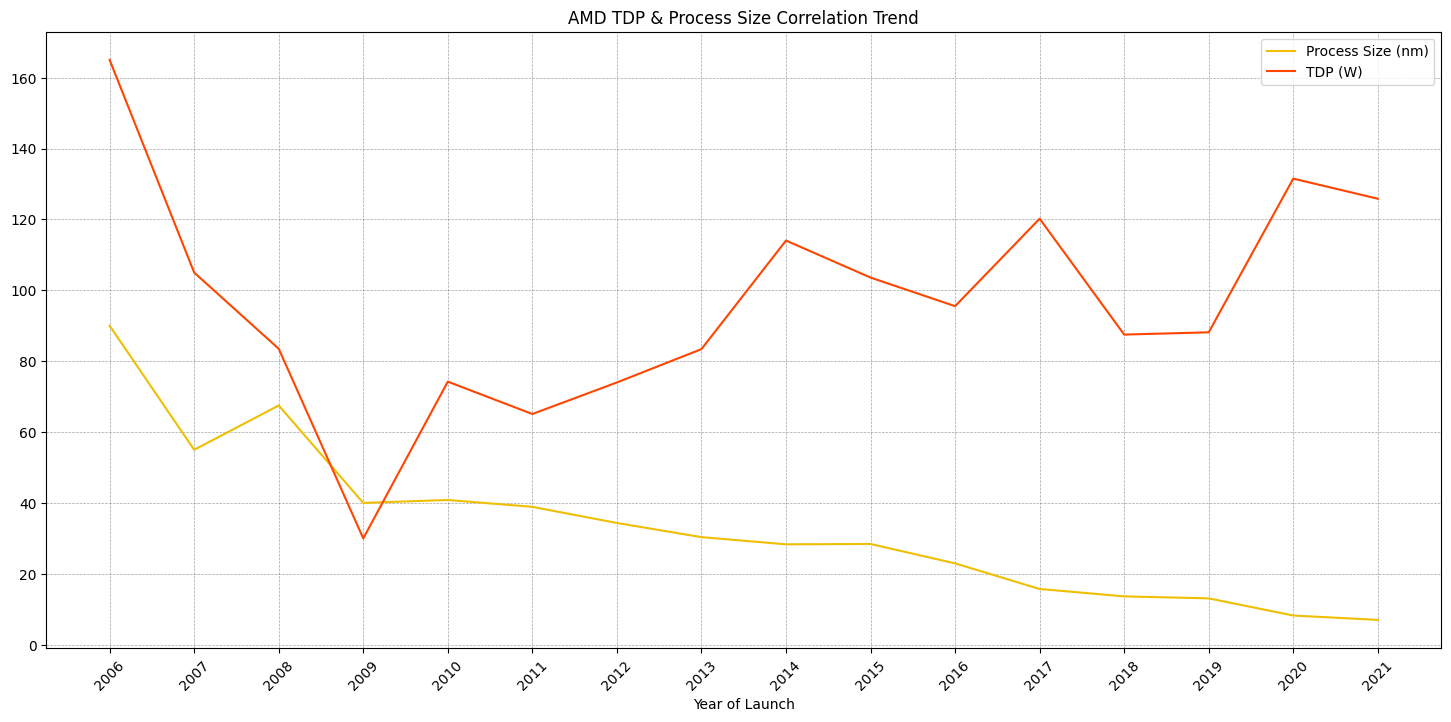

In [71]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TDPProcSize_AMDGPU['Year'], df_TDPProcSize_AMDGPU['Process_Size'], color='#efbf04', label="Process Size (nm)")
mpl.plot(df_TDPProcSize_AMDGPU['Year'], df_TDPProcSize_AMDGPU['TDP'], color='#FF4500', label="TDP (W)")
mpl.legend()
mpl.title('AMD TDP & Process Size Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TDPProcSize_AMDGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

#### Intel GPU TDP & Process Size Trend 

Format Intel GPU by <b>Date</b> and remove special values

In [72]:
# Formatting Date of Intel GPUs and Removal of Special Values

df_TDPProcSize_IntelGPU['Date'] = pd.to_datetime(df_TDPProcSize_IntelGPU['Date'])
df_TDPProcSize_IntelGPU['Year'] = df_TDPProcSize_IntelGPU['Date'].dt.year
df_TDPProcSize_IntelGPU = df_TDPProcSize_IntelGPU[pd.notna(df_TDPProcSize_IntelGPU['Date'])]
df_TDPProcSize_IntelGPU = df_TDPProcSize_IntelGPU.groupby(['Year'])[['Process_Size', 'TDP']].mean().reset_index()
df_TDPProcSize_IntelGPU

Year  Process_Size         TDP
0   2000.0    150.000000   81.359981
1   2001.0    150.000000   81.359981
2   2002.0    150.000000   81.359981
3   2003.0    130.000000   81.359981
4   2004.0    130.000000   81.359981
5   2005.0    103.333333   31.786660
6   2006.0     90.000000   12.142857
7   2007.0     78.750000   13.000000
8   2008.0     72.222222   20.373331
9   2010.0     42.400000  106.543992
10  2011.0     32.000000   83.064983
11  2012.0     22.000000  140.339995
12  2013.0     22.000000   79.588235
13  2014.0     14.000000   15.000000
14  2015.0     14.000000   12.500000
15  2016.0     14.000000   10.125000
16  2017.0     14.000000   12.142857
17  2018.0     14.000000   15.000000
18  2019.0     12.666667   15.000000
19  2020.0     11.428571   70.714286
20  2021.0     14.000000   15.000000

##### Intel GPU Process Size Trend Graph

Create Line Graph for Intel GPU <b>TDP</b> and <b>Process Size</b>

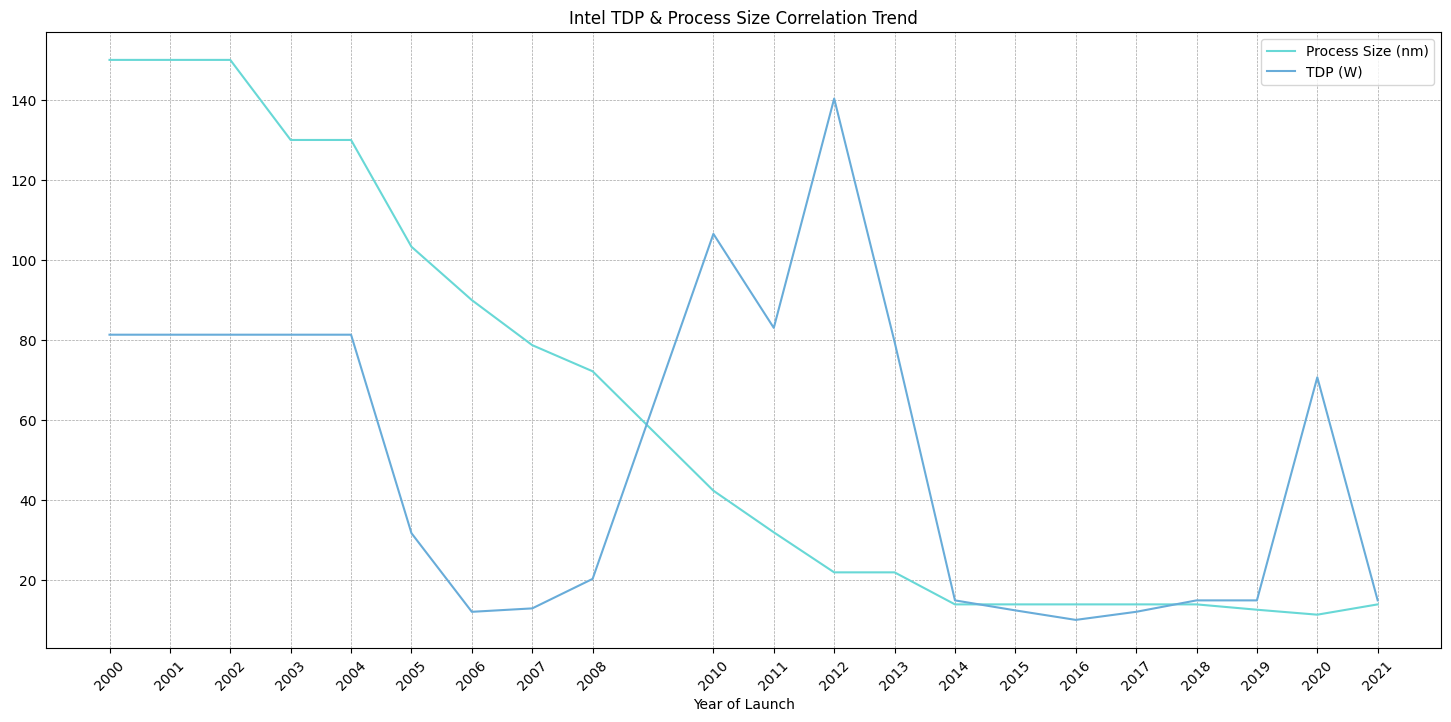

In [73]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TDPProcSize_IntelGPU['Year'], df_TDPProcSize_IntelGPU['Process_Size'], color='#68D8D6', label="Process Size (nm)")
mpl.plot(df_TDPProcSize_IntelGPU['Year'], df_TDPProcSize_IntelGPU['TDP'], color='#68ACD9', label="TDP (W)")
mpl.legend()
mpl.title('Intel TDP & Process Size Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TDPProcSize_IntelGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

#### Nvidia GPU TDP & Process Size Trend 

Format Nvidia GPU by <b>Date</b> and remove special values

In [74]:
# Formatting Date of Nvidia GPUs and Removal of Special Values

df_TDPProcSize_NvidiaGPU['Date'] = pd.to_datetime(df_TDPProcSize_NvidiaGPU['Date'])
df_TDPProcSize_NvidiaGPU['Year'] = df_TDPProcSize_NvidiaGPU['Date'].dt.year
df_TDPProcSize_NvidiaGPU = df_TDPProcSize_NvidiaGPU[pd.notna(df_TDPProcSize_NvidiaGPU['Date'])]
df_TDPProcSize_NvidiaGPU = df_TDPProcSize_NvidiaGPU.groupby(['Year'])[['Process_Size', 'TDP']].mean().reset_index()
df_TDPProcSize_NvidiaGPU

Year  Process_Size         TDP
0   2000.0    176.153846   69.150753
1   2001.0    167.647059   72.023513
2   2002.0    150.000000   81.359981
3   2003.0    140.943396   70.014325
4   2004.0    122.068966   74.448953
5   2005.0    119.189189   75.638907
6   2006.0     93.000000   63.625993
7   2007.0     79.375000   76.528124
8   2008.0     65.104167  120.380415
9   2009.0     53.139308   67.728814
10  2010.0     41.986906   73.352941
11  2011.0     39.844156  121.978701
12  2012.0     33.260274   76.452055
13  2013.0     28.638298  108.712766
14  2014.0     29.125000   79.006874
15  2015.0     27.864407   92.252201
16  2016.0     22.454545  129.433635
17  2017.0     17.136364   92.962727
18  2018.0     14.000000  163.316923
19  2019.0     12.604651  103.853953
20  2020.0     10.868421  140.167368
21  2021.0      8.615385  136.799996

##### Nvidia GPU Process Size Trend Graph

Create Line Graph for Nvidia GPU <b>TDP</b> and <b>Process Size</b>

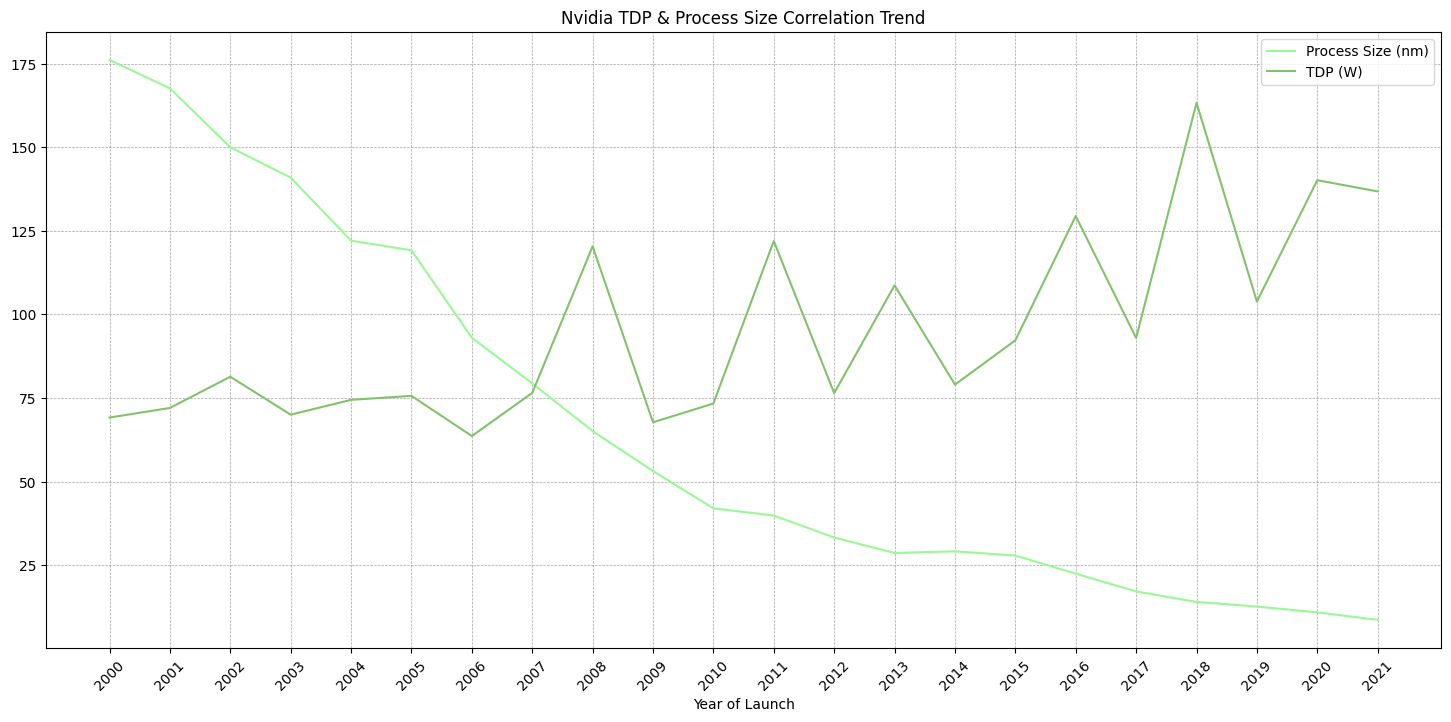

In [75]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TDPProcSize_NvidiaGPU['Year'], df_TDPProcSize_NvidiaGPU['Process_Size'], color='#9AF896', label="Process Size (nm)")
mpl.plot(df_TDPProcSize_NvidiaGPU['Year'], df_TDPProcSize_NvidiaGPU['TDP'], color='#82C26D', label="TDP (W)")
mpl.legend()
mpl.title('Nvidia TDP & Process Size Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TDPProcSize_NvidiaGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

#### ATI GPU TDP & Process Size Trend 

Format ATI GPU by <b>Date</b> and remove special values

In [76]:
# Formatting Date of ATI GPUs and Removal of Special Values

df_TDPProcSize_ATIGPU['Date'] = pd.to_datetime(df_TDPProcSize_ATIGPU['Date'])
df_TDPProcSize_ATIGPU['Year'] = df_TDPProcSize_ATIGPU['Date'].dt.year
df_TDPProcSize_ATIGPU = df_TDPProcSize_ATIGPU[pd.notna(df_TDPProcSize_ATIGPU['Date'])]
df_TDPProcSize_ATIGPU = df_TDPProcSize_ATIGPU.groupby(['Year'])[['Process_Size', 'TDP']].mean().reset_index()
df_TDPProcSize_ATIGPU

Year  Process_Size         TDP
0   2000.0    157.292654   46.221811
1   2001.0    160.222156   54.144338
2   2002.0    157.777778   66.179246
3   2003.0    145.476190   63.040940
4   2004.0    127.812500   63.539366
5   2005.0    108.113208   77.916969
6   2006.0     92.750000   67.743992
7   2007.0     81.325301   70.473727
8   2008.0     59.453125   69.587497
9   2009.0     52.608696   80.959123
10  2010.0     44.642857   62.681427
11  2011.0     45.000000   56.444444
12  2012.0     46.000000   42.000000
13  2013.0     45.000000  120.000000

##### ATI GPU Process Size Trend Graph

Create Line Graph for ATI GPU <b>TDP</b> and <b>Process Size</b>

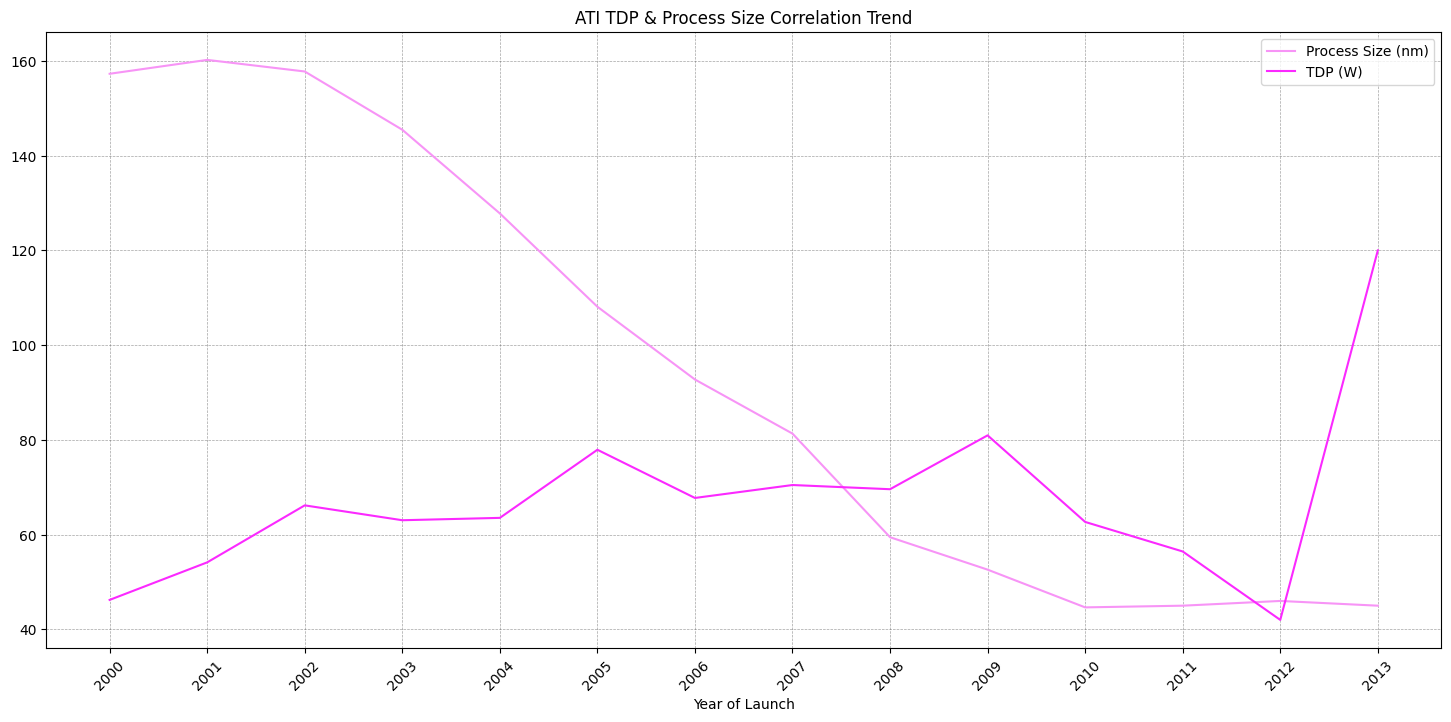

In [77]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TDPProcSize_ATIGPU['Year'], df_TDPProcSize_ATIGPU['Process_Size'], color='#F794F6', label="Process Size (nm)")
mpl.plot(df_TDPProcSize_ATIGPU['Year'], df_TDPProcSize_ATIGPU['TDP'], color='#FB29FF', label="TDP (W)")
mpl.legend()
mpl.title('ATI TDP & Process Size Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TDPProcSize_ATIGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

#### Other Brand(s) GPU TDP & Process Size Trend 

Format Other Brand GPU by <b>Date</b> and remove special values

In [78]:
# Formatting Date of Other Brand GPUs and Removal of Special Values

df_TDPProcSize_OtherGPU['Date'] = pd.to_datetime(df_TDPProcSize_OtherGPU['Date'])
df_TDPProcSize_OtherGPU['Year'] = df_TDPProcSize_OtherGPU['Date'].dt.year
df_TDPProcSize_OtherGPU = df_TDPProcSize_OtherGPU[pd.notna(df_TDPProcSize_OtherGPU['Date'])]
df_TDPProcSize_OtherGPU = df_TDPProcSize_OtherGPU.groupby(['Year'])[['Process_Size', 'TDP']].mean().reset_index()
df_TDPProcSize_OtherGPU

Year  Process_Size        TDP
0  2000.0    250.000000  33.800000
1  2001.0    161.250000  81.064983
2  2002.0    158.571429  81.359981
3  2003.0    130.000000  81.359981
4  2004.0     55.714286  70.308555
5  2005.0    110.000000  63.179991
6  2006.0    150.000000  81.359981
7  2007.0     65.000000  24.500000
8  2011.0     32.000000   4.000000

##### Other Brand GPU Process Size Trend Graph

Create Line Graph for Other Brand GPU <b>TDP</b> and <b>Process Size</b>

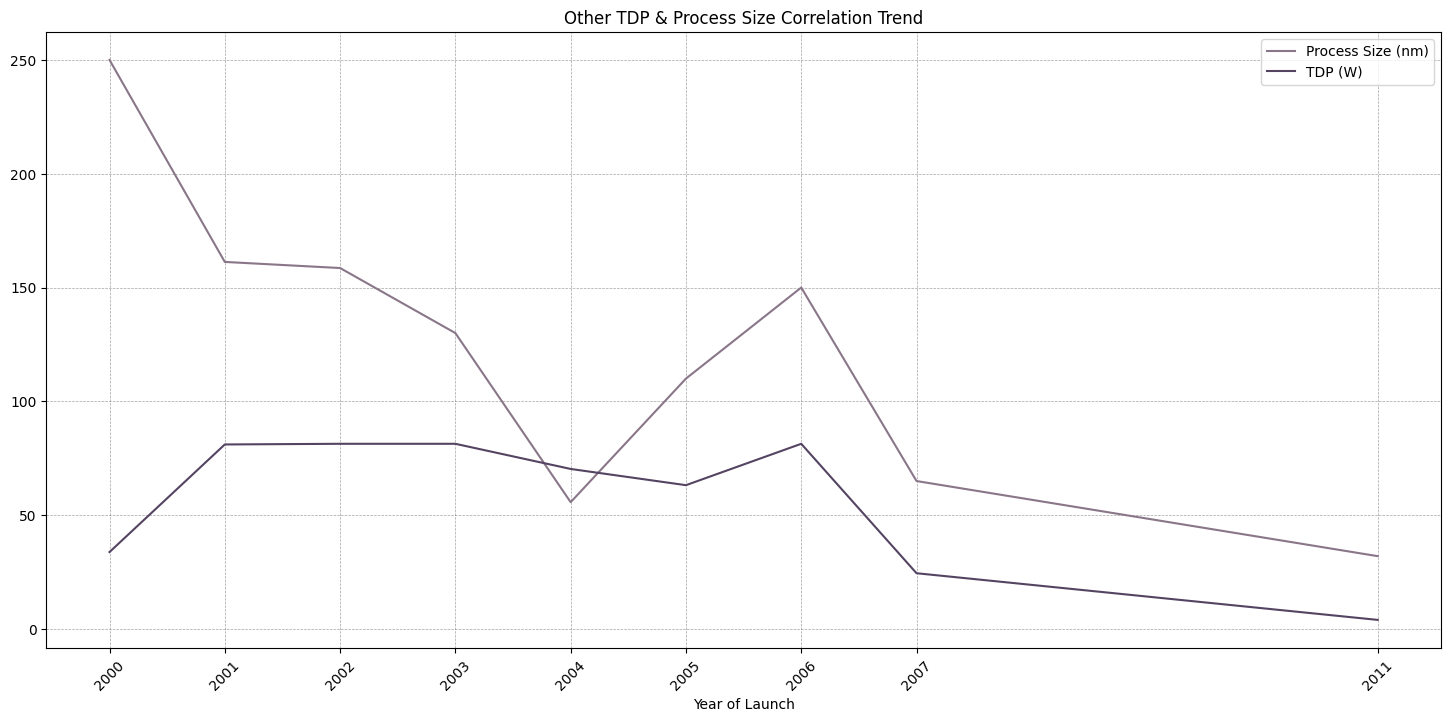

In [79]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TDPProcSize_OtherGPU['Year'], df_TDPProcSize_OtherGPU['Process_Size'], color='#8A7689', label="Process Size (nm)")
mpl.plot(df_TDPProcSize_OtherGPU['Year'], df_TDPProcSize_OtherGPU['TDP'], color='#544462', label="TDP (W)")
mpl.legend()
mpl.title('Other TDP & Process Size Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TDPProcSize_OtherGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)

### Top AMD GPUs based on Frequency

Create seperate <b>Data Frames</b> with <i>TDP</i> and <i>Frequency</i> for each vendor and drop irrelevant columns

In [80]:
df_Frequency_AMDGPU = df.copy()
df_Frequency_AMDGPU = df_Frequency_AMDGPU[['Product', 'Type', 'Date', 'TDP', 'Frequency', 'Vendor']].where((df_Frequency_AMDGPU['Type']=='GPU') & (df_Frequency_AMDGPU['Vendor']=='AMD')).dropna()
df_Frequency_AMDGPU.head(10)

Product Type        Date         TDP  Frequency  \
2203                  AMD Wii U GPU  GPU  11/18/2012   33.000000      550.0   
2204             AMD Radeon RX 6800  GPU  10/28/2020  250.000000     1700.0   
2209         AMD Radeon HD 8400 IGP  GPU  11/23/2013   25.000000      600.0   
2217  AMD Radeon R7 Mobile Graphics  GPU  11/15/2015   15.000000      200.0   
2223           AMD Radeon RX 560 XT  GPU   3/13/2019  150.000000     1074.0   
2228         AMD Radeon HD 7350 OEM  GPU    1/5/2012   19.000000      650.0   
2232             AMD Radeon R7 M445  GPU   5/15/2016   81.359981      780.0   
2242             AMD Radeon R5 M255  GPU  10/12/2014   81.359981      925.0   
2246            AMD Radeon HD 7450A  GPU    1/5/2012   25.000000      625.0   
2255         AMD Radeon Pro Vega II  GPU    6/3/2019  475.000000     1574.0   

     Vendor  
2203    AMD  
2204    AMD  
2209    AMD  
2217    AMD  
2223    AMD  
2228    AMD  
2232    AMD  
2242    AMD  
2246    AMD  
2255    AMD

Sort content of the <b>Data Frames</b> in Descending Order

In [81]:
df_Frequency_AMDGPU = df_Frequency_AMDGPU.sort_values(by='Frequency', ascending=False)
df_Frequency_AMDGPU = df_Frequency_AMDGPU.head(10)
df_Frequency_AMDGPU

Product Type        Date    TDP  \
3013                   AMD Radeon RX 6700 XT  GPU    3/3/2021  230.0   
4015                     AMD Radeon RX 6800M  GPU    1/1/2021  230.0   
4381                   AMD Playstation 5 GPU  GPU  11/12/2020  180.0   
3843                   AMD Radeon RX 6900 XT  GPU  10/28/2020  300.0   
3215                   AMD Xbox Series X GPU  GPU  11/10/2020  200.0   
3003                   AMD Radeon RX 6800 XT  GPU  10/28/2020  300.0   
4178                    AMD Radeon Pro W5500  GPU   2/10/2020  125.0   
2204                      AMD Radeon RX 6800  GPU  10/28/2020  250.0   
4443  AMD Radeon RX 5700 XT 50th Anniversary  GPU    7/7/2019  225.0   
3370                   AMD Radeon RX 5300 XT  GPU   10/7/2019  100.0   

      Frequency Vendor  
3013     2321.0    AMD  
4015     2321.0    AMD  
4381     2233.0    AMD  
3843     1825.0    AMD  
3215     1825.0    AMD  
3003     1825.0    AMD  
4178     1744.0    AMD  
2204     1700.0    AMD  
4443     1680.0    AMD  
3370     1670.0    AMD

#### Top 10 AMD GPUs with the highest Frequency Bar Graph

Create a bargraph for the Top 10 <b>AMD</b> GPUs with the highest <i>Frequency</i>

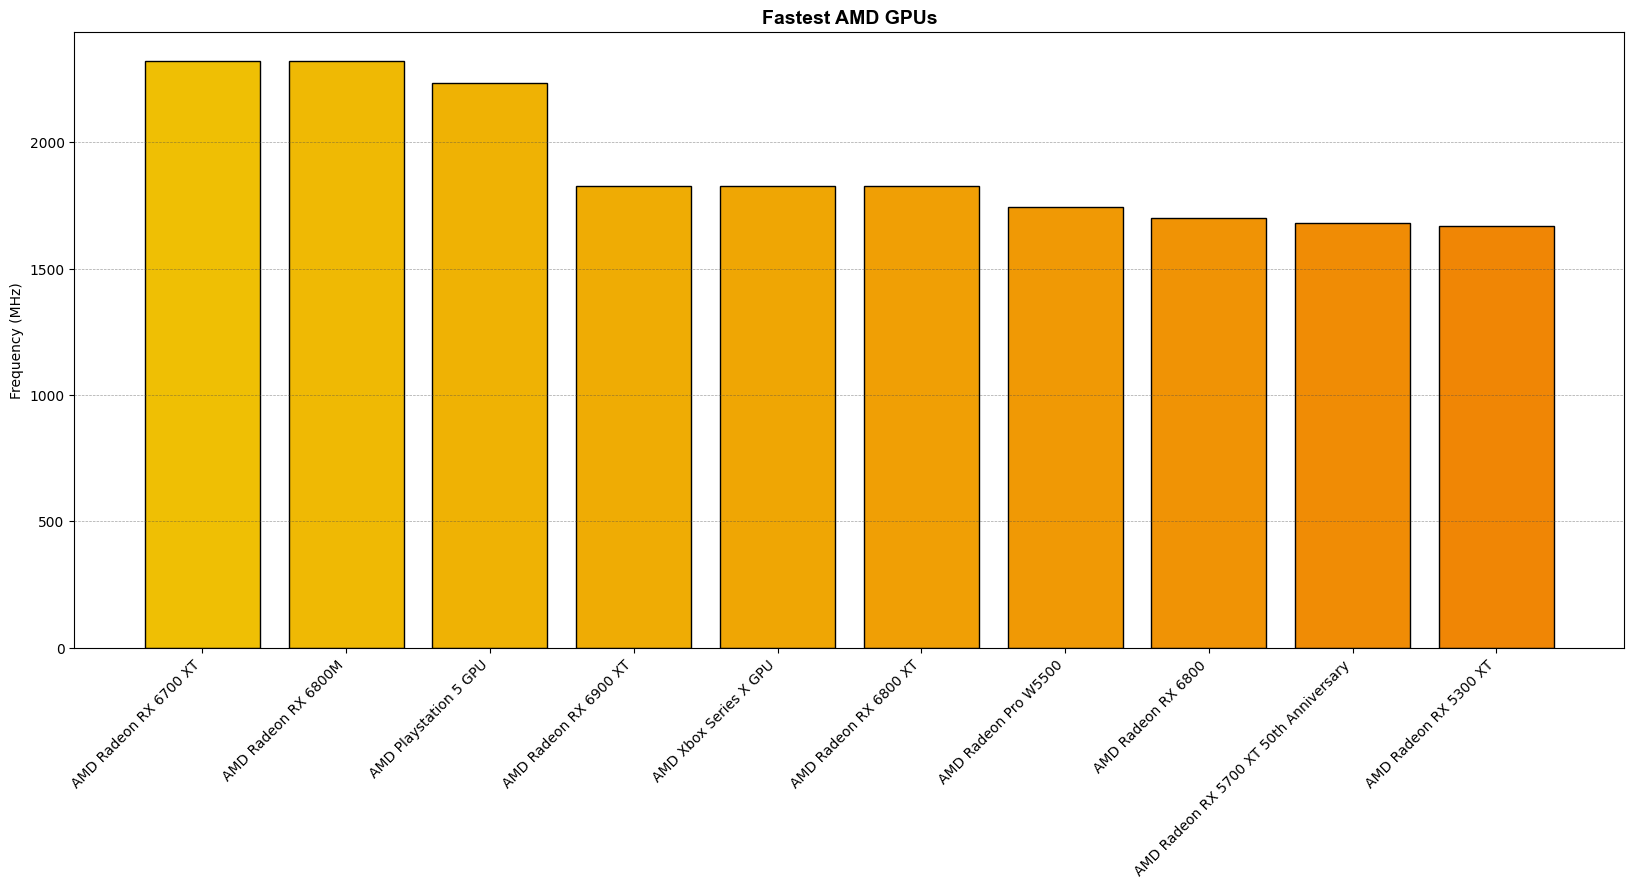

In [82]:
mpl.figure(figsize=(20,8))
mpl.bar(df_Frequency_AMDGPU['Product'],df_Frequency_AMDGPU['Frequency'], 
        edgecolor='#000000', color=['#EFBF04', '#EFB904', '#EFB204', '#EFAC04', '#EFA604',
                '#F09F05', '#F09905', '#F09305', '#F08C05', '#F08605'])
mpl.title('Fastest AMD GPUs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)
mpl.show()

Create a bargraph for the Top 10 <b>AMD</b> GPUs with the highest <i>Frequency</i> and show their corresponding <i>TDP</i>

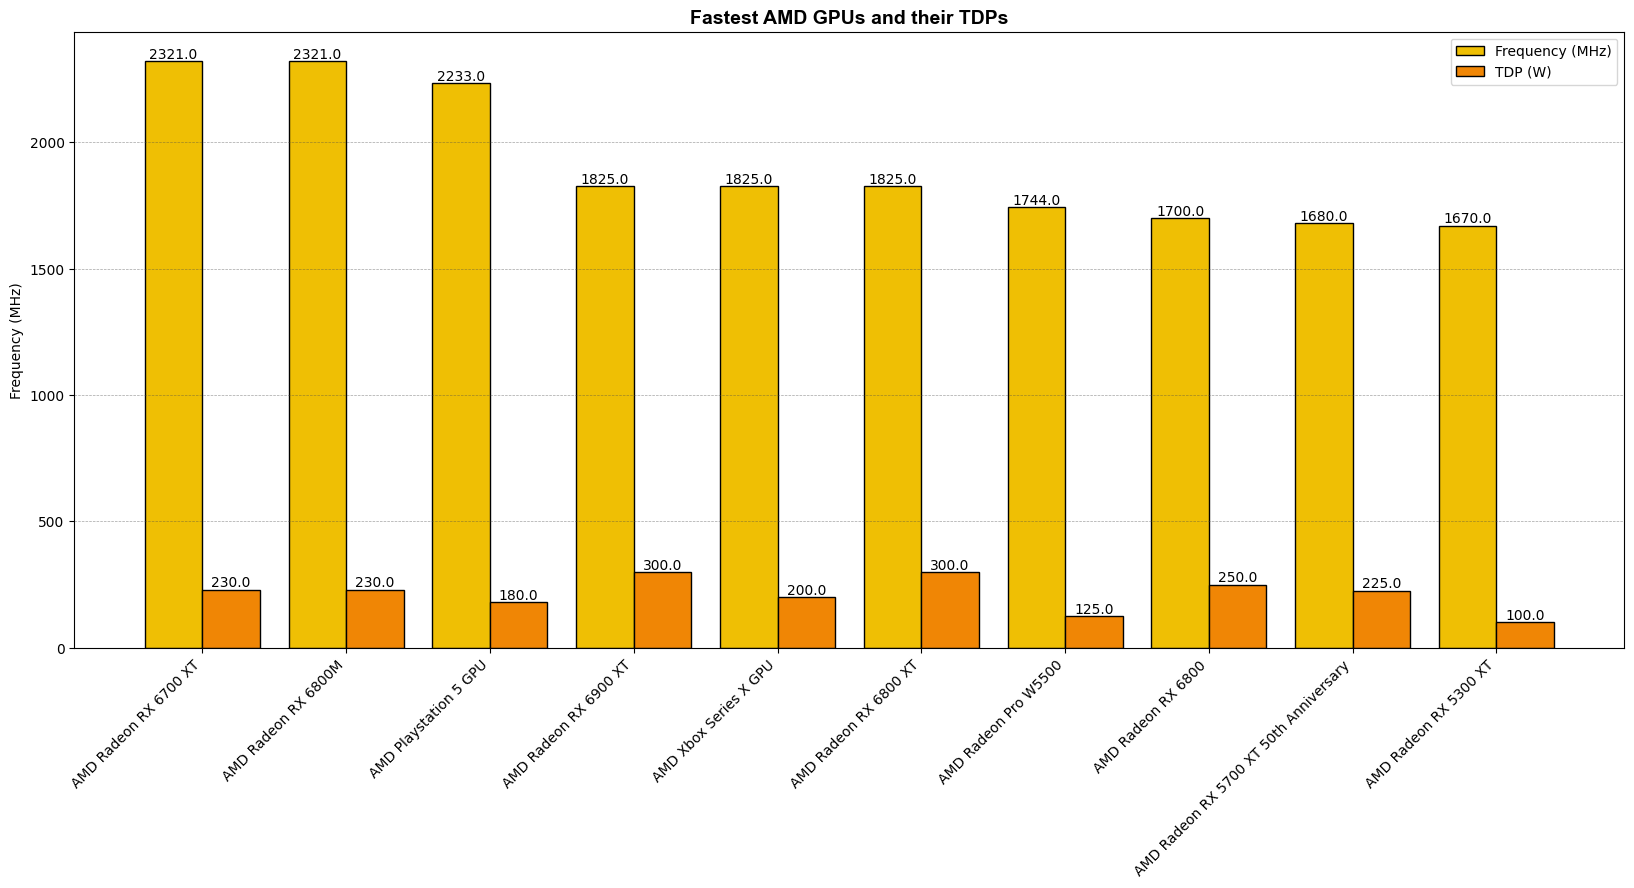

In [83]:
mpl.figure(figsize=(20,8))

bars1 = mpl.bar(np.arange(len(df_Frequency_AMDGPU['Product'])) - 0.2,df_Frequency_AMDGPU['Frequency'], 0.4, label='Frequency (MHz)',
        edgecolor='#000000', color=['#EFBF04'])
bars2 = mpl.bar(np.arange(len(df_Frequency_AMDGPU['Product'])) + 0.2,df_Frequency_AMDGPU['TDP'], 0.4, label='TDP (W)',
        edgecolor='#000000', color=['#F08605'])

for bar in bars1:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

mpl.title('Fastest AMD GPUs and their TDPs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(np.arange(len(df_Frequency_AMDGPU['Product'])), df_Frequency_AMDGPU['Product'], rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)

mpl.legend()
mpl.show()

### Top Intel GPUs based on Frequency

Create seperate <b>Data Frames</b> with <i>TDP</i> and <i>Frequency</i> for each vendor and drop irrelevant columns

In [84]:
df_Frequency_IntelGPU = df.copy()
df_Frequency_IntelGPU = df_Frequency_IntelGPU[['Product', 'Type', 'Date', 'TDP', 'Frequency', 'Vendor']].where((df_Frequency_IntelGPU['Type']=='GPU') & (df_Frequency_IntelGPU['Vendor']=='Intel')).dropna()
df_Frequency_IntelGPU.head(10)

Product Type       Date        TDP  Frequency Vendor
2192       Intel Xeon E3-1275  GPU   4/3/2011  95.000000      100.0  Intel
2195            Intel GMA 500  GPU   3/2/2008  81.359981      200.0  Intel
2202   Intel UHD Graphics 630  GPU  4/30/2020  15.000000      350.0  Intel
2205        Intel HD Graphics  GPU  4/29/2013  45.000000      200.0  Intel
2207  Intel Iris Graphics 540  GPU   9/1/2015  15.000000      300.0  Intel
2222   Intel HD Graphics 3000  GPU   2/1/2011  81.359981      850.0  Intel
2224       Intel UHD Graphics  GPU  8/21/2019  15.000000      300.0  Intel
2238   Intel HD Graphics 5300  GPU   9/5/2014  15.000000      300.0  Intel
2288    Intel HD Graphics 620  GPU  8/30/2016  15.000000      300.0  Intel
2320    Intel HD Graphics 520  GPU   9/1/2015  15.000000      300.0  Intel

Sort content of the <b>Data Frames</b> in Descending Order

In [85]:
df_Frequency_IntelGPU = df_Frequency_IntelGPU.sort_values(by='Frequency', ascending=False)
df_Frequency_IntelGPU = df_Frequency_IntelGPU.head(10)
df_Frequency_IntelGPU

Product Type        Date    TDP  Frequency Vendor
2389   Intel Xeon Phi 7120X  GPU   6/17/2013  300.0     1238.0  Intel
2577   Intel Xeon Phi 7120P  GPU   6/17/2013  300.0     1238.0  Intel
2958      Intel Aubrey Isle  GPU   5/31/2010  300.0     1200.0  Intel
2845   Intel Xeon Phi 3120A  GPU  11/12/2012  300.0     1100.0  Intel
2478   Intel Xeon Phi SE10X  GPU  11/12/2012  300.0     1100.0  Intel
2509   Intel Xeon Phi 5110P  GPU  11/12/2012  225.0     1053.0  Intel
2867   Intel Xeon Phi 5120D  GPU   6/17/2013  245.0     1053.0  Intel
4054       Intel Xe DG1-SDV  GPU         NaT   75.0      900.0  Intel
2690  Intel Xe Arctic Sound  GPU    1/1/2020  500.0      900.0  Intel
2619        Intel H3C XG310  GPU  11/11/2020  300.0      900.0  Intel

#### Top 10 Intel GPUs with the highest Frequency Bar Graph

Create a bargraph for the Top 10 <b>Intel</b> GPUs with the highest <i>Frequency</i>

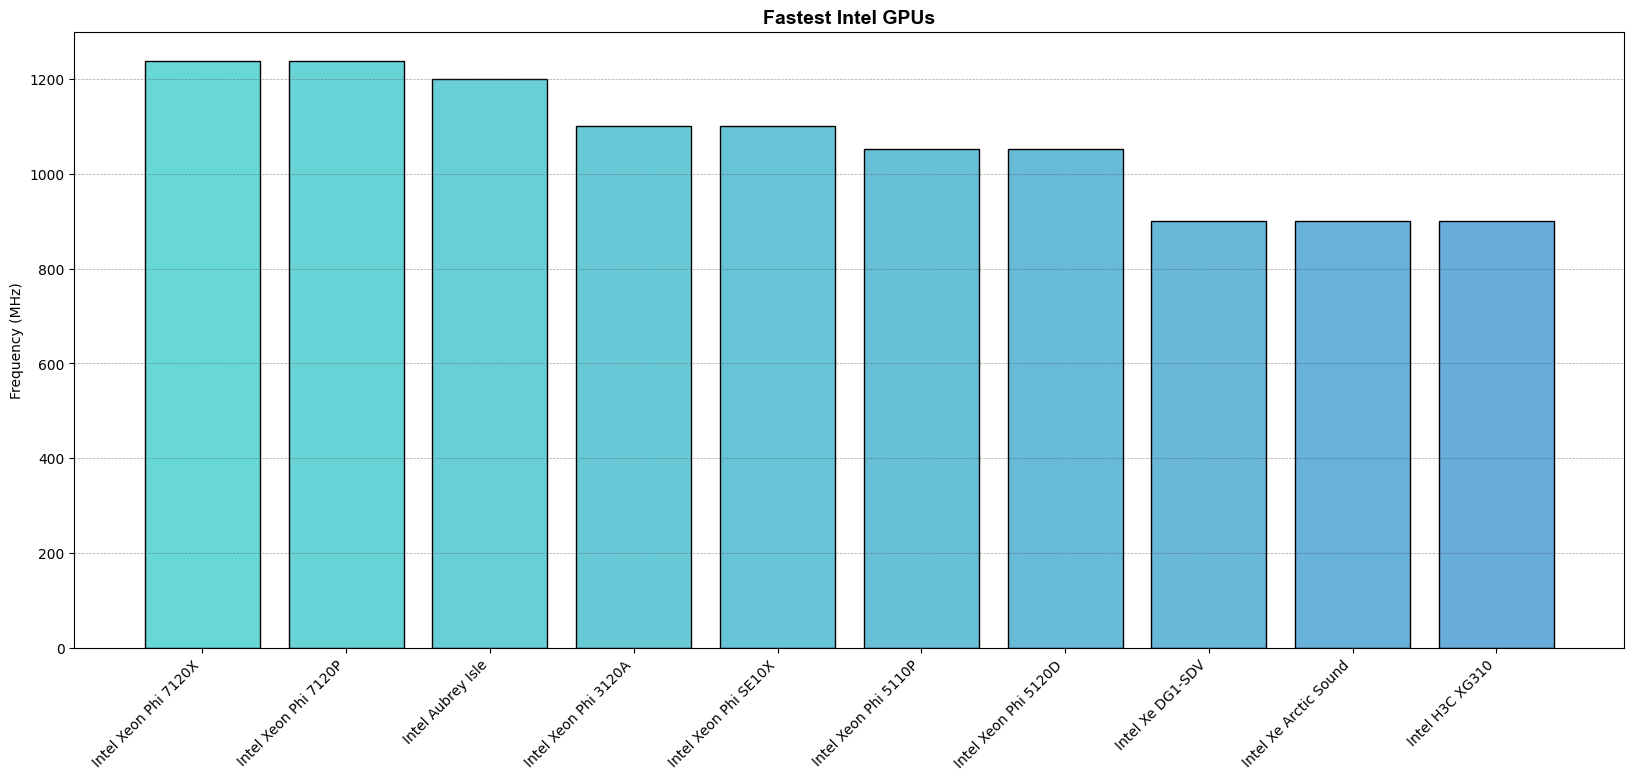

In [86]:
mpl.figure(figsize=(20,8))
mpl.bar(df_Frequency_IntelGPU['Product'],df_Frequency_IntelGPU['Frequency'], 
        edgecolor='#000000', color=['#68D8D6', '#68D3D6', '#68CED7', '#68C9D7', '#68C4D7',
                '#68C0D8', '#68BBD8', '#68B6D8', '#68B1D9', '#68ACD9'])
mpl.title('Fastest Intel GPUs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)
mpl.show()

Create a bargraph for the Top 10 <b>Intel</b> GPUs with the highest <i>Frequency</i> and show their corresponding <i>TDP</i>

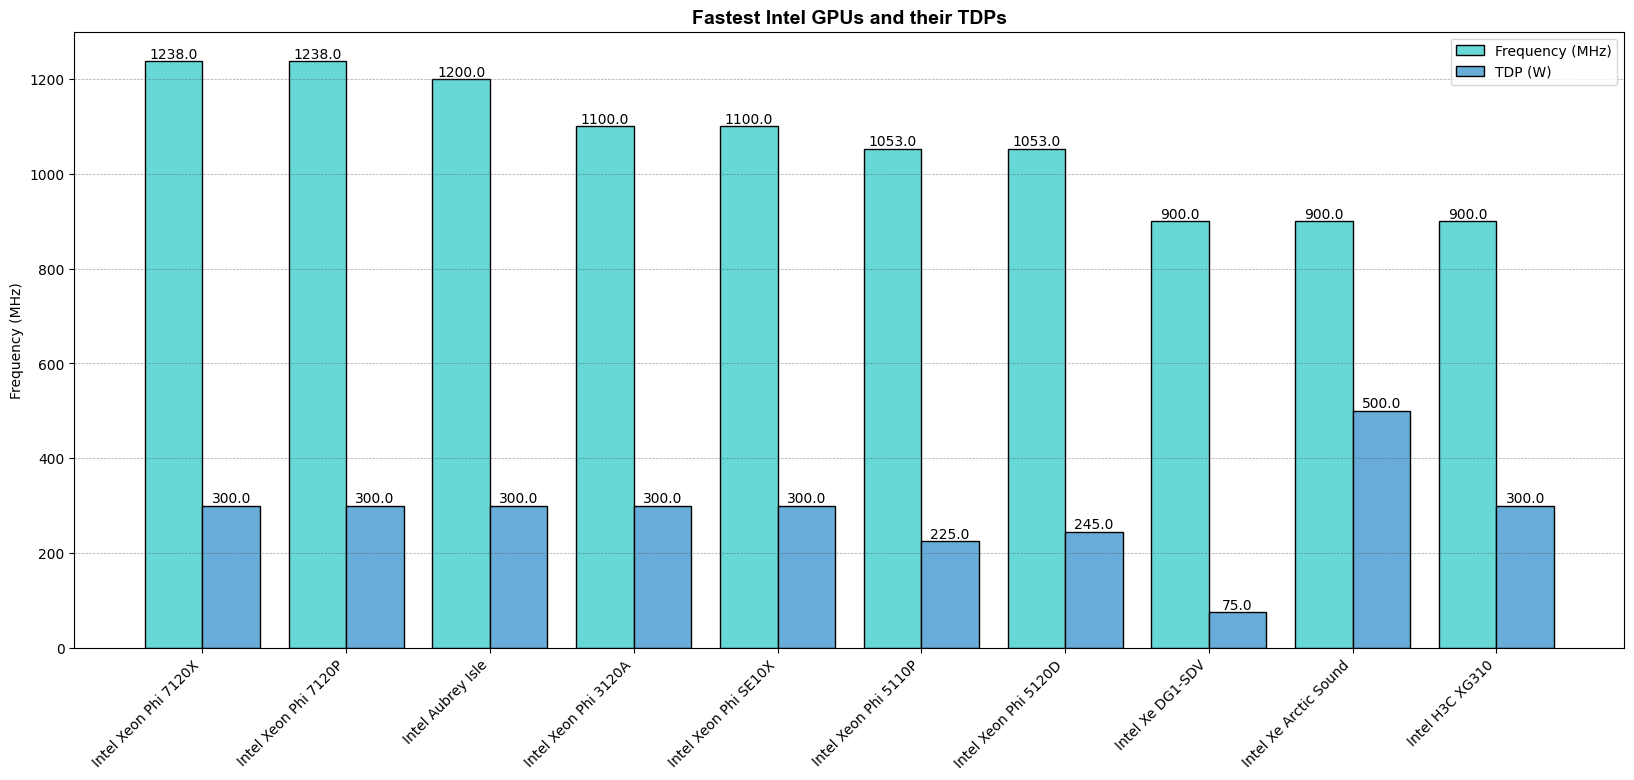

In [87]:
mpl.figure(figsize=(20,8))

bars1 = mpl.bar(np.arange(len(df_Frequency_IntelGPU['Product'])) - 0.2,df_Frequency_IntelGPU['Frequency'], 0.4, label='Frequency (MHz)',
        edgecolor='#000000', color=['#68D8D6'])
bars2 = mpl.bar(np.arange(len(df_Frequency_IntelGPU['Product'])) + 0.2,df_Frequency_IntelGPU['TDP'], 0.4, label='TDP (W)',
        edgecolor='#000000', color=['#68ACD9'])

for bar in bars1:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

mpl.title('Fastest Intel GPUs and their TDPs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(np.arange(len(df_Frequency_IntelGPU['Product'])), df_Frequency_IntelGPU['Product'], rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)

mpl.legend()
mpl.show()

### Top NVIDIA GPUs based on Frequency

Create seperate <b>Data Frames</b> with <i>TDP</i> and <i>Frequency</i> for each vendor and drop irrelevant columns

In [88]:
df_Frequency_NVIDIAGPU = df.copy()
df_Frequency_NVIDIAGPU = df_Frequency_NVIDIAGPU[['Product', 'Type', 'Date', 'TDP', 'Frequency', 'Vendor']].where((df_Frequency_NVIDIAGPU['Type']=='GPU') & (df_Frequency_NVIDIAGPU['Vendor']=='NVIDIA')).dropna()
df_Frequency_NVIDIAGPU.head(10)

Product Type       Date         TDP  Frequency  \
2194    NVIDIA GeForce MX150 GP107  GPU  2/23/2019   25.000000     1469.0   
2197        NVIDIA GeForce 7100 GS  GPU   8/8/2006   81.359981      350.0   
2199        NVIDIA GeForce 6800 XT  GPU  9/30/2005   81.359981      425.0   
2201                    NVIDIA ION  GPU   6/3/2008   20.000000      450.0   
2206    NVIDIA GeForce GTX 760 OEM  GPU  6/27/2013  130.000000      823.0   
2208        NVIDIA GeForce GT 445M  GPU   9/3/2010   35.000000      570.0   
2211  NVIDIA Tesla V100 SXM2 32 GB  GPU  3/27/2018  250.000000     1290.0   
2212             NVIDIA Tesla C870  GPU   5/2/2007  171.000000      600.0   
2213        NVIDIA GeForce GTX 470  GPU  3/26/2010  215.000000      608.0   
2214        NVIDIA GeForce GT 735M  GPU   4/1/2013   33.000000      575.0   

      Vendor  
2194  NVIDIA  
2197  NVIDIA  
2199  NVIDIA  
2201  NVIDIA  
2206  NVIDIA  
2208  NVIDIA  
2211  NVIDIA  
2212  NVIDIA  
2213  NVIDIA  
2214  NVIDIA

Sort content of the <b>Data Frames</b> in Descending Order

In [89]:
df_Frequency_NVIDIAGPU = df_Frequency_NVIDIAGPU.sort_values(by='Frequency', ascending=False)
df_Frequency_NVIDIAGPU = df_Frequency_NVIDIAGPU.head(10)
df_Frequency_NVIDIAGPU

Product Type        Date         TDP  Frequency  \
2342   NVIDIA GeForce RTX 2080 SUPER  GPU   7/23/2019  250.000000     1650.0   
2691          NVIDIA Quadro RTX 5000  GPU   8/13/2018  230.000000     1620.0   
2541  NVIDIA GeForce GTX 1080 11Gbps  GPU   4/20/2017  180.000000     1607.0   
4275                 NVIDIA P104-100  GPU  12/12/2017   81.359981     1607.0   
2828         NVIDIA GeForce GTX 1080  GPU   5/27/2016  180.000000     1607.0   
2840             NVIDIA Quadro P5000  GPU   10/1/2016  180.000000     1607.0   
2751      NVIDIA GeForce GTX 1070 Ti  GPU   11/2/2017  180.000000     1607.0   
4052   NVIDIA GeForce RTX 2070 SUPER  GPU    7/9/2019  215.000000     1605.0   
3064                 NVIDIA P102-100  GPU   2/12/2018  250.000000     1582.0   
3181      NVIDIA Quadro T2000 Mobile  GPU   5/27/2019   60.000000     1575.0   

      Vendor  
2342  NVIDIA  
2691  NVIDIA  
2541  NVIDIA  
4275  NVIDIA  
2828  NVIDIA  
2840  NVIDIA  
2751  NVIDIA  
4052  NVIDIA  
3064  NVIDIA  
3181  NVIDIA

#### Top 10 NVIDIA GPUs with the highest Frequency Bar Graph

Create a bargraph for the Top 10 <b>NVIDIA</b> GPUs with the highest <i>Frequency</i>

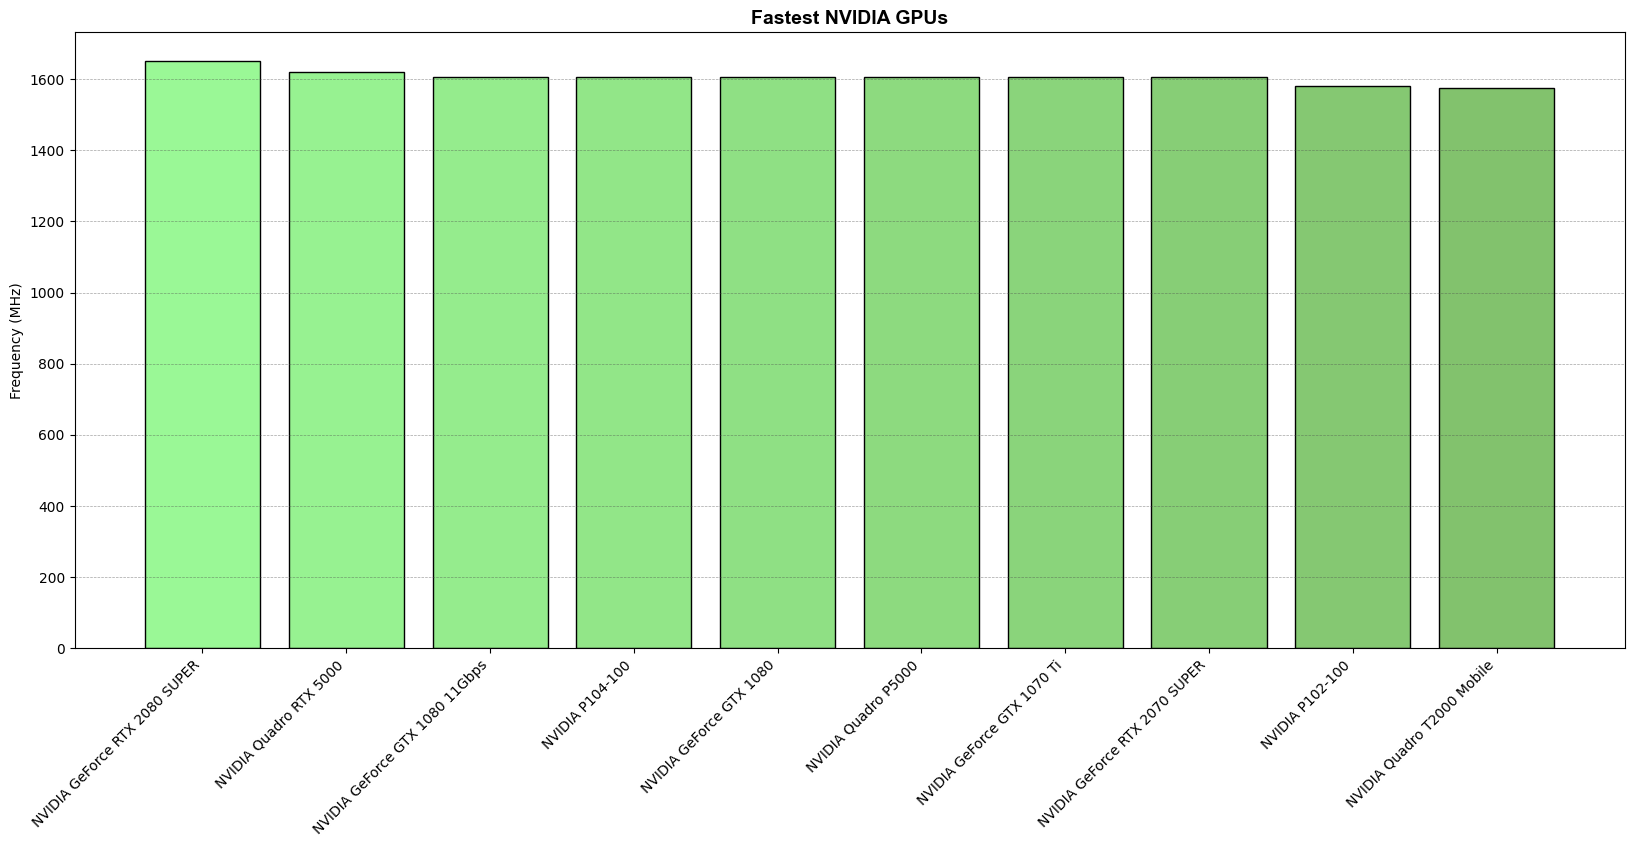

In [90]:
mpl.figure(figsize=(20,8))
mpl.bar(df_Frequency_NVIDIAGPU['Product'],df_Frequency_NVIDIAGPU['Frequency'], 
        edgecolor='#000000', color=['#9AF896', '#97F291', '#95EC8D', '#92E688', '#8FE084',
                '#8DDA7F', '#8AD47B', '#87CE76', '#85C872', '#82C26D'])
mpl.title('Fastest NVIDIA GPUs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)
mpl.show()

Create a bargraph for the Top 10 <b>NVIDIA</b> GPUs with the highest <i>Frequency</i> and show their corresponding <i>TDP</i>

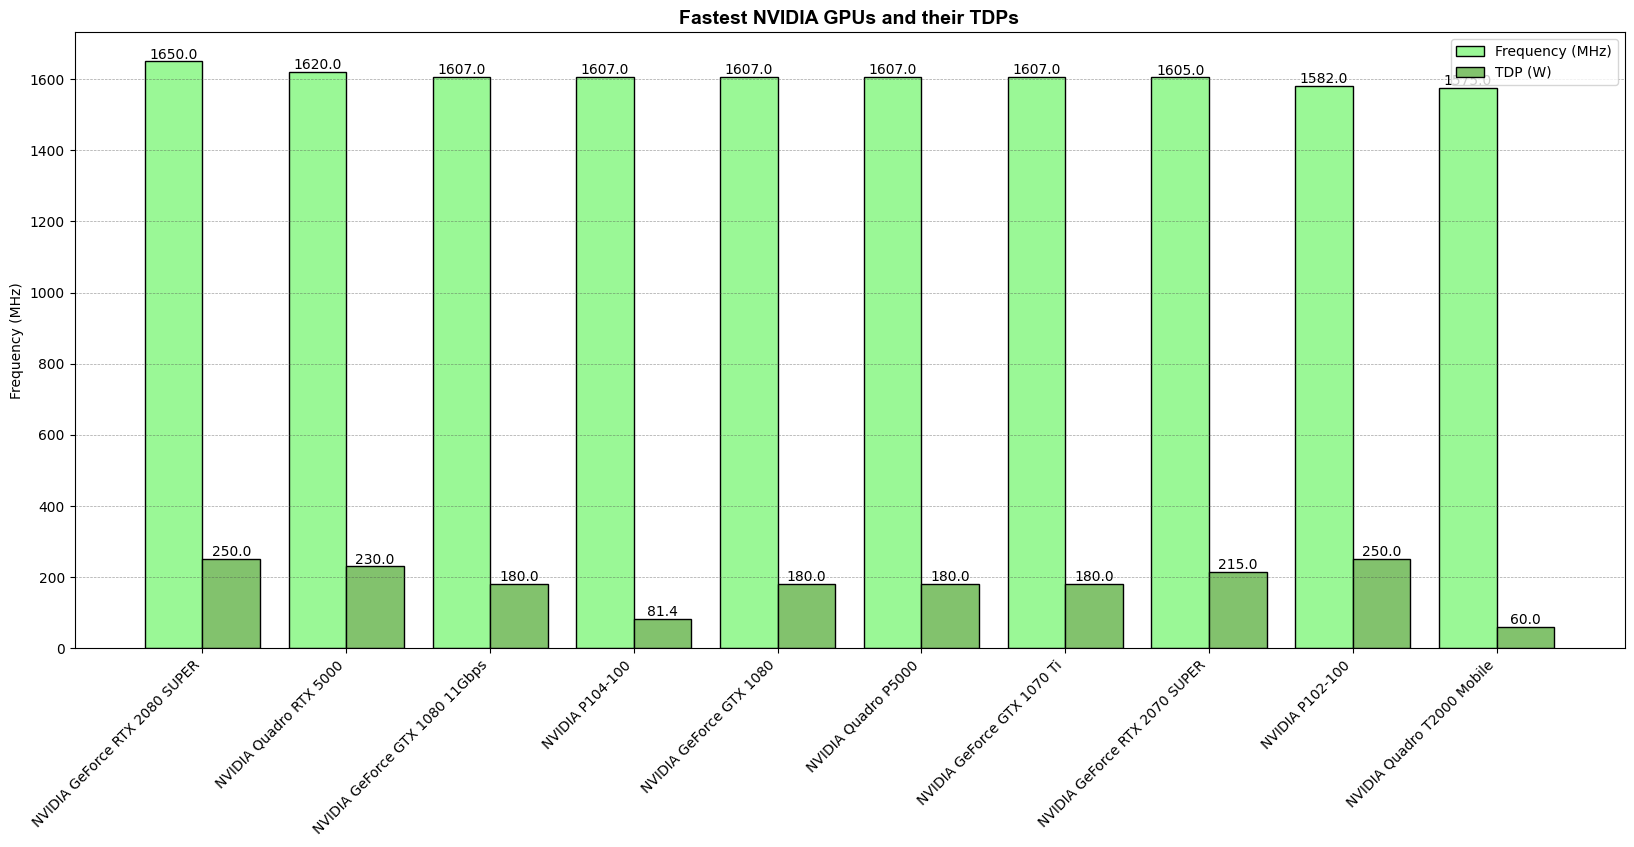

In [91]:
mpl.figure(figsize=(20,8))

bars1 = mpl.bar(np.arange(len(df_Frequency_NVIDIAGPU['Product'])) - 0.2,df_Frequency_NVIDIAGPU['Frequency'], 0.4, label='Frequency (MHz)',
        edgecolor='#000000', color=['#9AF896'])
bars2 = mpl.bar(np.arange(len(df_Frequency_NVIDIAGPU['Product'])) + 0.2,df_Frequency_NVIDIAGPU['TDP'], 0.4, label='TDP (W)',
        edgecolor='#000000', color=['#82C26D'])

for bar in bars1:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

mpl.title('Fastest NVIDIA GPUs and their TDPs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(np.arange(len(df_Frequency_NVIDIAGPU['Product'])), df_Frequency_NVIDIAGPU['Product'], rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)

mpl.legend()
mpl.show()

### Top ATI GPUs based on Frequency

Create seperate <b>Data Frames</b> with <i>TDP</i> and <i>Frequency</i> for each vendor and drop irrelevant columns

In [92]:
df_Frequency_ATIGPU = df.copy()
df_Frequency_ATIGPU = df_Frequency_ATIGPU[['Product', 'Type', 'Date', 'TDP', 'Frequency', 'Vendor']].where((df_Frequency_ATIGPU['Type']=='GPU') & (df_Frequency_ATIGPU['Vendor']=='ATI')).dropna()
df_Frequency_ATIGPU.head(10)

Product Type        Date         TDP  Frequency  \
2196          ATI Radeon HD 4350 AGP  GPU   9/30/2008   20.000000      600.0   
2198             ATI Radeon X700 AGP  GPU    9/1/2004   44.000000      400.0   
2200          ATI Radeon HD 2900 PRO  GPU  12/12/2007  200.000000      600.0   
2210            ATI Radeon E4690 MXM  GPU    6/1/2009   30.000000      600.0   
2218           ATI Xbox 360 GPU 80nm  GPU  10/27/2007  175.000000      500.0   
2226    ATI Mobility Radeon 9600 PRO  GPU    6/1/2004   81.359981      333.0   
2230          ATI All-In-Wonder 9500  GPU    7/1/2002   81.359981      277.0   
2234             ATI Radeon X800 GTO  GPU  12/29/2007   49.000000      400.0   
2236  ATI Mobility Radeon HD 3870 X2  GPU    9/1/2008  110.000000      660.0   
2243        ATI Radeon X1600 PRO AGP  GPU   10/1/2007   41.000000      500.0   

     Vendor  
2196    ATI  
2198    ATI  
2200    ATI  
2210    ATI  
2218    ATI  
2226    ATI  
2230    ATI  
2234    ATI  
2236    ATI  
2243    ATI

Sort content of the <b>Data Frames</b> in Descending Order

In [93]:
df_Frequency_ATIGPU = df_Frequency_ATIGPU.sort_values(by='Frequency', ascending=False)
df_Frequency_ATIGPU = df_Frequency_ATIGPU.head(10)
df_Frequency_ATIGPU

Product Type        Date         TDP  Frequency  \
2604              ATI Radeon HD 5770  GPU  10/13/2009  108.000000      850.0   
4278              ATI Radeon HD 4890  GPU    4/2/2009  190.000000      850.0   
4615              ATI Radeon HD 5870  GPU   9/23/2009  188.000000      850.0   
3453           ATI Radeon HD 5770 X2  GPU  10/13/2010   81.359981      850.0   
2950  ATI Radeon HD 5870 Eyefinity 6  GPU   3/11/2010  228.000000      850.0   
3608              ATI FirePro V9800P  GPU    9/9/2010  225.000000      850.0   
2797               ATI FirePro V9800  GPU    9/9/2010  250.000000      850.0   
2695  ATI Radeon HD 5870 Mac Edition  GPU   6/30/2010  228.000000      850.0   
3243  ATI Radeon HD 5770 Mac Edition  GPU    7/4/2010  108.000000      850.0   
4123           ATI Radeon HD 3870 X2  GPU   1/26/2008  165.000000      825.0   

     Vendor  
2604    ATI  
4278    ATI  
4615    ATI  
3453    ATI  
2950    ATI  
3608    ATI  
2797    ATI  
2695    ATI  
3243    ATI  
4123    ATI

#### Top 10 ATI GPUs with the highest Frequency Bar Graph

Create a bargraph for the Top 10 <b>ATI</b> GPUs with the highest <i>Frequency</i>

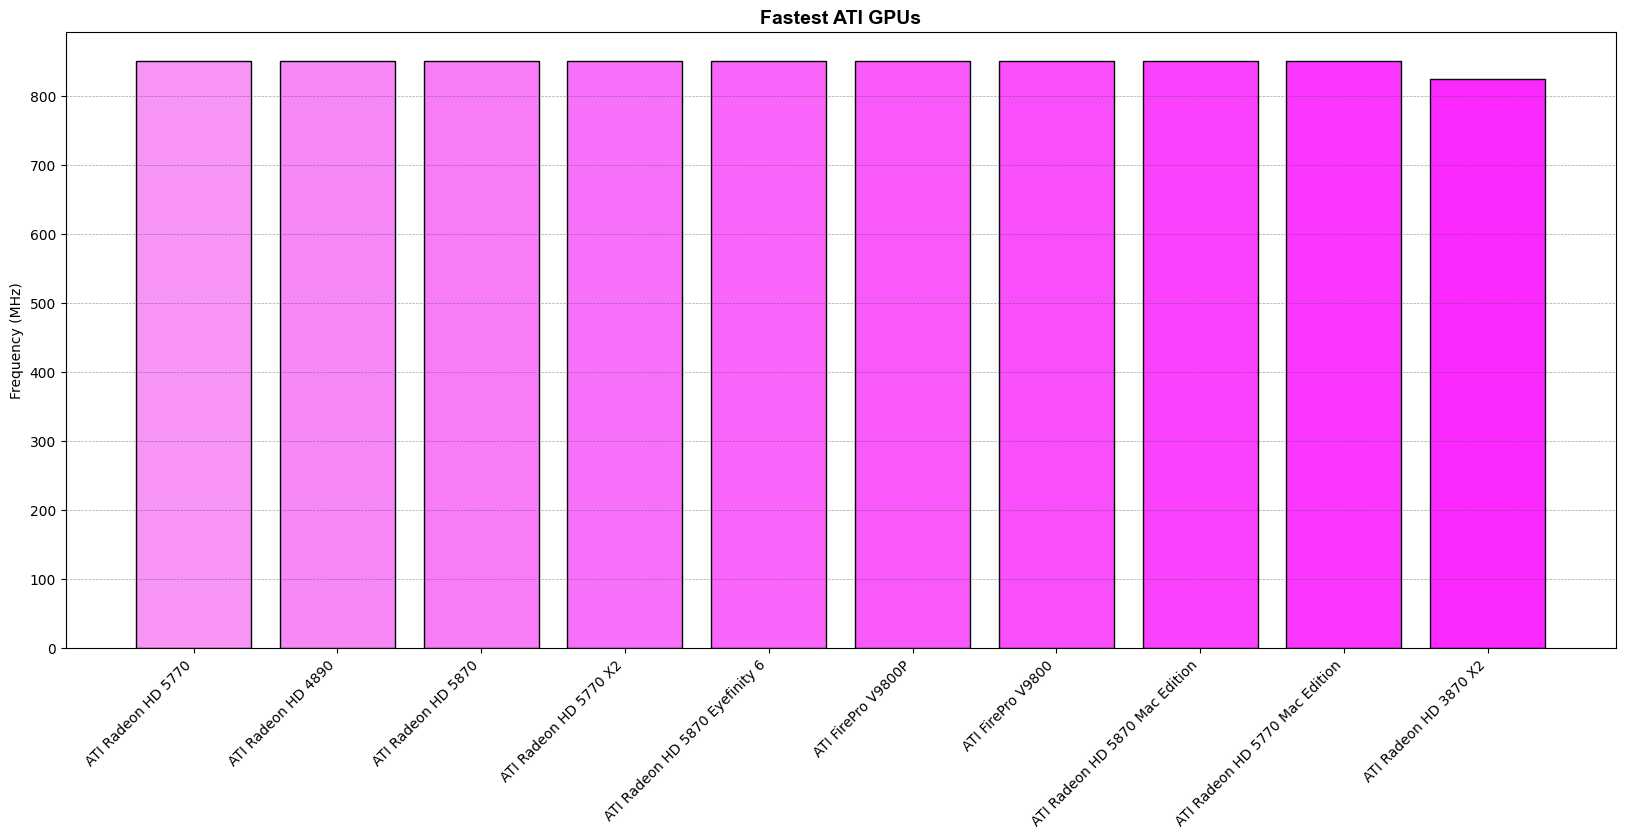

In [94]:
mpl.figure(figsize=(20,8))
mpl.bar(df_Frequency_ATIGPU['Product'],df_Frequency_ATIGPU['Frequency'], 
        edgecolor='#000000', color=['#F794F6', '#F788F7', '#F87CF8', '#F870F9', '#F964FA',
                '#F959FB', '#FA4DFC', '#FA41FD', '#FB35FE', '#FB29FF'])
mpl.title('Fastest ATI GPUs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)
mpl.show()

Create a bargraph for the Top 10 <b>ATI</b> GPUs with the highest <i>Frequency</i> and show their corresponding <i>TDP</i>

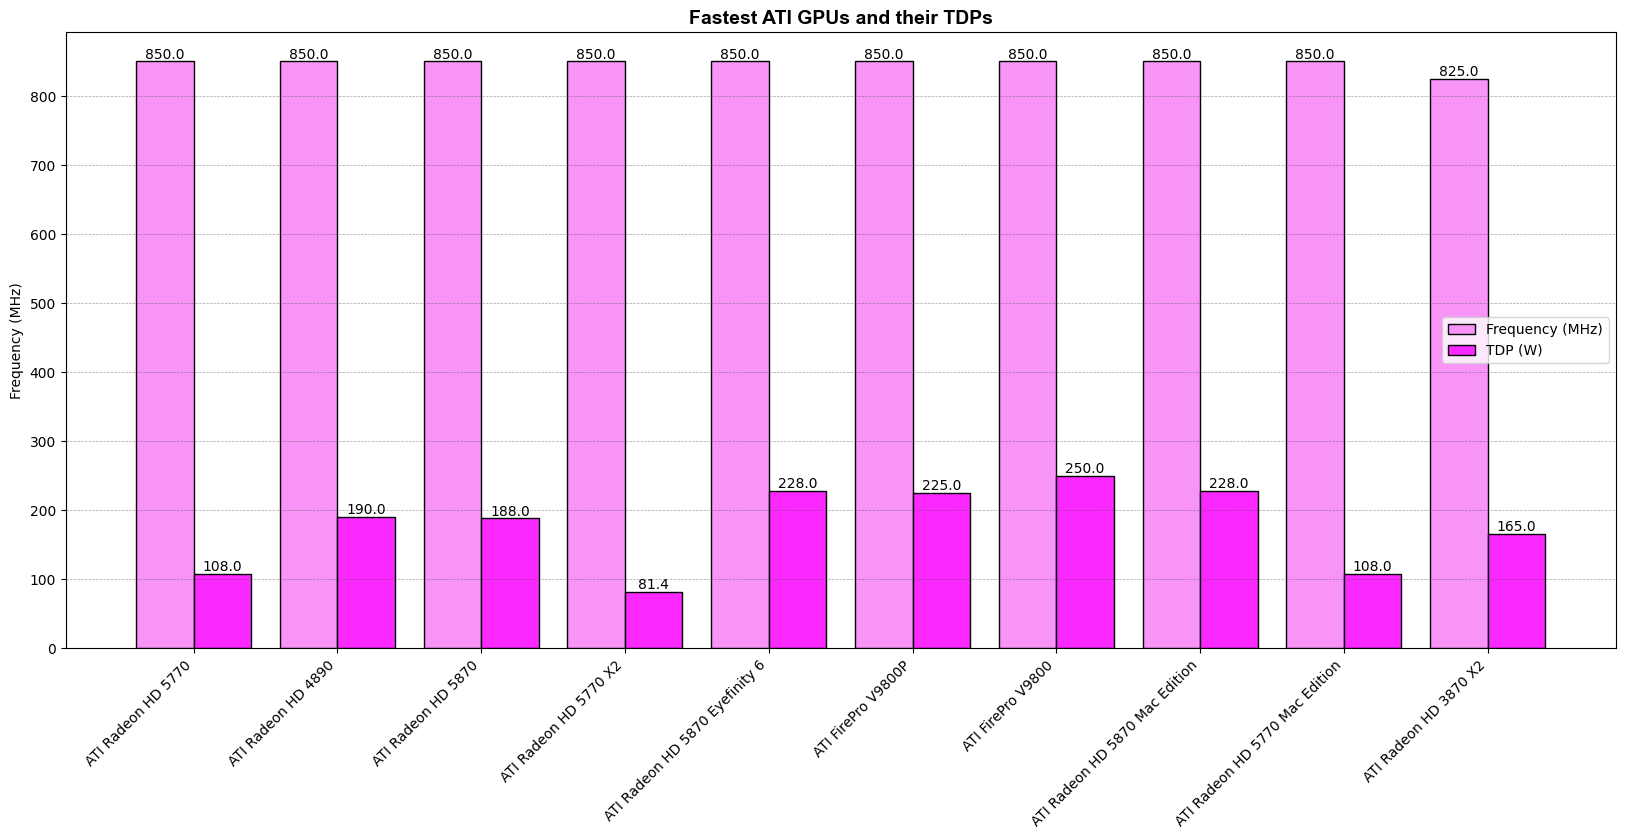

In [95]:
mpl.figure(figsize=(20,8))

bars1 = mpl.bar(np.arange(len(df_Frequency_ATIGPU['Product'])) - 0.2,df_Frequency_ATIGPU['Frequency'], 0.4, label='Frequency (MHz)',
        edgecolor='#000000', color=['#F794F6'])
bars2 = mpl.bar(np.arange(len(df_Frequency_ATIGPU['Product'])) + 0.2,df_Frequency_ATIGPU['TDP'], 0.4, label='TDP (W)',
        edgecolor='#000000', color=['#FB29FF'])

for bar in bars1:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

mpl.title('Fastest ATI GPUs and their TDPs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(np.arange(len(df_Frequency_ATIGPU['Product'])), df_Frequency_ATIGPU['Product'], rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)

mpl.legend()
mpl.show()

### Top Other Brand GPUs based on Frequency

Create seperate <b>Data Frames</b> with <i>TDP</i> and <i>Frequency</i> for each vendor and drop irrelevant columns

In [96]:
df_Frequency_OtherGPU = df.copy()
df_Frequency_OtherGPU = df_Frequency_OtherGPU[['Product', 'Type', 'Date', 'TDP', 'Frequency', 'Vendor']].where((df_Frequency_OtherGPU['Type']=='GPU') & (df_Frequency_OtherGPU['Vendor']=='Other')).dropna()
df_Frequency_OtherGPU.head(10)

Product Type        Date        TDP  \
2193              Matrox Parhelia 128 MB  GPU   6/25/2002  81.359981   
2237                   3dfx Spectre 1000  GPU         NaT  30.000000   
2239                  Matrox QID LP PCIe  GPU  12/17/2004  81.359981   
2270                   3dfx Spectre 2000  GPU         NaT  30.000000   
2290             XGI Volari Duo V5 Ultra  GPU   9/15/2003  81.359981   
2300             3dfx Voodoo4-2 4800 AGP  GPU         NaT  15.000000   
2317        Sony Playstation 2 GPU 180nm  GPU   4/18/2001  79.000000   
2381  Sony Playstation Portable GPU 90nm  GPU  12/12/2004   4.000000   
2392                       XGI Volari V8  GPU   9/15/2003  81.359981   
2422                  XGI Volari 8600 XT  GPU         NaT  81.359981   

      Frequency Vendor  
2193      200.0  Other  
2237      200.0  Other  
2239      250.0  Other  
2270      200.0  Other  
2290      350.0  Other  
2300      166.0  Other  
2317      147.0  Other  
2381      133.0  Other  
2392      300.0  Other  
2422      450.0  Other

Sort content of the <b>Data Frames</b> in Descending Order

In [97]:
df_Frequency_OtherGPU = df_Frequency_OtherGPU.sort_values(by='Frequency', ascending=False)
df_Frequency_OtherGPU = df_Frequency_OtherGPU.head(10)
df_Frequency_OtherGPU

Product Type       Date        TDP  Frequency Vendor
2422       XGI Volari 8600 XT  GPU        NaT  81.359981      450.0  Other
2290  XGI Volari Duo V5 Ultra  GPU  9/15/2003  81.359981      350.0  Other
2779      XGI Volari V5 Ultra  GPU  9/15/2003  81.359981      350.0  Other
2869      XGI Volari V5 Ultra  GPU  9/15/2003  81.359981      350.0  Other
3025  XGI Volari Duo V8 Ultra  GPU  9/15/2003  81.359981      350.0  Other
4268  XGI Volari Duo V8 Ultra  GPU  9/15/2003  81.359981      350.0  Other
3875  XGI Volari Duo V5 Ultra  GPU  9/15/2003  81.359981      350.0  Other
3586      XGI Volari V8 Ultra  GPU  9/15/2003  81.359981      350.0  Other
4361      XGI Volari V8 Ultra  GPU  9/15/2003  81.359981      350.0  Other
4097            XGI Volari V5  GPU  9/15/2003  81.359981      325.0  Other

#### Top N Other Brand GPUs with the highest Frequency Bar Graph

Create a bargraph for the Top 10 <b>Other</b> GPUs with the highest <i>Frequency</i>

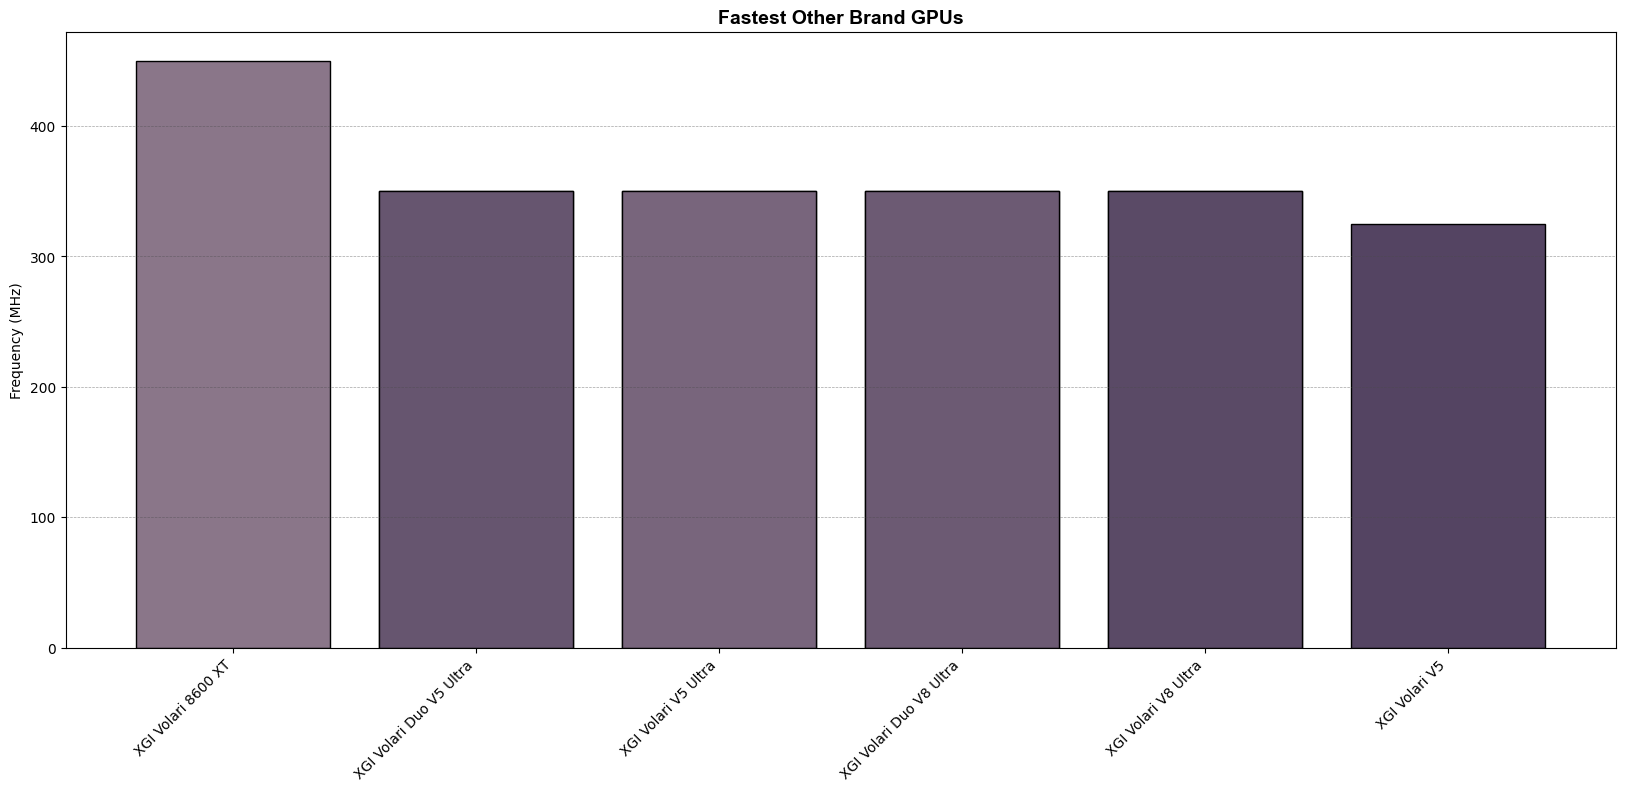

In [98]:
mpl.figure(figsize=(20,8))
mpl.bar(df_Frequency_OtherGPU['Product'],df_Frequency_OtherGPU['Frequency'], 
        edgecolor='#000000', color=['#8A7689', '#847085', '#7E6B80', '#78657C', '#726078',
                '#6C5A73', '#66556F', '#604F6B', '#5A4A66', '#544462'])
mpl.title('Fastest Other Brand GPUs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)
mpl.show()

Create a bargraph for the Top 10 <b>Other</b> GPUs with the highest <i>Frequency</i> and show their corresponding <i>TDP</i>

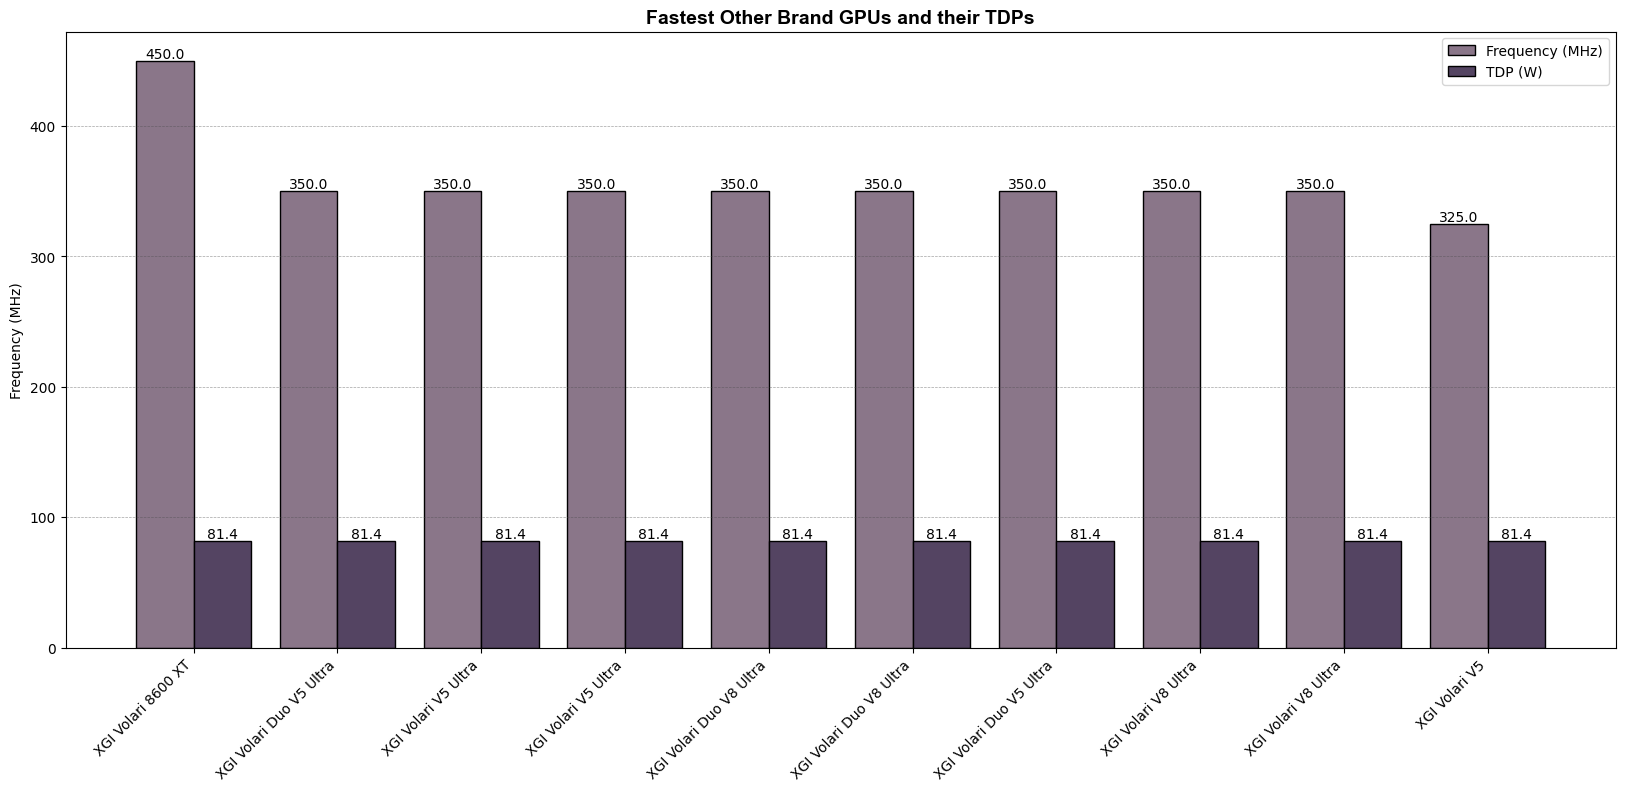

In [99]:
mpl.figure(figsize=(20,8))

bars1 = mpl.bar(np.arange(len(df_Frequency_OtherGPU['Product'])) - 0.2,df_Frequency_OtherGPU['Frequency'], 0.4, label='Frequency (MHz)',
        edgecolor='#000000', color=['#8A7689'])
bars2 = mpl.bar(np.arange(len(df_Frequency_OtherGPU['Product'])) + 0.2,df_Frequency_OtherGPU['TDP'], 0.4, label='TDP (W)',
        edgecolor='#000000', color=['#544462'])

for bar in bars1:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    mpl.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

mpl.title('Fastest Other Brand GPUs and their TDPs', 
          fontfamily='Arial', 
          fontsize=14, 
          fontweight='bold')
mpl.ylabel('Frequency (MHz)')
mpl.xticks(np.arange(len(df_Frequency_OtherGPU['Product'])), df_Frequency_OtherGPU['Product'], rotation=45, ha='right')
mpl.grid(axis='y', color='#4a4a4a', linestyle='--', linewidth='0.5', alpha=0.5)

mpl.legend()
mpl.show()

### GPU Transistor Count

#### AMD GPU Transistor Count

Create a seperate <b>Data Frame</b> with <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [100]:
df_TransCount_AMDGPU = df.copy()
df_TransCount_AMDGPU = df_TransCount_AMDGPU[['Product', 'Type', 'Date', 'Transistors', 'Vendor']].where((df_TransCount_AMDGPU['Type']=='GPU') & (df_TransCount_AMDGPU['Vendor']=='AMD')).dropna()
df_TransCount_AMDGPU

Product Type        Date  Transistors Vendor
2203                  AMD Wii U GPU  GPU  11/18/2012        880.0    AMD
2204             AMD Radeon RX 6800  GPU  10/28/2020      26800.0    AMD
2209         AMD Radeon HD 8400 IGP  GPU  11/23/2013       1178.0    AMD
2217  AMD Radeon R7 Mobile Graphics  GPU  11/15/2015       1200.0    AMD
2223           AMD Radeon RX 560 XT  GPU   3/13/2019       5700.0    AMD
...                             ...  ...         ...          ...    ...
4829          AMD Radeon R5 220 OEM  GPU  12/21/2013        292.0    AMD
4830      AMD Radeon RX 550X Mobile  GPU   4/11/2018       2200.0    AMD
4833            AMD Radeon R9 280X2  GPU         NaT       4313.0    AMD
4836       AMD Radeon Instinct MI25  GPU   6/27/2017      12500.0    AMD
4839        AMD Radeon R7 350 640SP  GPU    1/7/2019       1500.0    AMD

[712 rows x 5 columns]

Format content of the <b>Data Frame</b> by <b>Date</b> in <i>Ascending Order</i> and remove special values

In [101]:
# Formatting Date of AMD GPUs and Removal of Special Values

df_TransCount_AMDGPU['Date'] = pd.to_datetime(df_TransCount_AMDGPU['Date'])
df_TransCount_AMDGPU['Year'] = df_TransCount_AMDGPU['Date'].dt.year
df_TransCount_AMDGPU = df_TransCount_AMDGPU[pd.notna(df_TransCount_AMDGPU['Date'])]
df_TransCount_AMDGPU = df_TransCount_AMDGPU.groupby(['Year'])[['Transistors']].mean().reset_index()
df_TransCount_AMDGPU

Year   Transistors
0   2006.0    384.000000
1   2007.0    666.000000
2   2008.0    583.000000
3   2009.0    627.000000
4   2010.0   1103.388889
5   2011.0    985.157895
6   2012.0   1582.356322
7   2013.0   1617.040436
8   2014.0   2215.581081
9   2015.0   2275.058824
10  2016.0   3083.858286
11  2017.0   5368.275862
12  2018.0   5008.403792
13  2019.0   5678.679245
14  2020.0  10938.989637
15  2021.0  13500.000000

##### AMD GPU Transistor Count Trend Graph

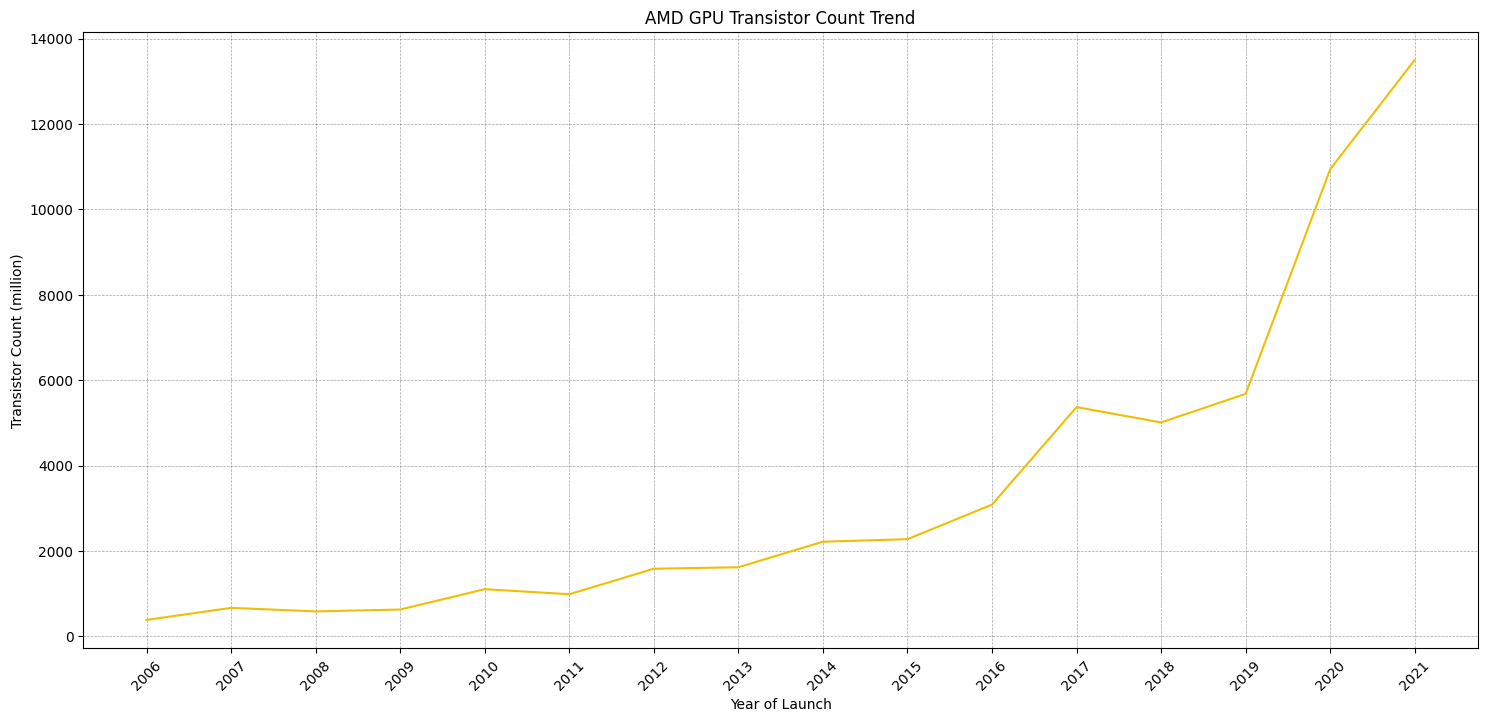

In [102]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TransCount_AMDGPU['Year'], df_TransCount_AMDGPU['Transistors'], color='#EFBF04')
mpl.title('AMD GPU Transistor Count Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TransCount_AMDGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.ylabel('Transistor Count (million)')
mpl.show()

#### Intel GPU Transistor Count

Create a seperate <b>Data Frame</b> with <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [103]:
df_TransCount_IntelGPU = df.copy()
df_TransCount_IntelGPU = df_TransCount_IntelGPU[['Product', 'Type', 'Date', 'Transistors', 'Vendor']].where((df_TransCount_IntelGPU['Type']=='GPU') & (df_TransCount_IntelGPU['Vendor']=='Intel')).dropna()
df_TransCount_IntelGPU

Product Type       Date  Transistors Vendor
2192       Intel Xeon E3-1275  GPU   4/3/2011  1160.000000  Intel
2195            Intel GMA 500  GPU   3/2/2008  1929.922279  Intel
2202   Intel UHD Graphics 630  GPU  4/30/2020  1929.922279  Intel
2205        Intel HD Graphics  GPU  4/29/2013  1929.922279  Intel
2207  Intel Iris Graphics 540  GPU   9/1/2015  1929.922279  Intel
...                       ...  ...        ...          ...    ...
4753        Intel HD Graphics  GPU   5/1/2011   504.000000  Intel
4757        Intel HD Graphics  GPU   4/1/2015  1929.922279  Intel
4788  Intel HD Graphics P3000  GPU   2/1/2011   624.000000  Intel
4815       Intel GMA X4700MHD  GPU  10/1/2008  1929.922279  Intel
4850            Intel GMA 950  GPU   6/1/2005  1929.922279  Intel

[150 rows x 5 columns]

Format content of the <b>Data Frame</b> by <b>Date</b> in <i>Ascending Order</i> and remove special values

In [104]:
# Formatting Date of Intel GPUs and Removal of Special Values

df_TransCount_IntelGPU['Date'] = pd.to_datetime(df_TransCount_IntelGPU['Date'])
df_TransCount_IntelGPU['Year'] = df_TransCount_IntelGPU['Date'].dt.year
df_TransCount_IntelGPU = df_TransCount_IntelGPU[pd.notna(df_TransCount_IntelGPU['Date'])]
df_TransCount_IntelGPU = df_TransCount_IntelGPU.groupby(['Year'])[['Transistors']].mean().reset_index()
df_TransCount_IntelGPU

Year  Transistors
0   2000.0  1929.922279
1   2001.0  1929.922279
2   2002.0  1929.922279
3   2003.0  1929.922279
4   2004.0  1929.922279
5   2005.0  1929.922279
6   2006.0  1929.922279
7   2007.0  1478.191709
8   2008.0  1570.828439
9   2010.0   944.784456
10  2011.0   795.000000
11  2012.0  2423.000000
12  2013.0  2397.592197
13  2014.0  1929.922279
14  2015.0  1929.922279
15  2016.0  1929.922279
16  2017.0  1929.922279
17  2018.0  1929.922279
18  2019.0  1929.922279
19  2020.0  2363.499259
20  2021.0  1929.922279

##### Intel GPU Transistor Count Trend Graph

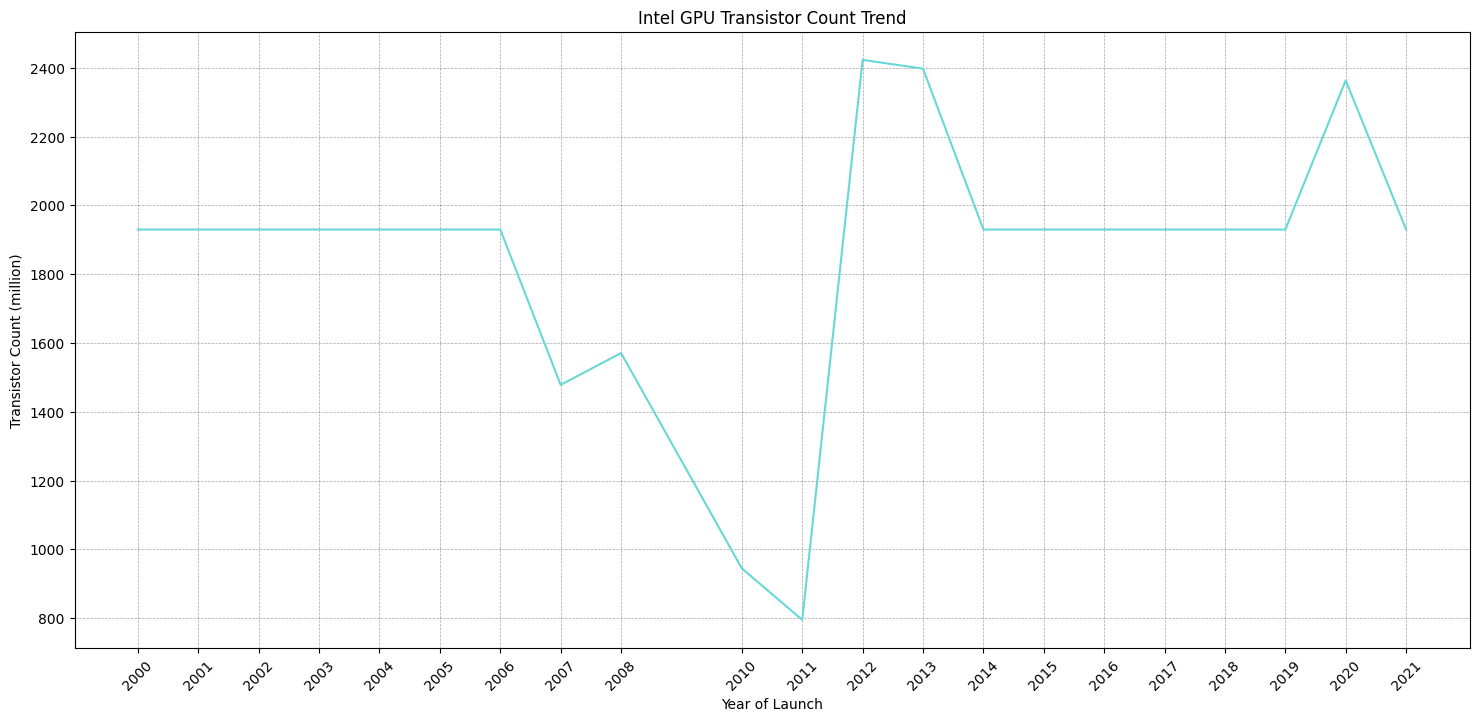

In [105]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TransCount_IntelGPU['Year'], df_TransCount_IntelGPU['Transistors'], color='#68D8D6')
mpl.title('Intel GPU Transistor Count Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TransCount_IntelGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.ylabel('Transistor Count (million)')
mpl.show()

#### NVIDIA GPU Transistor Count

Create a seperate <b>Data Frame</b> with <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [106]:
df_TransCount_NVIDIAGPU = df.copy()
df_TransCount_NVIDIAGPU = df_TransCount_NVIDIAGPU[['Product', 'Type', 'Date', 'Transistors', 'Vendor']].where((df_TransCount_NVIDIAGPU['Type']=='GPU') & (df_TransCount_NVIDIAGPU['Vendor']=='NVIDIA')).dropna()
df_TransCount_NVIDIAGPU

Product Type       Date  Transistors  Vendor
2194  NVIDIA GeForce MX150 GP107  GPU  2/23/2019       3300.0  NVIDIA
2197      NVIDIA GeForce 7100 GS  GPU   8/8/2006         75.0  NVIDIA
2199      NVIDIA GeForce 6800 XT  GPU  9/30/2005        222.0  NVIDIA
2201                  NVIDIA ION  GPU   6/3/2008        314.0  NVIDIA
2206  NVIDIA GeForce GTX 760 OEM  GPU  6/27/2013       3540.0  NVIDIA
...                          ...  ...        ...          ...     ...
4848    NVIDIA GeForce FX Go5100  GPU   3/1/2003         45.0  NVIDIA
4849         NVIDIA Quadro 3000M  GPU  2/22/2011       1950.0  NVIDIA
4851      NVIDIA GeForce GT 320M  GPU   3/3/2010        486.0  NVIDIA
4852      NVIDIA GeForce FX 5200  GPU   3/6/2003         29.0  NVIDIA
4853      NVIDIA GeForce 9300 SE  GPU   6/1/2008        210.0  NVIDIA

[1201 rows x 5 columns]

Format content of the <b>Data Frame</b> by <b>Date</b> in <i>Ascending Order</i> and remove special values

In [107]:
# Formatting Date of NVIDIA GPUs and Removal of Special Values

df_TransCount_NVIDIAGPU['Date'] = pd.to_datetime(df_TransCount_NVIDIAGPU['Date'])
df_TransCount_NVIDIAGPU['Year'] = df_TransCount_NVIDIAGPU['Date'].dt.year
df_TransCount_NVIDIAGPU = df_TransCount_NVIDIAGPU[pd.notna(df_TransCount_NVIDIAGPU['Date'])]
df_TransCount_NVIDIAGPU = df_TransCount_NVIDIAGPU.groupby(['Year'])[['Transistors']].mean().reset_index()
df_TransCount_NVIDIAGPU

Year   Transistors
0   2000.0     21.153846
1   2001.0     31.470588
2   2002.0     37.060606
3   2003.0    103.111741
4   2004.0    388.558245
5   2005.0    178.621622
6   2006.0    243.085557
7   2007.0    338.968750
8   2008.0    572.843750
9   2009.0    569.372881
10  2010.0   1121.822386
11  2011.0   1567.311688
12  2012.0   1801.410959
13  2013.0   2675.063830
14  2014.0   2364.884553
15  2015.0   3270.497936
16  2016.0   5830.373999
17  2017.0   5705.449246
18  2018.0  11788.974359
19  2019.0   9213.953488
20  2020.0  16842.105263
21  2021.0  16040.748306

##### NVIDIA GPU Transistor Count Trend Graph

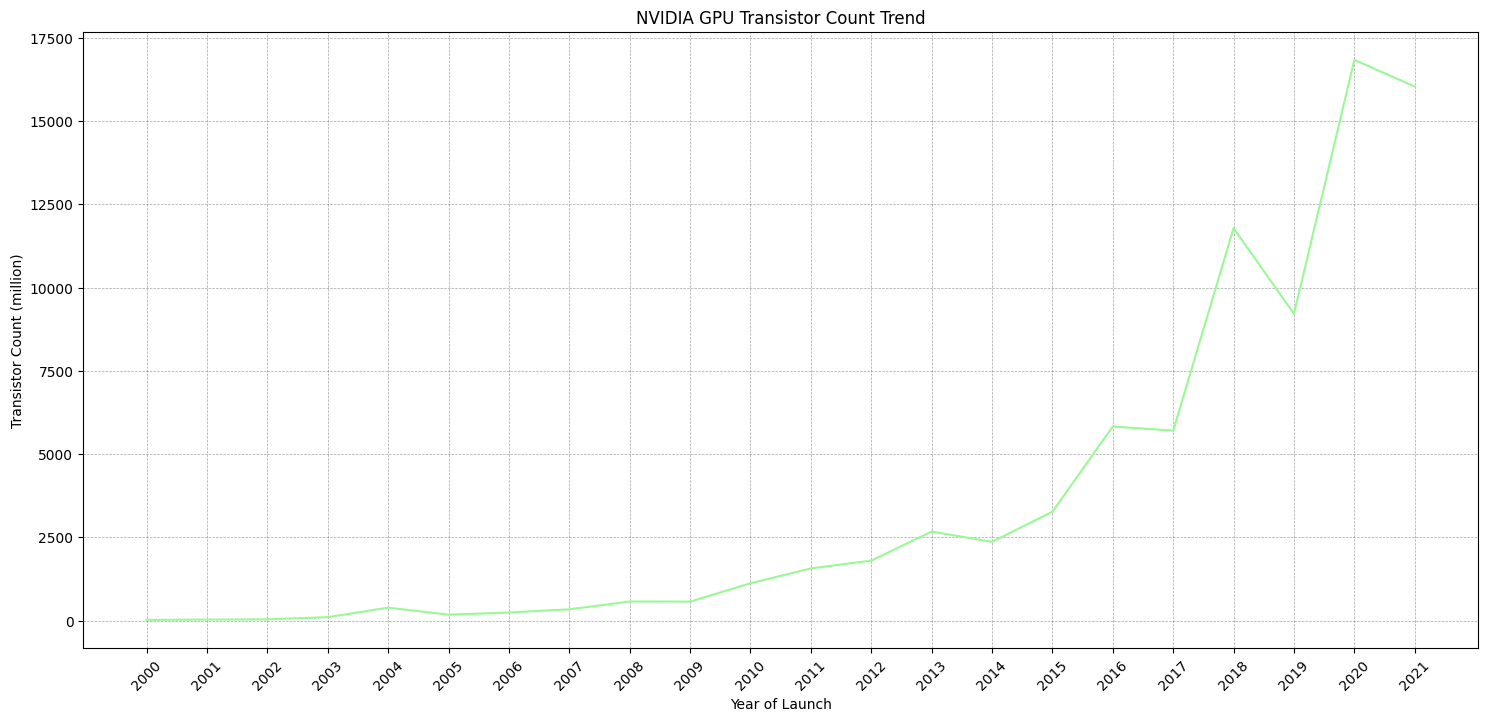

In [108]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TransCount_NVIDIAGPU['Year'], df_TransCount_NVIDIAGPU['Transistors'], color='#9AF896')
mpl.title('NVIDIA GPU Transistor Count Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TransCount_NVIDIAGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.ylabel('Transistor Count (million)')
mpl.show()

#### ATI GPU Transistor Count

Create a seperate <b>Data Frame</b> with <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [109]:
df_TransCount_ATIGPU = df.copy()
df_TransCount_ATIGPU = df_TransCount_ATIGPU[['Product', 'Type', 'Date', 'Transistors', 'Vendor']].where((df_TransCount_ATIGPU['Type']=='GPU') & (df_TransCount_ATIGPU['Vendor']=='ATI')).dropna()
df_TransCount_ATIGPU

Product Type        Date  Transistors Vendor
2196       ATI Radeon HD 4350 AGP  GPU   9/30/2008        242.0    ATI
2198          ATI Radeon X700 AGP  GPU    9/1/2004        120.0    ATI
2200       ATI Radeon HD 2900 PRO  GPU  12/12/2007        720.0    ATI
2210         ATI Radeon E4690 MXM  GPU    6/1/2009        514.0    ATI
2218        ATI Xbox 360 GPU 80nm  GPU  10/27/2007        232.0    ATI
...                           ...  ...         ...          ...    ...
4825           ATI Radeon HD 3410  GPU    5/7/2009        180.0    ATI
4826          ATI Radeon 9800 PRO  GPU    3/1/2003        117.0    ATI
4834     ATI Mobility Radeon 9200  GPU    3/1/2003         36.0    ATI
4843  ATI Mobility Radeon HD 4870  GPU    1/9/2009        956.0    ATI
4844            ATI FirePro V7800  GPU   4/26/2010       2154.0    ATI

[535 rows x 5 columns]

Format content of the <b>Data Frame</b> by <b>Date</b> in <i>Ascending Order</i> and remove special values

In [110]:
# Formatting Date of ATI GPUs and Removal of Special Values

df_TransCount_ATIGPU['Date'] = pd.to_datetime(df_TransCount_ATIGPU['Date'])
df_TransCount_ATIGPU['Year'] = df_TransCount_ATIGPU['Date'].dt.year
df_TransCount_ATIGPU = df_TransCount_ATIGPU[pd.notna(df_TransCount_ATIGPU['Date'])]
df_TransCount_ATIGPU = df_TransCount_ATIGPU.groupby(['Year'])[['Transistors']].mean().reset_index()
df_TransCount_ATIGPU

Year  Transistors
0   2000.0   377.349505
1   2001.0   126.953143
2   2002.0    62.666667
3   2003.0    74.928571
4   2004.0   140.701911
5   2005.0   291.541304
6   2006.0   286.873057
7   2007.0   304.335477
8   2008.0   415.593750
9   2009.0   670.565217
10  2010.0   752.839286
11  2011.0   686.333333
12  2012.0   624.600000
13  2013.0   372.000000

##### ATI GPU Transistor Count Trend Graph

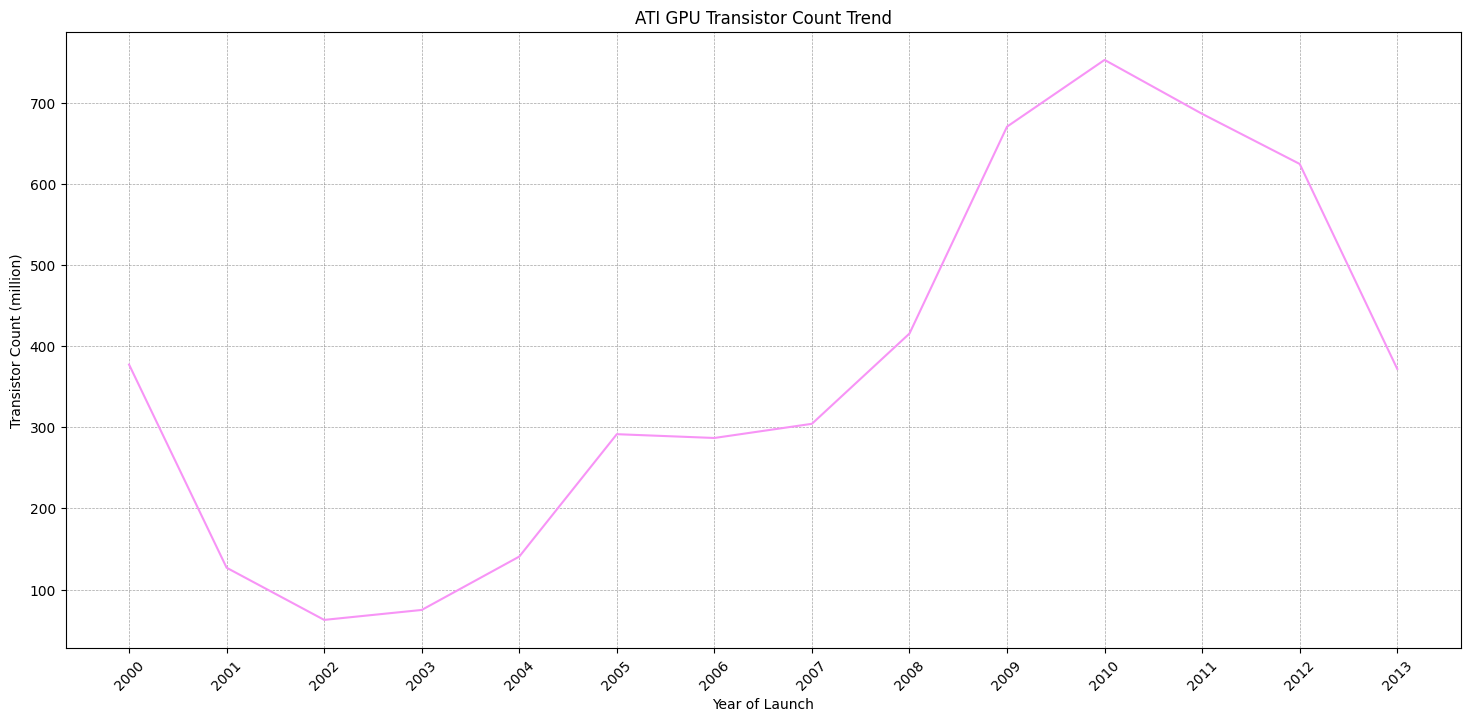

In [111]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TransCount_ATIGPU['Year'], df_TransCount_ATIGPU['Transistors'], color='#F794F6')
mpl.title('ATI GPU Transistor Count Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TransCount_ATIGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.ylabel('Transistor Count (million)')
mpl.show()

#### Other Brand(s) GPU Transistor Count

Create a seperate <b>Data Frame</b> with <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [112]:
df_TransCount_OtherGPU = df.copy()
df_TransCount_OtherGPU = df_TransCount_OtherGPU[['Product', 'Type', 'Date', 'Transistors', 'Vendor']].where((df_TransCount_OtherGPU['Type']=='GPU') & (df_TransCount_OtherGPU['Vendor']=='Other')).dropna()
df_TransCount_OtherGPU

Product Type        Date  Transistors Vendor
2193         Matrox Parhelia 128 MB  GPU   6/25/2002    80.000000  Other
2237              3dfx Spectre 1000  GPU         NaT    30.000000  Other
2239             Matrox QID LP PCIe  GPU  12/17/2004  1929.922279  Other
2270              3dfx Spectre 2000  GPU         NaT    30.000000  Other
2290        XGI Volari Duo V5 Ultra  GPU   9/15/2003    90.000000  Other
...                             ...  ...         ...          ...    ...
4640              3dfx Voodoo5 6000  GPU         NaT    14.000000  Other
4725         Matrox Millennium G450  GPU         NaT    10.000000  Other
4731        3dfx Voodoo4-2 4000 AGP  GPU         NaT    14.000000  Other
4842  Matrox Millennium G450 x4 MMS  GPU   6/19/2002    10.000000  Other
4847                  XGI Volari V3  GPU   9/15/2003    25.000000  Other

[64 rows x 5 columns]

Format content of the <b>Data Frame</b> by <b>Date</b> in <i>Ascending Order</i> and remove special values

In [113]:
# Formatting Date of Other Brand GPUs and Removal of Special Values

df_TransCount_OtherGPU['Date'] = pd.to_datetime(df_TransCount_OtherGPU['Date'])
df_TransCount_OtherGPU['Year'] = df_TransCount_OtherGPU['Date'].dt.year
df_TransCount_OtherGPU = df_TransCount_OtherGPU[pd.notna(df_TransCount_OtherGPU['Date'])]
df_TransCount_OtherGPU = df_TransCount_OtherGPU.groupby(['Year'])[['Transistors']].mean().reset_index()
df_TransCount_OtherGPU

Year  Transistors
0  2000.0    22.000000
1  2001.0    59.250000
2  2002.0    60.000000
3  2003.0    89.285714
4  2004.0  1401.373056
5  2005.0    72.000000
6  2006.0    80.000000
7  2007.0   991.961139
8  2011.0  1929.922279

##### Other GPU Transistor Count Trend Graph

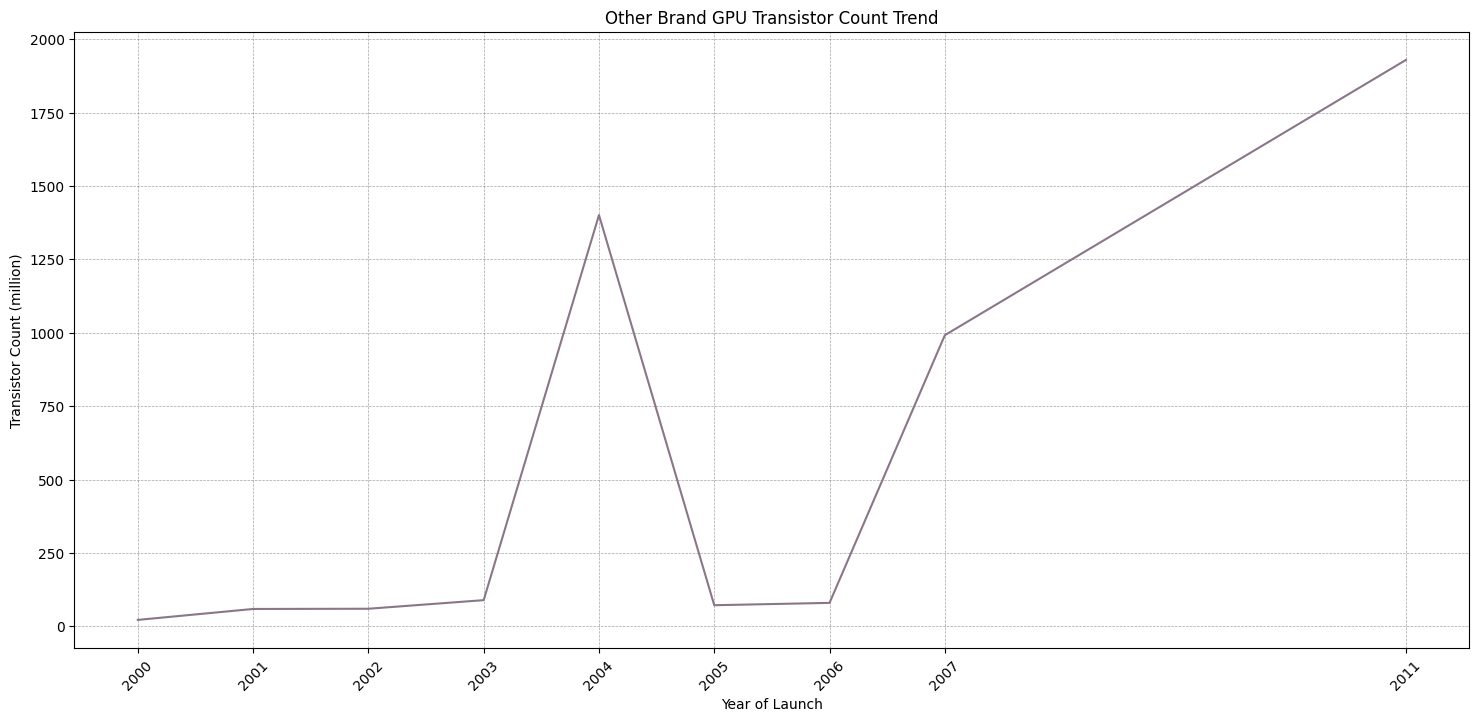

In [114]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_TransCount_OtherGPU['Year'], df_TransCount_OtherGPU['Transistors'], color='#8A7689')
mpl.title('Other Brand GPU Transistor Count Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_TransCount_OtherGPU['Year'], rotation=45)
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.ylabel('Transistor Count (million)')
mpl.show()

### Correlation between GPU Die Size & Transistor Count

#### AMD GPU Die Size & Transistor Count

Create a seperate <b>Data Frame</b> with <i>Die Size</i> and <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [115]:
df_DieSizeTransCount_AMDGPU = df.copy()
df_DieSizeTransCount_AMDGPU = df_DieSizeTransCount_AMDGPU[['Product', 'Type', 'Date', 'Die_Size', 'Transistors', 'Vendor']].where((df_DieSizeTransCount_AMDGPU['Type']=='GPU') & (df_DieSizeTransCount_AMDGPU['Vendor']=='AMD')).dropna()
df_DieSizeTransCount_AMDGPU

Product Type        Date  Die_Size  Transistors  \
2203                  AMD Wii U GPU  GPU  11/18/2012     146.0        880.0   
2204             AMD Radeon RX 6800  GPU  10/28/2020     520.0      26800.0   
2209         AMD Radeon HD 8400 IGP  GPU  11/23/2013     110.0       1178.0   
2217  AMD Radeon R7 Mobile Graphics  GPU  11/15/2015     125.0       1200.0   
2223           AMD Radeon RX 560 XT  GPU   3/13/2019     232.0       5700.0   
...                             ...  ...         ...       ...          ...   
4829          AMD Radeon R5 220 OEM  GPU  12/21/2013      59.0        292.0   
4830      AMD Radeon RX 550X Mobile  GPU   4/11/2018     103.0       2200.0   
4833            AMD Radeon R9 280X2  GPU         NaT     352.0       4313.0   
4836       AMD Radeon Instinct MI25  GPU   6/27/2017     495.0      12500.0   
4839        AMD Radeon R7 350 640SP  GPU    1/7/2019     123.0       1500.0   

     Vendor  
2203    AMD  
2204    AMD  
2209    AMD  
2217    AMD  
2223    AMD  
...     ...  
4829    AMD  
4830    AMD  
4833    AMD  
4836    AMD  
4839    AMD  

[712 rows x 6 columns]

Sort content of the <b>Data Frames</b> in <i>Ascending</i> Order

In [116]:
df_DieSizeTransCount_AMDGPU['Date'] = pd.to_datetime(df_DieSizeTransCount_AMDGPU['Date'])
df_DieSizeTransCount_AMDGPU['Year'] = df_DieSizeTransCount_AMDGPU['Date'].dt.year
df_DieSizeTransCount_AMDGPU = df_DieSizeTransCount_AMDGPU[pd.notna(df_DieSizeTransCount_AMDGPU['Date'])]
df_DieSizeTransCount_AMDGPU = df_DieSizeTransCount_AMDGPU.groupby(['Year'])[['Die_Size', 'Transistors']].mean().reset_index()
df_DieSizeTransCount_AMDGPU

Year    Die_Size   Transistors
0   2006.0  352.000000    384.000000
1   2007.0  192.000000    666.000000
2   2008.0  191.500000    583.000000
3   2009.0  104.000000    627.000000
4   2010.0  174.666667   1103.388889
5   2011.0  151.723684    985.157895
6   2012.0  174.091954   1582.356322
7   2013.0  158.876289   1617.040436
8   2014.0  178.013514   2215.581081
9   2015.0  174.176471   2275.058824
10  2016.0  180.456140   3083.858286
11  2017.0  226.310345   5368.275862
12  2018.0  210.656384   5008.403792
13  2019.0  200.301887   5678.679245
14  2020.0  261.777378  10938.989637
15  2021.0  245.500000  13500.000000

##### AMD GPU Die Size & Transistor Count Trend Graph

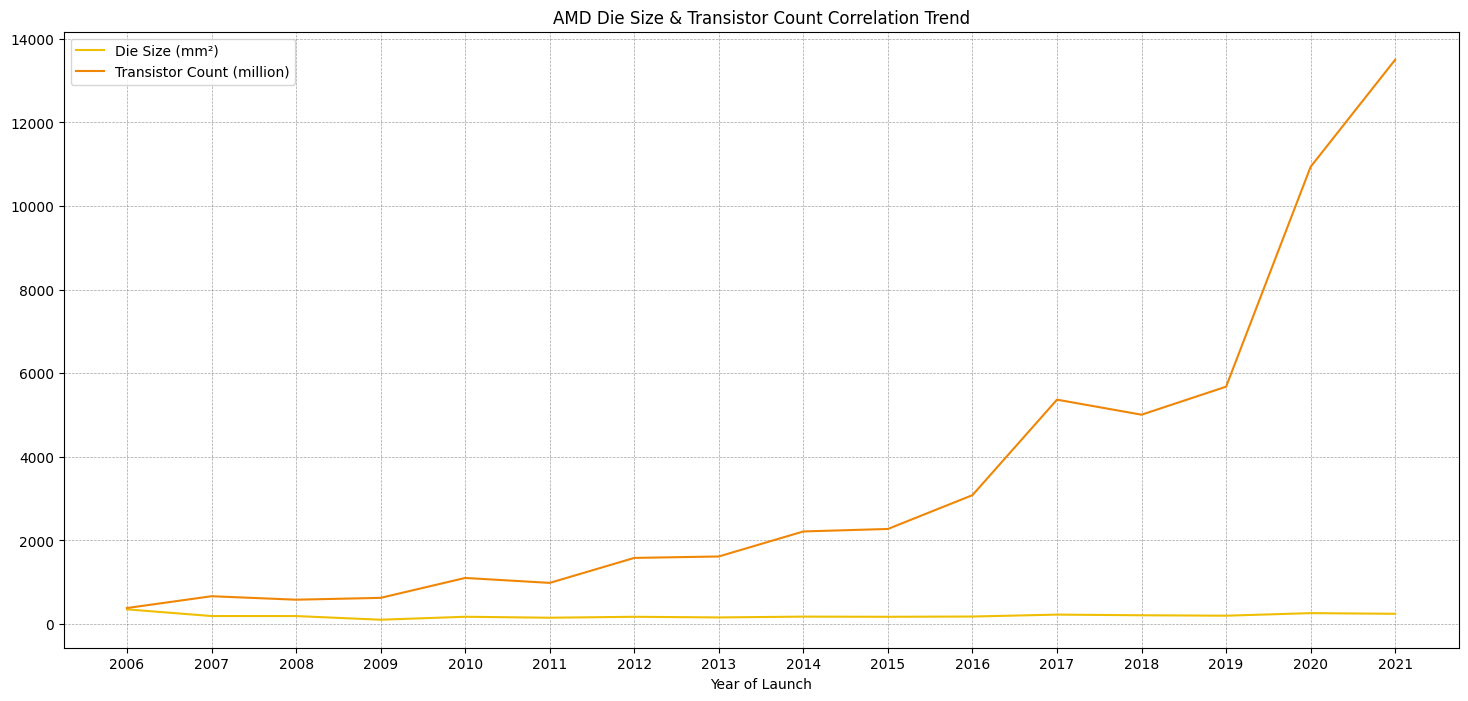

In [117]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_DieSizeTransCount_AMDGPU['Year'], df_DieSizeTransCount_AMDGPU['Die_Size'], color='#EFBF04', label="Die Size (mm²)")
mpl.plot(df_DieSizeTransCount_AMDGPU['Year'], df_DieSizeTransCount_AMDGPU['Transistors'], color='#F08605', label="Transistor Count (million)")
mpl.legend()
mpl.title('AMD Die Size & Transistor Count Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_DieSizeTransCount_AMDGPU['Year'])
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.show()

#### Intel CPU Die Size & Transistor Count

Create a seperate <b>Data Frame</b> with <i>Die Size</i> and <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [118]:
df_DieSizeTransCount_IntelCPU = df.copy()
df_DieSizeTransCount_IntelCPU = df_DieSizeTransCount_IntelCPU[['Product', 'Type', 'Date', 'Die_Size', 'Transistors', 'Vendor']].where((df_DieSizeTransCount_IntelCPU['Type']=='GPU') & (df_DieSizeTransCount_IntelCPU['Vendor']=='Intel')).dropna()
df_DieSizeTransCount_IntelCPU

Product Type       Date    Die_Size  Transistors Vendor
2192       Intel Xeon E3-1275  GPU   4/3/2011  216.000000  1160.000000  Intel
2195            Intel GMA 500  GPU   3/2/2008  188.440445  1929.922279  Intel
2202   Intel UHD Graphics 630  GPU  4/30/2020  188.440445  1929.922279  Intel
2205        Intel HD Graphics  GPU  4/29/2013  188.440445  1929.922279  Intel
2207  Intel Iris Graphics 540  GPU   9/1/2015  188.440445  1929.922279  Intel
...                       ...  ...        ...         ...          ...    ...
4753        Intel HD Graphics  GPU   5/1/2011  131.000000   504.000000  Intel
4757        Intel HD Graphics  GPU   4/1/2015  188.440445  1929.922279  Intel
4788  Intel HD Graphics P3000  GPU   2/1/2011  149.000000   624.000000  Intel
4815       Intel GMA X4700MHD  GPU  10/1/2008  188.440445  1929.922279  Intel
4850            Intel GMA 950  GPU   6/1/2005  188.440445  1929.922279  Intel

[150 rows x 6 columns]

Sort content of the <b>Data Frames</b> in <i>Ascending</i> Order

In [119]:
df_DieSizeTransCount_IntelCPU['Date'] = pd.to_datetime(df_DieSizeTransCount_IntelCPU['Date'])
df_DieSizeTransCount_IntelCPU['Year'] = df_DieSizeTransCount_IntelCPU['Date'].dt.year
df_DieSizeTransCount_IntelCPU = df_DieSizeTransCount_IntelCPU[pd.notna(df_DieSizeTransCount_IntelCPU['Date'])]
df_DieSizeTransCount_IntelCPU = df_DieSizeTransCount_IntelCPU.groupby(['Year'])[['Die_Size', 'Transistors']].mean().reset_index()
df_DieSizeTransCount_IntelCPU

Year    Die_Size  Transistors
0   2000.0  188.440445  1929.922279
1   2001.0  188.440445  1929.922279
2   2002.0  188.440445  1929.922279
3   2003.0  188.440445  1929.922279
4   2004.0  188.440445  1929.922279
5   2005.0  188.440445  1929.922279
6   2006.0  188.440445  1929.922279
7   2007.0  157.830333  1478.191709
8   2008.0  178.564790  1570.828439
9   2010.0  232.488089   944.784456
10  2011.0  169.625000   795.000000
11  2012.0  204.625000  2423.000000
12  2013.0  216.075608  2397.592197
13  2014.0  176.120346  1929.922279
14  2015.0  164.349185  1929.922279
15  2016.0  188.440445  1929.922279
16  2017.0  188.440445  1929.922279
17  2018.0  188.440445  1929.922279
18  2019.0  188.440445  1929.922279
19  2020.0  163.537397  2363.499259
20  2021.0  188.440445  1929.922279

##### Intel CPU Die Size & Transistor Count Trend Graph

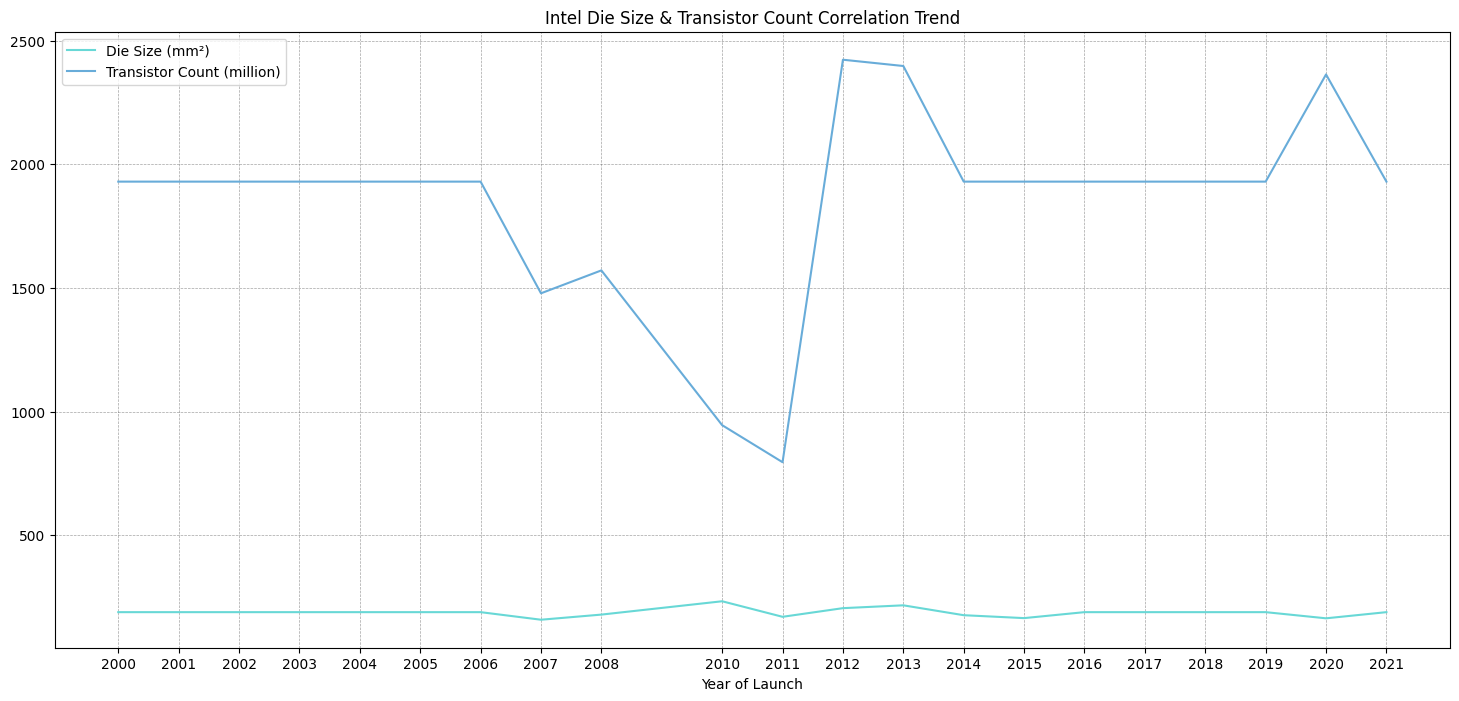

In [120]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_DieSizeTransCount_IntelCPU['Year'], df_DieSizeTransCount_IntelCPU['Die_Size'], color='#68D8D6', label="Die Size (mm²)")
mpl.plot(df_DieSizeTransCount_IntelCPU['Year'], df_DieSizeTransCount_IntelCPU['Transistors'], color='#68ACD9', label="Transistor Count (million)")
mpl.legend()
mpl.title('Intel Die Size & Transistor Count Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_DieSizeTransCount_IntelCPU['Year'])
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.show()

#### NVIDIA CPU Die Size & Transistor Count

Create a seperate <b>Data Frame</b> with <i>Die Size</i> and <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [121]:
df_DieSizeTransCount_NVIDIACPU = df.copy()
df_DieSizeTransCount_NVIDIACPU = df_DieSizeTransCount_NVIDIACPU[['Product', 'Type', 'Date', 'Die_Size', 'Transistors', 'Vendor']].where((df_DieSizeTransCount_NVIDIACPU['Type']=='GPU') & (df_DieSizeTransCount_NVIDIACPU['Vendor']=='NVIDIA')).dropna()
df_DieSizeTransCount_NVIDIACPU

Product Type       Date  Die_Size  Transistors  \
2194  NVIDIA GeForce MX150 GP107  GPU  2/23/2019     132.0       3300.0   
2197      NVIDIA GeForce 7100 GS  GPU   8/8/2006     110.0         75.0   
2199      NVIDIA GeForce 6800 XT  GPU  9/30/2005     225.0        222.0   
2201                  NVIDIA ION  GPU   6/3/2008     144.0        314.0   
2206  NVIDIA GeForce GTX 760 OEM  GPU  6/27/2013     294.0       3540.0   
...                          ...  ...        ...       ...          ...   
4848    NVIDIA GeForce FX Go5100  GPU   3/1/2003     124.0         45.0   
4849         NVIDIA Quadro 3000M  GPU  2/22/2011     332.0       1950.0   
4851      NVIDIA GeForce GT 320M  GPU   3/3/2010     100.0        486.0   
4852      NVIDIA GeForce FX 5200  GPU   3/6/2003      65.0         29.0   
4853      NVIDIA GeForce 9300 SE  GPU   6/1/2008      86.0        210.0   

      Vendor  
2194  NVIDIA  
2197  NVIDIA  
2199  NVIDIA  
2201  NVIDIA  
2206  NVIDIA  
...      ...  
4848  NVIDIA  
4849  NVIDIA  
4851  NVIDIA  
4852  NVIDIA  
4853  NVIDIA  

[1201 rows x 6 columns]

Sort content of the <b>Data Frames</b> in <i>Ascending</i> Order

In [122]:
df_DieSizeTransCount_NVIDIACPU['Date'] = pd.to_datetime(df_DieSizeTransCount_NVIDIACPU['Date'])
df_DieSizeTransCount_NVIDIACPU['Year'] = df_DieSizeTransCount_NVIDIACPU['Date'].dt.year
df_DieSizeTransCount_NVIDIACPU = df_DieSizeTransCount_NVIDIACPU[pd.notna(df_DieSizeTransCount_NVIDIACPU['Date'])]
df_DieSizeTransCount_NVIDIACPU = df_DieSizeTransCount_NVIDIACPU.groupby(['Year'])[['Die_Size', 'Transistors']].mean().reset_index()
df_DieSizeTransCount_NVIDIACPU

Year    Die_Size   Transistors
0   2000.0   73.384615     21.153846
1   2001.0   86.588235     31.470588
2   2002.0   85.696970     37.060606
3   2003.0  128.347933    103.111741
4   2004.0  184.371096    388.558245
5   2005.0  204.864865    178.621622
6   2006.0  155.786011    243.085557
7   2007.0  201.781250    338.968750
8   2008.0  241.500000    572.843750
9   2009.0  189.864407    569.372881
10  2010.0  218.065301   1121.822386
11  2011.0  282.792208   1567.311688
12  2012.0  197.424658   1801.410959
13  2013.0  232.627660   2675.063830
14  2014.0  205.050035   2364.884553
15  2015.0  258.805484   3270.497936
16  2016.0  301.160980   5830.373999
17  2017.0  252.461848   5705.449246
18  2018.0  475.974359  11788.974359
19  2019.0  375.813953   9213.953488
20  2020.0  433.842105  16842.105263
21  2021.0  393.080120  16040.748306

##### NVIDIA CPU Die Size & Transistor Count Trend Graph

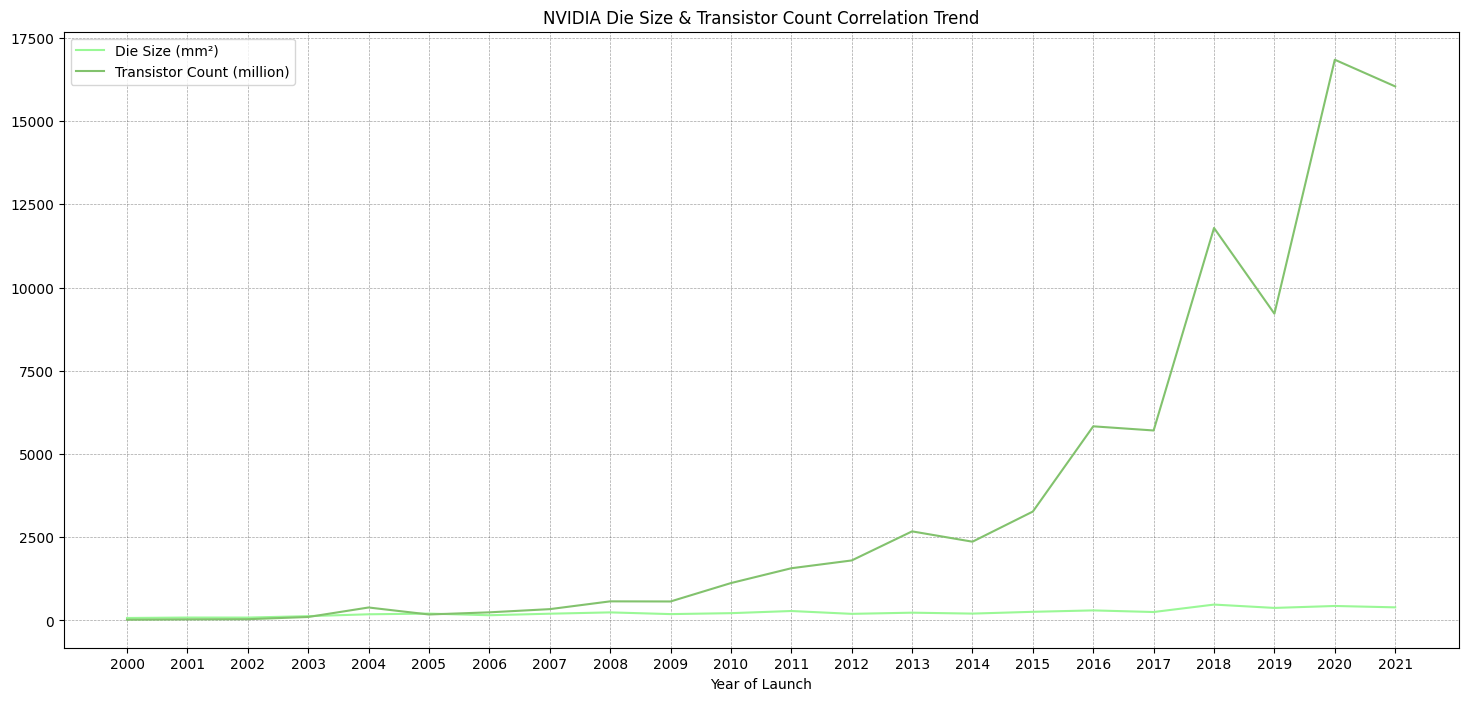

In [123]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_DieSizeTransCount_NVIDIACPU['Year'], df_DieSizeTransCount_NVIDIACPU['Die_Size'], color='#9AF896', label="Die Size (mm²)")
mpl.plot(df_DieSizeTransCount_NVIDIACPU['Year'], df_DieSizeTransCount_NVIDIACPU['Transistors'], color='#82C26D', label="Transistor Count (million)")
mpl.legend()
mpl.title('NVIDIA Die Size & Transistor Count Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_DieSizeTransCount_NVIDIACPU['Year'])
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.show()

#### ATI GPU Die Size & Transistor Count

Create a seperate <b>Data Frame</b> with <i>Die Size</i> and <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [124]:
df_DieSizeTransCount_ATIGPU = df.copy()
df_DieSizeTransCount_ATIGPU = df_DieSizeTransCount_ATIGPU[['Product', 'Type', 'Date', 'Die_Size', 'Transistors', 'Vendor']].where((df_DieSizeTransCount_ATIGPU['Type']=='GPU') & (df_DieSizeTransCount_ATIGPU['Vendor']=='ATI')).dropna()
df_DieSizeTransCount_ATIGPU

Product Type        Date  Die_Size  Transistors  \
2196       ATI Radeon HD 4350 AGP  GPU   9/30/2008      73.0        242.0   
2198          ATI Radeon X700 AGP  GPU    9/1/2004     156.0        120.0   
2200       ATI Radeon HD 2900 PRO  GPU  12/12/2007     420.0        720.0   
2210         ATI Radeon E4690 MXM  GPU    6/1/2009     146.0        514.0   
2218        ATI Xbox 360 GPU 80nm  GPU  10/27/2007     181.0        232.0   
...                           ...  ...         ...       ...          ...   
4825           ATI Radeon HD 3410  GPU    5/7/2009      85.0        180.0   
4826          ATI Radeon 9800 PRO  GPU    3/1/2003     215.0        117.0   
4834     ATI Mobility Radeon 9200  GPU    3/1/2003      81.0         36.0   
4843  ATI Mobility Radeon HD 4870  GPU    1/9/2009     256.0        956.0   
4844            ATI FirePro V7800  GPU   4/26/2010     334.0       2154.0   

     Vendor  
2196    ATI  
2198    ATI  
2200    ATI  
2210    ATI  
2218    ATI  
...     ...  
4825    ATI  
4826    ATI  
4834    ATI  
4843    ATI  
4844    ATI  

[535 rows x 6 columns]

Sort content of the <b>Data Frames</b> in <i>Ascending</i> Order

In [125]:
df_DieSizeTransCount_ATIGPU['Date'] = pd.to_datetime(df_DieSizeTransCount_ATIGPU['Date'])
df_DieSizeTransCount_ATIGPU['Year'] = df_DieSizeTransCount_ATIGPU['Date'].dt.year
df_DieSizeTransCount_ATIGPU = df_DieSizeTransCount_ATIGPU[pd.notna(df_DieSizeTransCount_ATIGPU['Date'])]
df_DieSizeTransCount_ATIGPU = df_DieSizeTransCount_ATIGPU.groupby(['Year'])[['Die_Size', 'Transistors']].mean().reset_index()
df_DieSizeTransCount_ATIGPU

Year    Die_Size  Transistors
0   2000.0  121.454545   377.349505
1   2001.0  103.869565   126.953143
2   2002.0  127.037037    62.666667
3   2003.0  131.452381    74.928571
4   2004.0  167.937500   140.701911
5   2005.0  179.264151   291.541304
6   2006.0  207.375000   286.873057
7   2007.0  155.771084   304.335477
8   2008.0  134.031250   415.593750
9   2009.0  160.652174   670.565217
10  2010.0  138.267857   752.839286
11  2011.0  130.777778   686.333333
12  2012.0  146.800000   624.600000
13  2013.0  168.000000   372.000000

##### ATI GPU Die Size & Transistor Count Trend Graph

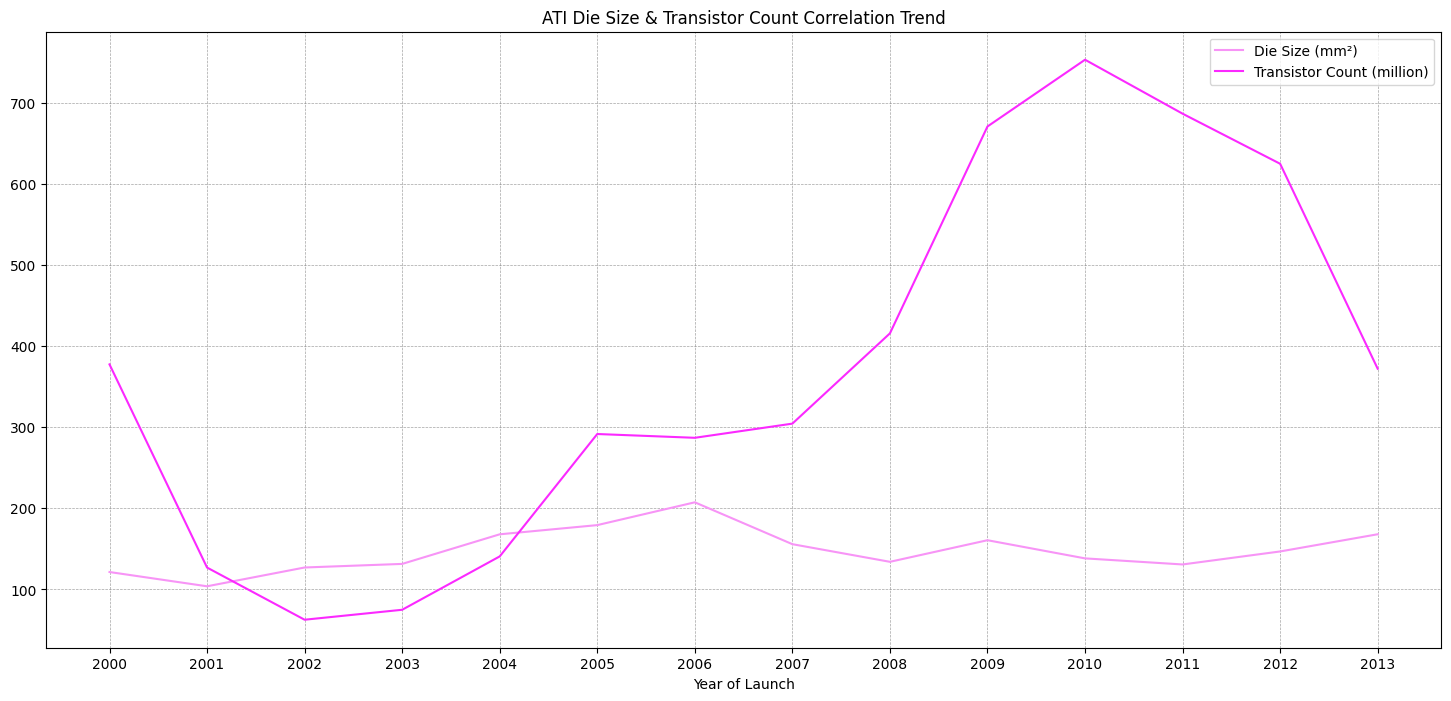

In [126]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_DieSizeTransCount_ATIGPU['Year'], df_DieSizeTransCount_ATIGPU['Die_Size'], color='#F794F6', label="Die Size (mm²)")
mpl.plot(df_DieSizeTransCount_ATIGPU['Year'], df_DieSizeTransCount_ATIGPU['Transistors'], color='#FB29FF', label="Transistor Count (million)")
mpl.legend()
mpl.title('ATI Die Size & Transistor Count Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_DieSizeTransCount_ATIGPU['Year'])
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.show()

#### Other Brand(s) GPU Die Size & Transistor Count

Create a seperate <b>Data Frame</b> with <i>Die Size</i> and <i>Transistor Count</i> for each vendor and drop irrelevant columns

In [127]:
df_DieSizeTransCount_OtherGPU = df.copy()
df_DieSizeTransCount_OtherGPU = df_DieSizeTransCount_OtherGPU[['Product', 'Type', 'Date', 'Die_Size', 'Transistors', 'Vendor']].where((df_DieSizeTransCount_OtherGPU['Type']=='GPU') & (df_DieSizeTransCount_OtherGPU['Vendor']=='Other')).dropna()
df_DieSizeTransCount_OtherGPU

Product Type        Date    Die_Size  Transistors  \
2193         Matrox Parhelia 128 MB  GPU   6/25/2002  174.000000    80.000000   
2237              3dfx Spectre 1000  GPU         NaT  131.000000    30.000000   
2239             Matrox QID LP PCIe  GPU  12/17/2004  188.440445  1929.922279   
2270              3dfx Spectre 2000  GPU         NaT  131.000000    30.000000   
2290        XGI Volari Duo V5 Ultra  GPU   9/15/2003  188.440445    90.000000   
...                             ...  ...         ...         ...          ...   
4640              3dfx Voodoo5 6000  GPU         NaT  112.000000    14.000000   
4725         Matrox Millennium G450  GPU         NaT  188.440445    10.000000   
4731        3dfx Voodoo4-2 4000 AGP  GPU         NaT  112.000000    14.000000   
4842  Matrox Millennium G450 x4 MMS  GPU   6/19/2002  188.440445    10.000000   
4847                  XGI Volari V3  GPU   9/15/2003  188.440445    25.000000   

     Vendor  
2193  Other  
2237  Other  
2239  Other  
2270  Other  
2290  Other  
...     ...  
4640  Other  
4725  Other  
4731  Other  
4842  Other  
4847  Other  

[64 rows x 6 columns]

Sort content of the <b>Data Frames</b> in <i>Ascending</i> Order

In [128]:
df_DieSizeTransCount_OtherGPU['Date'] = pd.to_datetime(df_DieSizeTransCount_OtherGPU['Date'])
df_DieSizeTransCount_OtherGPU['Year'] = df_DieSizeTransCount_OtherGPU['Date'].dt.year
df_DieSizeTransCount_OtherGPU = df_DieSizeTransCount_OtherGPU[pd.notna(df_DieSizeTransCount_OtherGPU['Date'])]
df_DieSizeTransCount_OtherGPU = df_DieSizeTransCount_OtherGPU.groupby(['Year'])[['Die_Size', 'Transistors']].mean().reset_index()
df_DieSizeTransCount_OtherGPU

Year    Die_Size  Transistors
0  2000.0  145.400000    22.000000
1  2001.0  179.360111    59.250000
2  2002.0  182.251683    60.000000
3  2003.0  188.440445    89.285714
4  2004.0  184.314603  1401.373056
5  2005.0  137.220222    72.000000
6  2006.0  174.000000    80.000000
7  2007.0  137.220222   991.961139
8  2011.0    6.000000  1929.922279

##### Other Brand GPU Die Size & Transistor Count Trend Graph

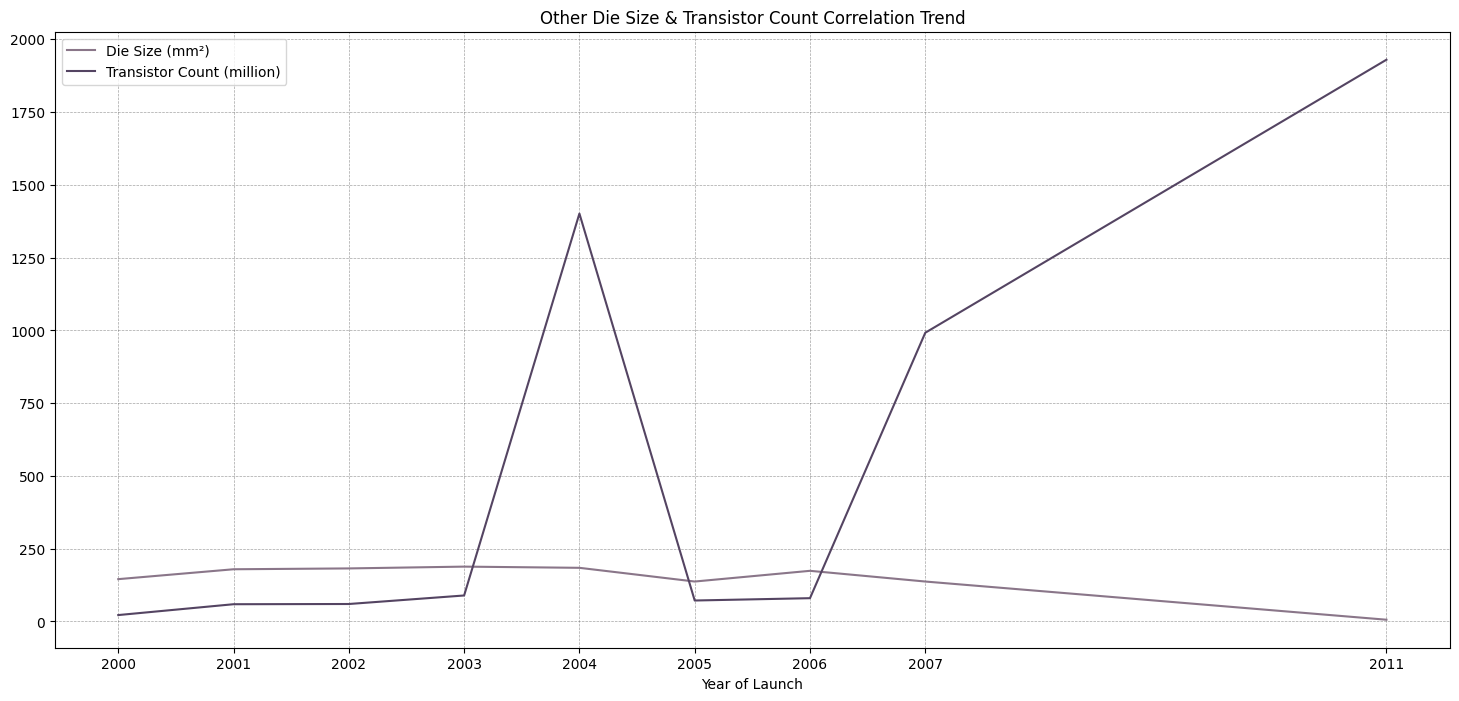

In [129]:
mpl.figure(figsize=(18, 8))
mpl.plot(df_DieSizeTransCount_OtherGPU['Year'], df_DieSizeTransCount_OtherGPU['Die_Size'], color='#8A7689', label="Die Size (mm²)")
mpl.plot(df_DieSizeTransCount_OtherGPU['Year'], df_DieSizeTransCount_OtherGPU['Transistors'], color='#544462', label="Transistor Count (million)")
mpl.legend()
mpl.title('Other Die Size & Transistor Count Correlation Trend')
mpl.xlabel('Year of Launch')
mpl.xticks(df_DieSizeTransCount_OtherGPU['Year'])
mpl.grid(color='#4a4a4a', linestyle='--', linewidth=0.5, alpha=0.5)
mpl.show()

## Conclusion

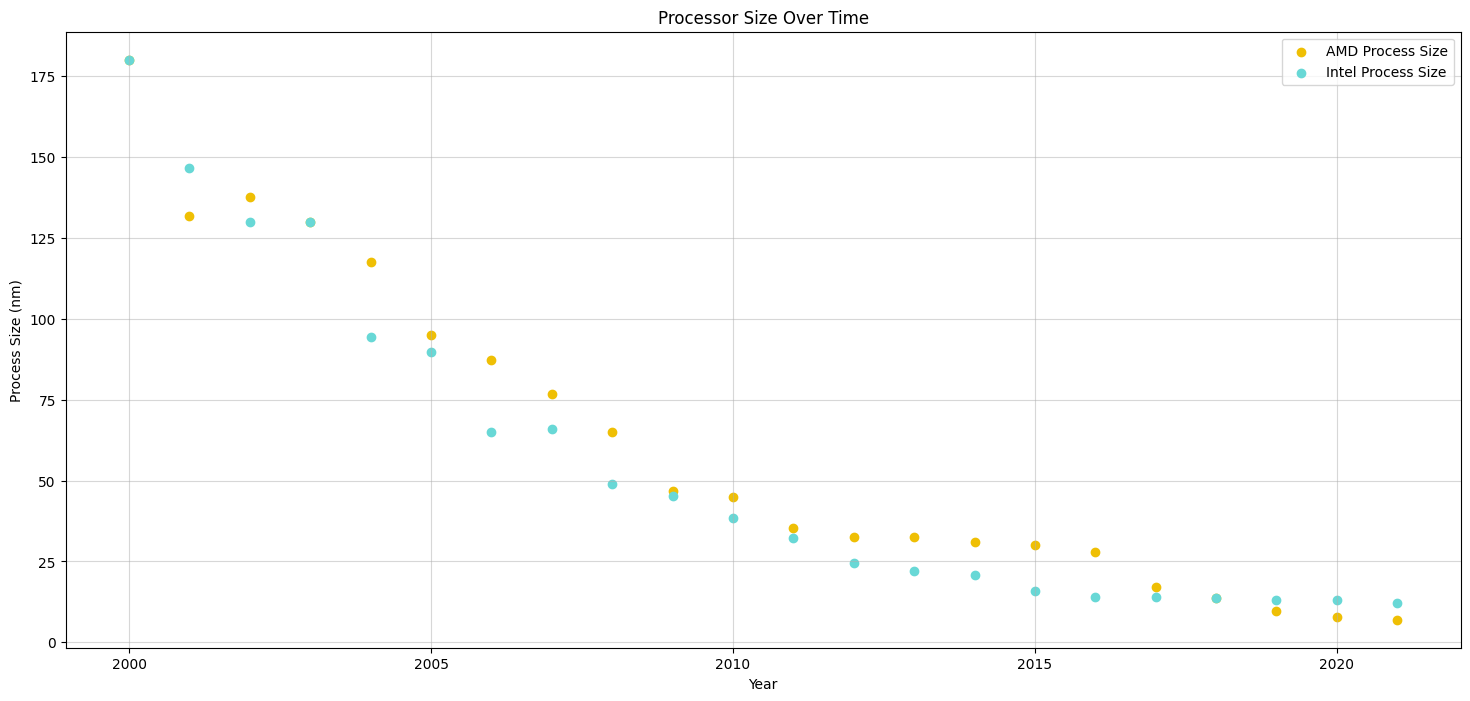

In [130]:
# process size over time for cpu

mpl.figure(figsize=(18,8))
mpl.scatter(df_ProcSize_AMDCPU['Year'], df_ProcSize_AMDCPU['Process_Size'], color='#EFBF04', label='AMD Process Size')
mpl.scatter(df_ProcSize_IntelCPU['Year'], df_ProcSize_IntelCPU['Process_Size'], color='#68D8D6', label='Intel Process Size')
mpl.legend()
mpl.xlabel('Year')
mpl.ylabel('Process Size (nm)')
mpl.title('Processor Size Over Time')

mpl.grid(alpha=0.5)

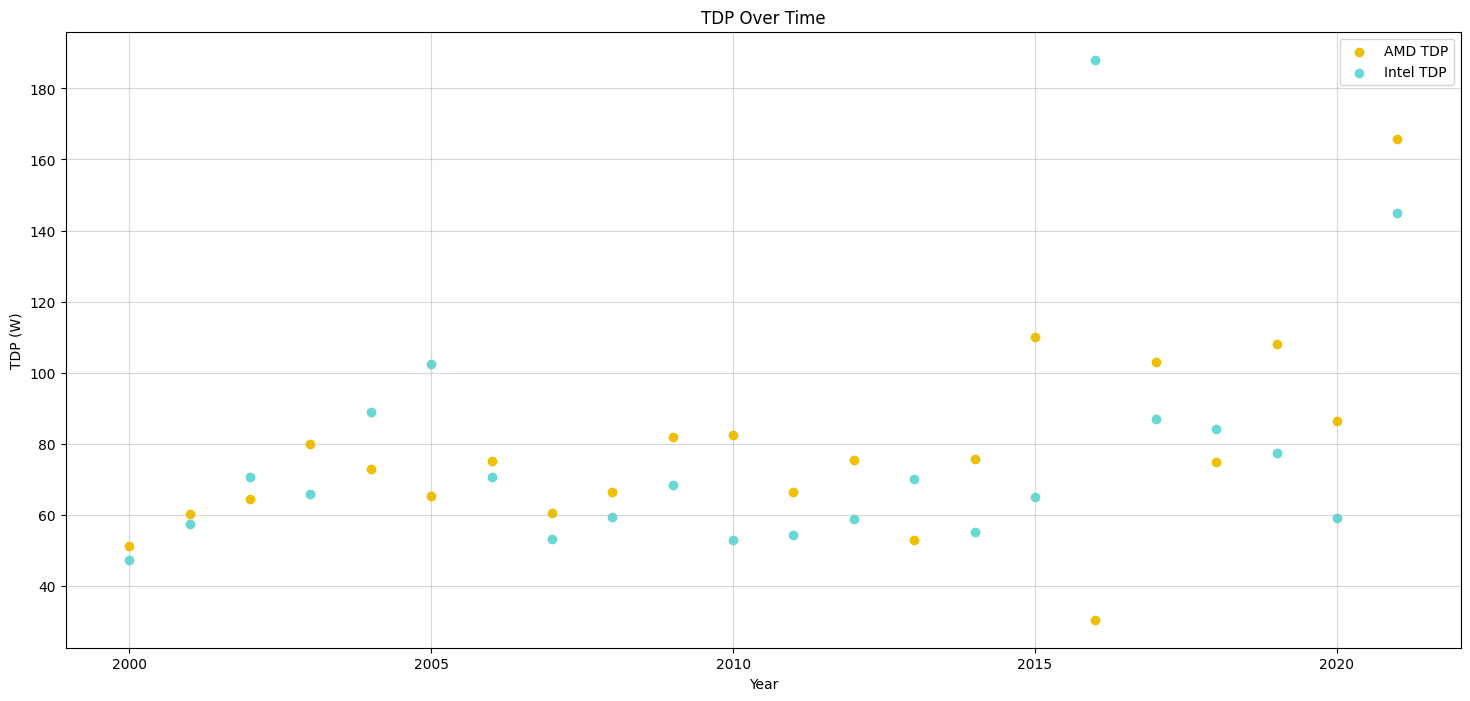

In [131]:
# tdp over time for cpu

mpl.figure(figsize=(18,8))
mpl.scatter(df_TDPProcSize_AMDCPU['Year'], df_TDPProcSize_AMDCPU['TDP'], color='#EFBF04', label='AMD TDP')
mpl.scatter(df_TDPProcSize_IntelCPU['Year'], df_TDPProcSize_IntelCPU['TDP'], color='#68D8D6', label='Intel TDP')
mpl.legend()
mpl.xlabel('Year')
mpl.ylabel('TDP (W)')
mpl.title('TDP Over Time')

mpl.grid(alpha=0.5)

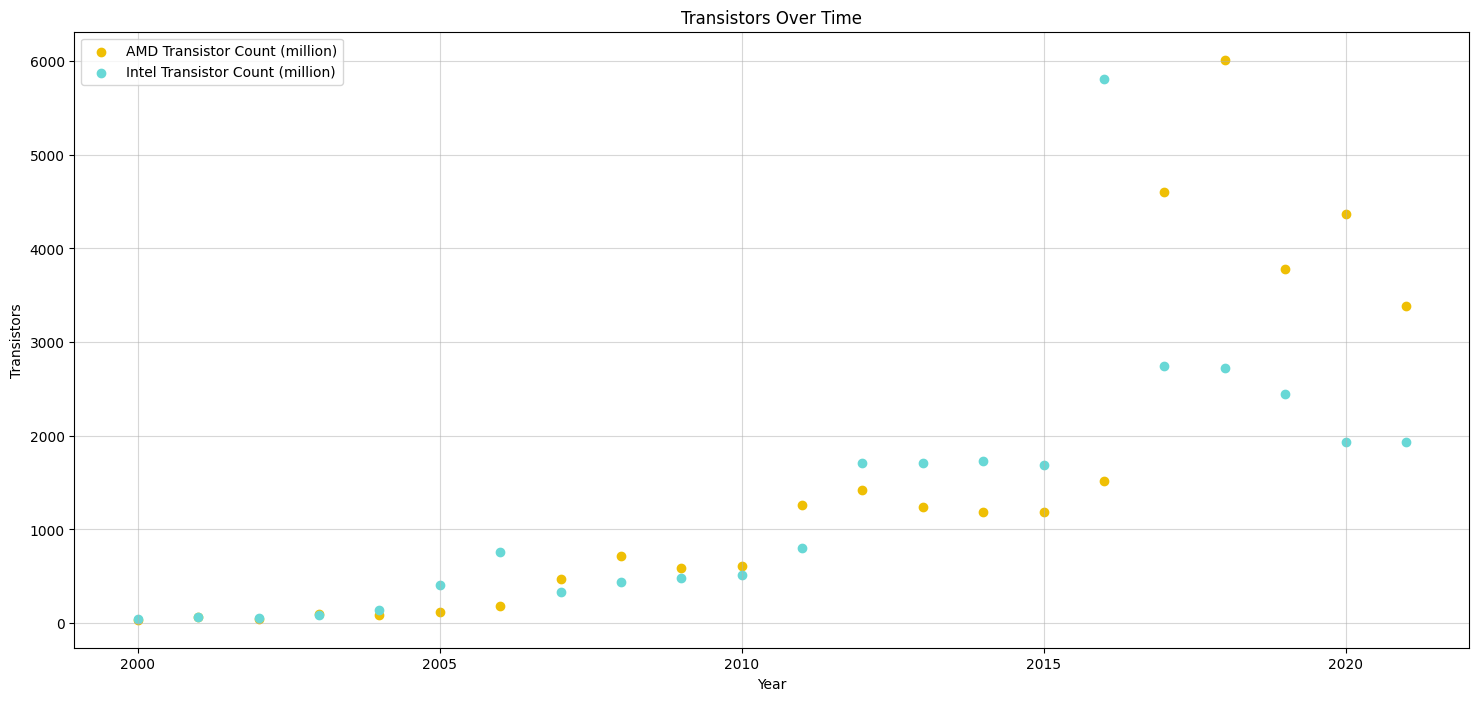

In [132]:
# transistor count over time for cpu

mpl.figure(figsize=(18,8))
mpl.scatter(df_TransCount_AMDCPU['Year'], df_TransCount_AMDCPU['Transistors'], color='#EFBF04', label='AMD Transistor Count (million)')
mpl.scatter(df_TransCount_IntelCPU['Year'], df_TransCount_IntelCPU['Transistors'], color='#68D8D6', label='Intel Transistor Count (million)')
mpl.legend()
mpl.xlabel('Year')
mpl.ylabel('Transistors')
mpl.title('Transistors Over Time')

mpl.grid(alpha=0.5)

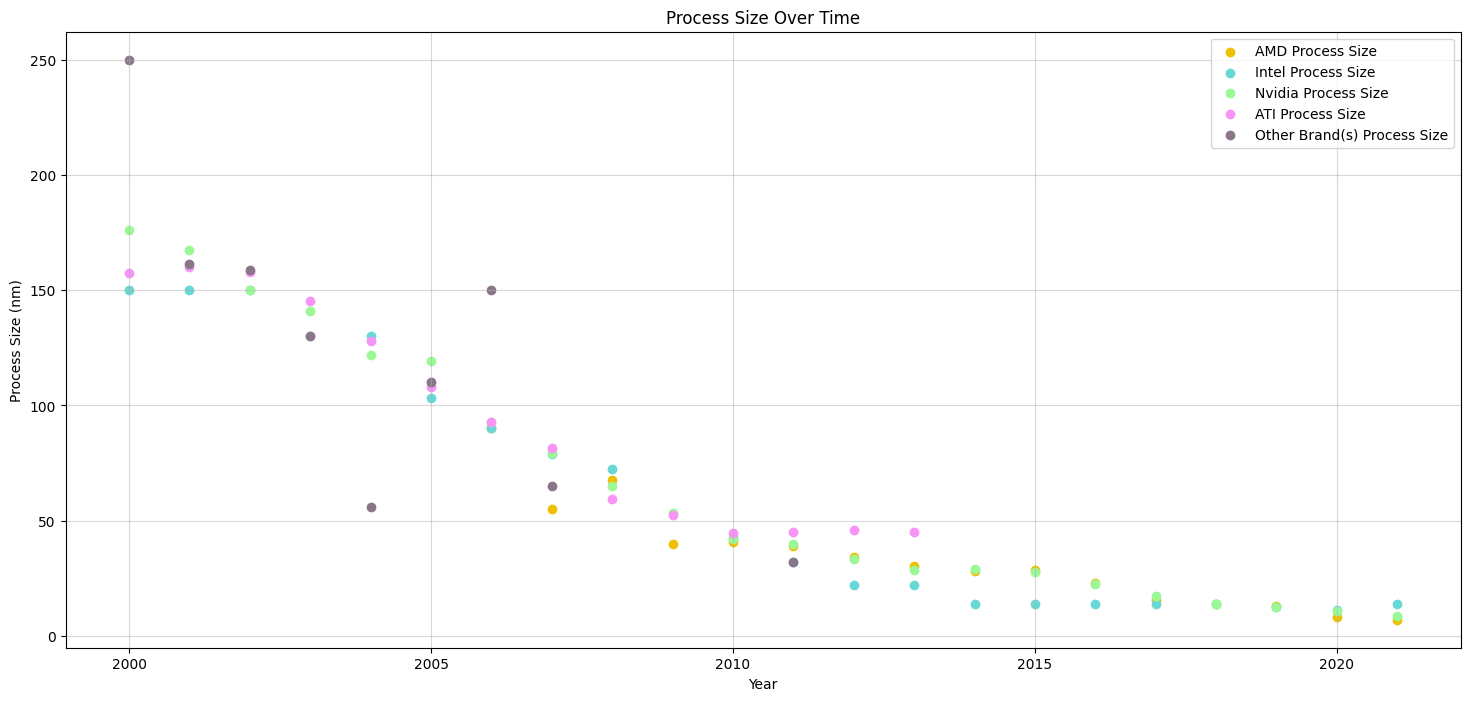

In [133]:
# process size over time for gpu

mpl.figure(figsize=(18,8))
mpl.scatter(df_ProcSize_AMDGPU['Year'], df_ProcSize_AMDGPU['Process_Size'], color='#EFBF04', label='AMD Process Size')
mpl.scatter(df_ProcSize_IntelGPU['Year'], df_ProcSize_IntelGPU['Process_Size'], color='#68D8D6', label='Intel Process Size')
mpl.scatter(df_ProcSize_NvidiaGPU['Year'], df_ProcSize_NvidiaGPU['Process_Size'], color='#9AF896', label='Nvidia Process Size')
mpl.scatter(df_ProcSize_ATIGPU['Year'], df_ProcSize_ATIGPU['Process_Size'], color='#F794F6', label='ATI Process Size')
mpl.scatter(df_ProcSize_OtherGPU['Year'], df_ProcSize_OtherGPU['Process_Size'], color='#8A7689', label='Other Brand(s) Process Size')

mpl.legend()
mpl.xlabel('Year')
mpl.ylabel('Process Size (nm)')
mpl.title('Process Size Over Time')

mpl.grid(alpha=0.5)

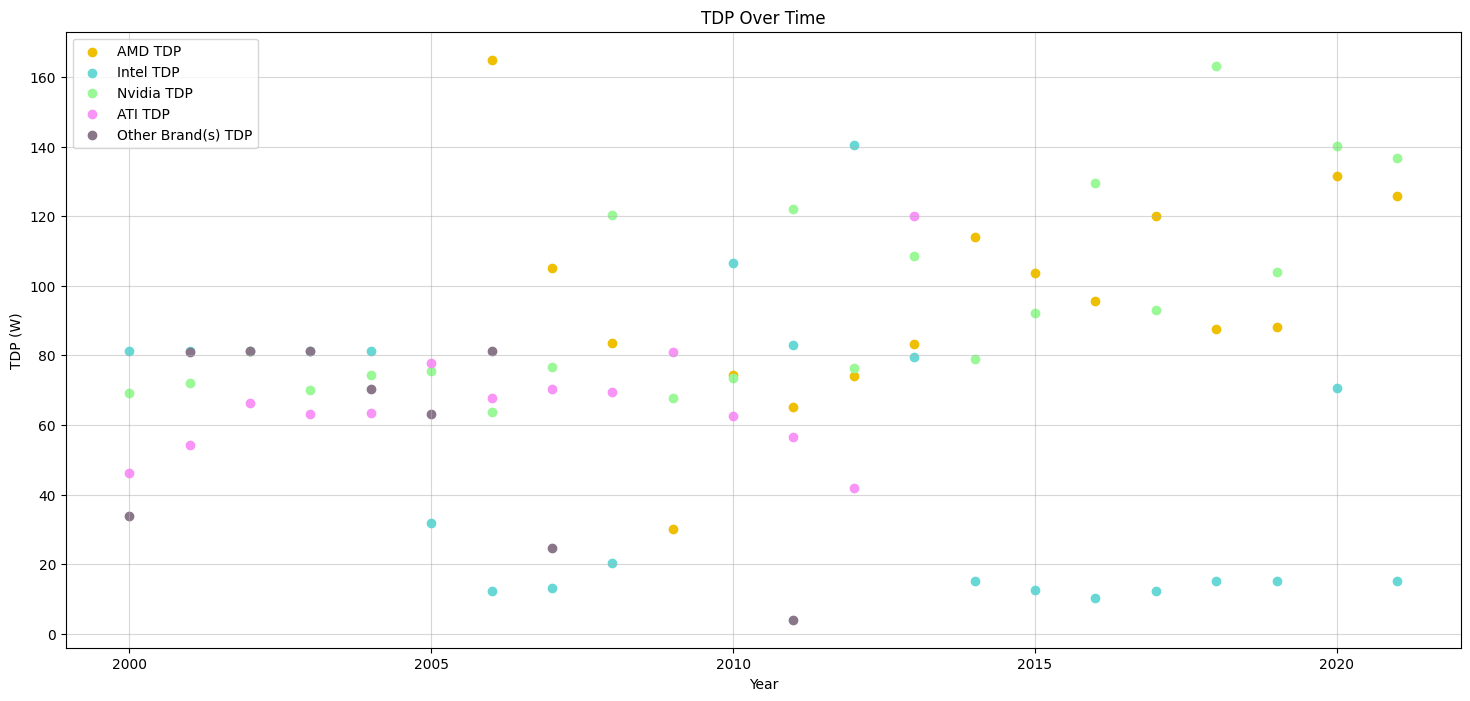

In [134]:
# tdp over time for gpu

mpl.figure(figsize=(18,8))
mpl.scatter(df_TDPProcSize_AMDGPU['Year'], df_TDPProcSize_AMDGPU['TDP'], color='#EFBF04', label='AMD TDP')
mpl.scatter(df_TDPProcSize_IntelGPU['Year'], df_TDPProcSize_IntelGPU['TDP'], color='#68D8D6', label='Intel TDP')
mpl.scatter(df_TDPProcSize_NvidiaGPU['Year'], df_TDPProcSize_NvidiaGPU['TDP'], color='#9AF896', label='Nvidia TDP')
mpl.scatter(df_TDPProcSize_ATIGPU['Year'], df_TDPProcSize_ATIGPU['TDP'], color='#F794F6', label='ATI TDP')
mpl.scatter(df_TDPProcSize_OtherGPU['Year'], df_TDPProcSize_OtherGPU['TDP'], color='#8A7689', label='Other Brand(s) TDP')

mpl.legend()
mpl.xlabel('Year')
mpl.ylabel('TDP (W)')
mpl.title('TDP Over Time')

mpl.grid(alpha=0.5)

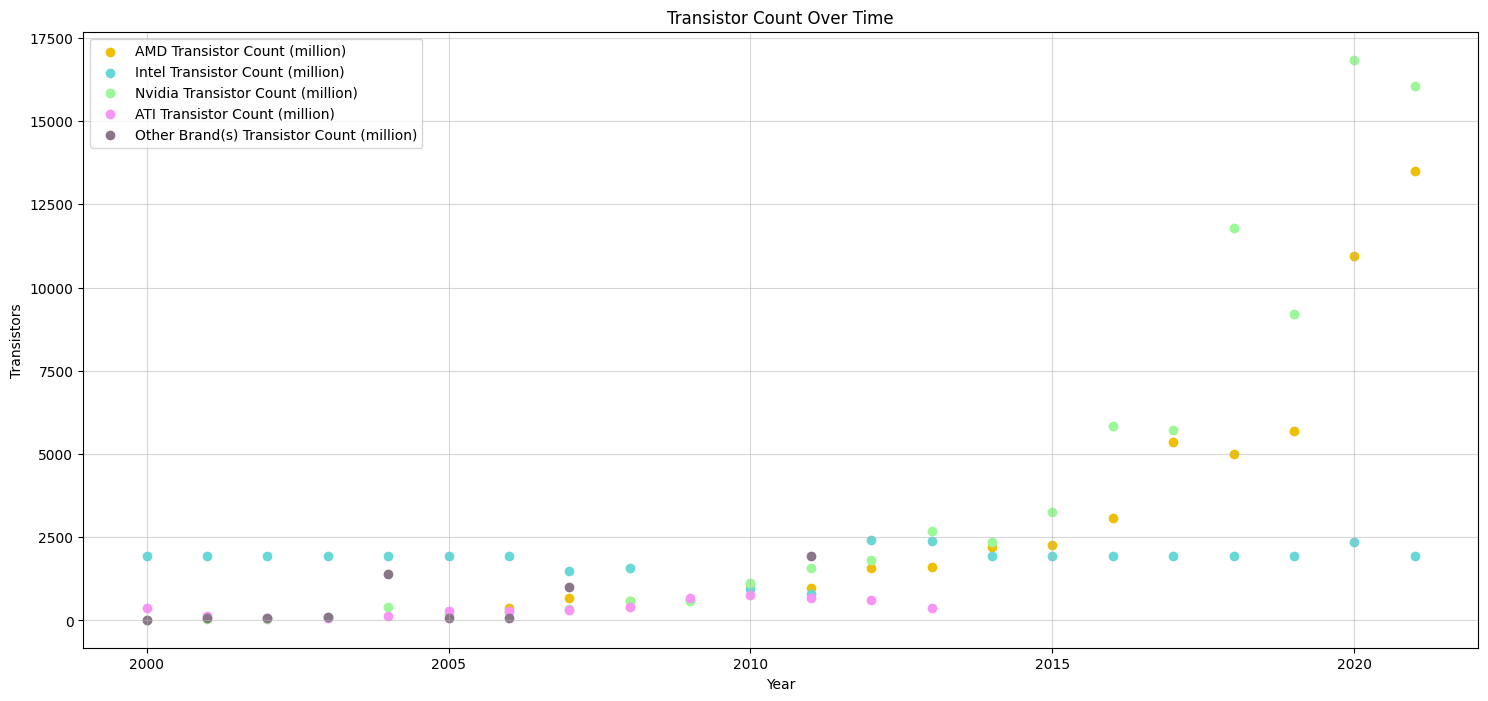

In [135]:
# transistor count over time for gpu

mpl.figure(figsize=(18,8))
mpl.scatter(df_TransCount_AMDGPU['Year'], df_TransCount_AMDGPU['Transistors'], color='#EFBF04', label='AMD Transistor Count (million)')
mpl.scatter(df_TransCount_IntelGPU['Year'], df_TransCount_IntelGPU['Transistors'], color='#68D8D6', label='Intel Transistor Count (million)')
mpl.scatter(df_TransCount_NVIDIAGPU['Year'], df_TransCount_NVIDIAGPU['Transistors'], color='#9AF896', label='Nvidia Transistor Count (million)')
mpl.scatter(df_TransCount_ATIGPU['Year'], df_TransCount_ATIGPU['Transistors'], color='#F794F6', label='ATI Transistor Count (million)')
mpl.scatter(df_TransCount_OtherGPU['Year'], df_TransCount_OtherGPU['Transistors'], color='#8A7689', label='Other Brand(s) Transistor Count (million)')

mpl.legend()
mpl.xlabel('Year')
mpl.ylabel('Transistors')
mpl.title('Transistor Count Over Time')

mpl.grid(alpha=0.5)

### Key Findings

<h5> > Process Size become smaller over time</h5>
<p>
Over time, both AMD and Intel have consistently reduced their CPU <b>Process sizes</b>, but at different rates, reflecting varying technological advancements and manufacturing strategies which flourished throughout the years. 
</p>


<h5> > Transistor Count increases over time</h5>
<p>
The increase of transistors in both the CPUs and GPUs over time may be a demonstration of <b>Moore's Law</b>, wherein it states that for every two years, the number of transistors on a microchip doubles- signifying a consistent increase in computing power.
</p>


<h5> > TDP increases over time</h5>
<p>
Despite the Process Size being a smaller size for both the CPU and GPU, the TDP still increases over time for all brands and even shows big fluctiations as shown by the scatterplot. The cause of the chips being more power-hungry especially for GPUs, may be because of higher performance demands of modern software and workloads.
</p>

<h5>> Inverse-Colleration between TDP and Processor Size</h5>
<p>
 Although Data varies between brands, most of the brands display recognizable patterns like how NVIDIA showcases a 'zigzag' pattern with their Die Size and Process Size where early years showcase higher Process Sizes and lower TDP but later on TDP keeps rising while Process Size becomes smaller in comparison. This could be a strategy implemented by the company to push the performance of the chip to its limits rather than reducing the power consumption of the chip. Another example would be AMD's CPU Die Size and Process Size which exhibits the same pattern as NVIDIA's GPUs.
</p>

<h5>> No correlation between Die Size and Transistor Count</h5>
<p>
It can be seen that for all brands and both CPU and GPU Chips that the <b>Die Size</b> either <b>remains constant</b> or flucuates by a small margin while the Transistor Count countinues to rise, implying improvement in transistor density which may explain the increase in performance despite the physical size of the CPU and GPU chip getting smaller over time.
</p>

### Final Verdicts and Recommendations

<p>Basing from the results of our analysis, we recommended getting a <b>CPU</b> that was launched around <b>2019 or later</b> to <b>ensure compatibility</b> with modern hardware and software. A CPU with a TDP above 65W can be considered too much for daily office use since regular office work would not be able to fully utilize the speed or frequency that a high TDP CPU like the <i>AMD Ryzen Threadripper PRO 3945WX</i> provides which runs at a frequency of 4000MHz with 280W of power. A Chip that is capable of pushing speeds of <b>2000MHz or above </b> with <b>65W or less</b> of power should meet your needs. Furthermore, the same can be said for the <b>GPU</b>, A TDP of 65W or less that is capable of pushing 1000MHz or more is recommended. However, there are specific CPU Chips that have an integrated GPU which eliminates the need for a physical GPU. Do take note of these kinds of chips as it can help cut costs while offering the same performance as some CPU + GPU combinations.</p><br> The amount of transistors present on a specific CPU or GPU should not matter when looking for said hardware as there are cases that regardless of Transistor Count, it does not directly impact the frequency of a CPU or GPU, and some would outperform the other despite the difference in Transistor Count.</p><br>


<p>Overall, it all depends on what kind of tasks the Computer will handle and the total budget alotted for the whole build. As a general rule of thumb, <b>for heavier workloads, the greater the frequency, the greater the performance</b>, while <b>for lighter workloads, the lesser the TDP, the lesser the power costs.</b> Brand should not matter as long as it meets the criteria of said tasks to be performed on the Computer.</p><br>


<p>If you have any further inquiries you may contact us again and we will happily assist you. <br>

-Robb</p>